# Монитруем диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/masters_work

/content/drive/MyDrive/masters_work


In [ ]:
!pip install torch torchvision scikit-learn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 20.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
'''def add_noise(signal, noise_level=0.1):
    noise = np.random.normal(0, noise_level, signal.shape)
    return signal + noise

def amplitude_scaling(signal, scale_factor=1.5):
    return signal * scale_factor

def time_crop(signal, crop_size=140):
    start = np.random.randint(0, len(signal) - crop_size)
    return signal[start: start + crop_size]

def augment_signal(signal):
    aug1 = amplitude_scaling(signal, np.random.uniform(0.8, 1.2))
    aug1 = add_noise(aug1, noise_level=0.05)

    aug2 = time_crop(signal, crop_size=len(signal) - 20)
    return aug1, aug2
'''

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-2-a05b29d18a91>, line 1)

In [ ]:
from google.colab import files
files.upload()


{}

# Описание работы

**Использование метода контрастивного обучения в задаче классификации ЭКГ**


---

(подробнее про постановку и цель указанной задачи рассказовалось ранее(31.10)

---



*Выполняет: Кривохижин Д.Н.*

*Научный руководитель: д-р ф.-м. наук, проф., Шишкин А.Г.*  



# Отчет о проделанной работе
---

**Для начала**, были изученные необходимые теоретические материалы, дающие представление о методах реализации искомого решения(модели):

1.A Simple Framework for Contrastive Learning of Visual Representations
[https://arxiv.org/abs/2002.05709v3]

2.PhisioNet
(интернет-портал с огромным количеством интересных(в научном плане) датасетов, из которых и выбирался тот, который использовался для работы: MIT-BIH
[https://physionet.org/content/mitdb/1.0.0/mitdbdir/#files-panel]

3.A Really Friendly Guide to Wavelets
(вейвлет преобразования необходимые для предобработки(или обработки) данных из датасета)
[https://www.researchgate.net/publication/2467463_A_Really_Friendly_Guide_to_Wavelets]



---
**Следующим шагом**, после изучения теории, был выбран датасет, с которым и проводились все дальнейшие манипуляции.

Датасет - **MIT-BIH Arrhythmia Database**

*Описание:*

Датасет предназначен для разработки и оценки алгоритмов автоматической классификации сердечных аритмий.
Используется как стандарт для сравнения производительности различных методов анализа ЭКГ.
Содержание:

Содержит 48 двухканальных записей ЭКГ, каждая длительностью 30 минут.
Записи аннотированы врачами, с указанием местоположений и типов различных событий, включая сердечные аритмии.

*Структура:*

Данные:

Каждая запись представляет собой сигнал ЭКГ с частотой дискретизации 360 Гц.
Два канала:
Первый канал: Отведения от грудной клетки (modified limb lead II, MLII).
Второй канал: Один из шести стандартных грудных отведений (V1–V6).
Сигналы измеряются в милливольтах (мВ).

Аннотации:

Каждая запись содержит аннотации, указывающие на типы сердечных событий, такие как нормальные сердечные сокращения (N), экстрасистолы, фибрилляция предсердий и другие.
Аннотации включают:
Тип удара (beat type): Например, нормальный (N), вентрикулярная экстрасистолия (VEB), суправентрикулярная экстрасистолия (SVEB).
Местоположение ударов: Временные метки (индексы) для каждого типа удара.
Дополнительная информация: Например, шумы или артефакты.

Пациенты:

Датасет содержит данные от 48 различных пациентов.
Половина записей взята от пациентов с аритмией, другая половина — от здоровых пациентов.



---
Дальше, после выбора датасета, нужно **проанализировать и обработать данные**.

Конкретно:
1. Удалить блуждающую нулевую линию
2. Предоставить разложение сигналов по частотам(для дальнейшей работы)





---


**Блуждающая нулевая линия (БНЛ)** — это низкочастотный компонент ЭКГ-сигнала, который представляет собой медленные изменения базового уровня сигнала. Вместо того чтобы быть постоянной и находиться на "нулевом уровне", базовая линия колеблется вверх и вниз. Это приводит к тому, что весь сигнал "плавает" на фоне этих изменений.

БНЛ может быть вызвана несколькими факторами:

*Движения пациента:* при движении пациента электроды могут менять свое положение, что вызывает изменения базовой линии.

*Дыхательные движения:* во время дыхания грудная клетка поднимается и опускается, что может вызывать медленные колебания электрического потенциала.

*Качество электродов и контакта:* плохой контакт электродов с кожей или использование старых, некачественных электродов.

*Электрические помехи:* изменения в электропроводности между электродами и телом пациента.

*Изменения кожного потенциала:* сопротивление кожи и изменения потенциала на поверхности кожи также вносят свой вклад.



---

Почему необходимо удалять блуждающую нулевую линию?
---
Сохранение точности диагностики:
БНЛ может скрывать или искажать диагностически значимые компоненты сигнала, такие как амплитуды и продолжительность волн.
Например, сложно точно измерить ST-сегмент, если базовая линия не стабильна.

Автоматическая обработка:
Алгоритмы анализа ЭКГ, такие как обнаружение комплексов QRS или классификация аритмий, могут быть чувствительны к изменению базовой линии.
Без удаления БНЛ алгоритмы могут давать некорректные результаты.

Улучшение визуализации:
Удаление БНЛ делает сигнал более читаемым для врача, упрощая интерпретацию.

Сравнение сигналов:
При исследовательских задачах или обучении моделей машинного обучения стабильная базовая линия позволяет корректно сравнивать различные сигналы.


После изучения структуры и особенностей датасета необоходимо произвести обработку данных с помощью методов:

**Вейвлет-преобразование**

Как работает:
Сигнал разлагается на частотные компоненты с помощью вейвлет-преобразования.
Низкочастотные компоненты (аппроксимация) обнуляются.
Сигнал восстанавливается без низкочастотной составляющей.

Плюсы:
Точность, минимальные искажения важного сигнала (QRS, P, T).
Подходит для анализа временных и частотных характеристик.

Минусы:
Сложнее реализовать.
Требует больше вычислительных ресурсов.


**Полосовой фильтр**

Как работает:
Пропускает сигнал в диапазоне частот (например, 0.5–40 Гц), удаляя низкочастотные (БНЛ) и высокочастотные шумы.

Плюсы:
Простота, быстрота.
Удаляет БНЛ и шум.

Минусы:
Менее избирателен, чем вейвлет.
Риск потери полезных низкочастотных данных (например, волн P и T).

# Подготовка данных

In [ ]:
#!wget -O mit-bih.zip "https://physionet.org/static/published-projects/mitdb/mit-bih-arrhythmia-database-1.0.0.zip"

--2024-11-28 06:49:18--  https://physionet.org/static/published-projects/mitdb/mit-bih-arrhythmia-database-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77030320 (73M) [application/zip]
Saving to: ‘mit-bih.zip’

mit-bih.zip           1%[                    ]   1.18M   444KB/s               ^C


In [ ]:
!pip install PyWavelets
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


## Библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import wfdb
import os
from sklearn.metrics import mean_squared_error

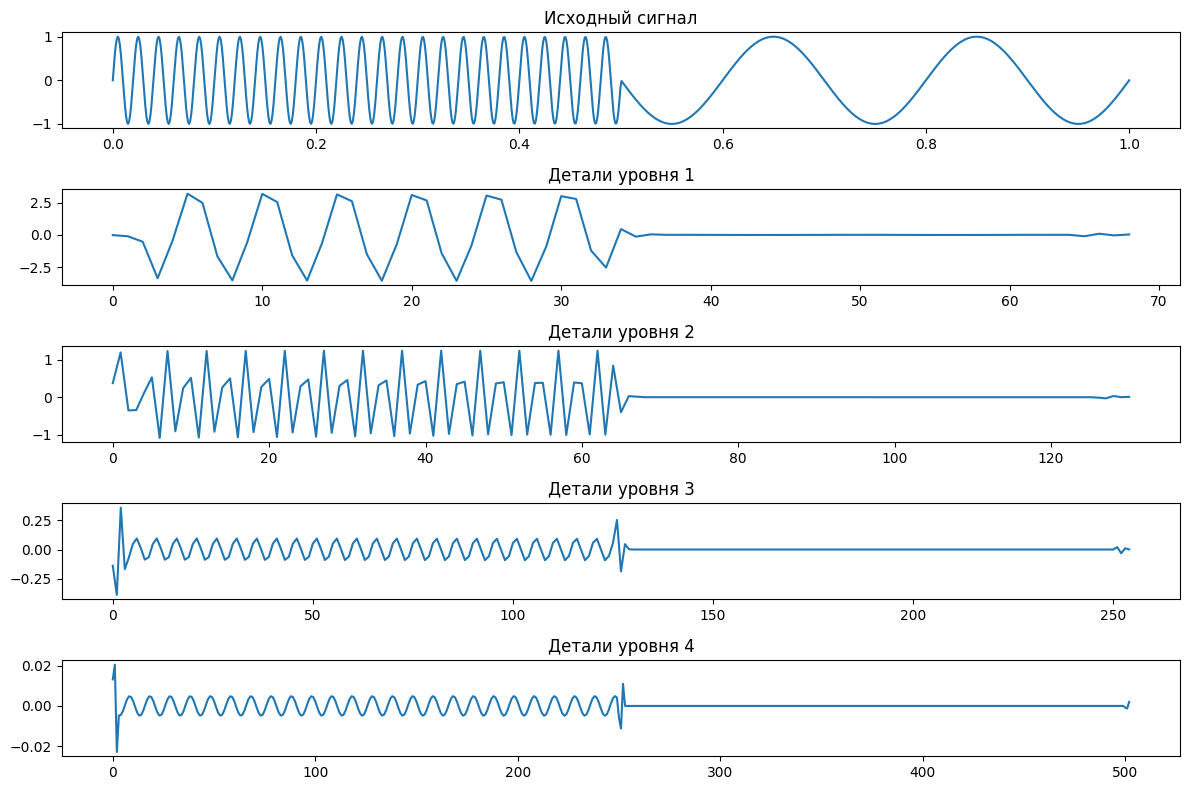

In [ ]:
'''
# Example
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 50 * t) * (t < 0.5) + np.sin(2 * np.pi * 5 * t) * (t >= 0.5)

# DWT
coeffs = pywt.wavedec(signal, 'db4', level=4)

approximation = coeffs[0]
details = coeffs[1:]

# Visual
plt.figure(figsize=(12, 8))
plt.subplot(5, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал")

for i, detail in enumerate(details, 1):
    plt.subplot(5, 1, i+1)
    plt.plot(detail)
    plt.title(f'Детали уровня {i}')

plt.tight_layout()
plt.show()
'''

In [ ]:
#record_path = "mit-bih-arrhythmia-database-1.0.0/100"

In [ ]:
#print(os.listdir("mit-bih-arrhythmia-database-1.0.0"))

['100.atr', '100.hea', '100.dat', '101.dat', '101.atr', '101.hea', '102.hea', '102.dat', '103.dat', '103.atr', '103.hea', '104.atr', '104.dat', '104.hea', '105.hea', '105.atr', '105.dat', '106.atr', '106.dat', '106.hea', '107.dat', '107.hea', '107.atr', '108.hea', '108.at_', '109.hea', '109.atr', '111.atr', '111.hea', '112.atr', '112.hea', '113.hea', '113.atr', '114.hea', '114.atr', '115.hea', '115.atr', '116.hea', '116.atr', '117.hea', '117.at_', '118.dat', '118.atr', '118.hea', '119.at_', '119.dat', '119.hea', '121.atr', '121.hea', '122.atr', '122.hea', '123.atr', '123.hea', '124.atr', '124.hea', '200.dat', '200.atr', '200.hea', '201.atr', '201.dat', '201.hea', '202.dat', '202.hea', '202.atr', '203.hea', '203.at_', '203.dat', '205.atr', '205.dat', '205.hea', '207.hea', '207.atr', '207.dat', '208.dat', '208.atr', '208.hea', '209.at_', '209.dat', '209.hea', '210.dat', '210.atr', '210.hea', '212.dat', '212.hea', '212.atr', '213.atr', '213.hea', '213.dat', '214.hea', '214.at_', '214.dat'

In [ ]:
'''
record = wfdb.rdrecord(record_path)
signal = record.p_signal[:, 0] #First channel
fs = record.fs  #Sampling frequency

print("Signal shape & signal", signal.shape, signal)
print("Sampling frequency: ", fs)
'''

Signal shape & signal (650000,) [-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]
Sampling frequency:  360


In [ ]:
data_path = "mit-bih-arrhythmia-database-1.0.0"

record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                  111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
                  122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
                  209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
                  222, 223, 228, 230, 231, 232, 233, 234]

all_signals = {}

for record_num in record_numbers:
    record_path = os.path.join(data_path, str(record_num))
    try:
        record = wfdb.rdrecord(record_path)
        signal = record.p_signal[:, 0]
        fs = record.fs

        all_signals[record_num] = {
            "signal": signal,
            "fs": fs
        }
        print(f"Запись {record_num} успешно обработана.")
    except FileNotFoundError as e:
        print(f"Файлы для записи {record_num} не найдены: {e}")

print(f"Всего обработано записей: {len(all_signals)}")


Запись 100 успешно обработана.
Запись 101 успешно обработана.
Запись 102 успешно обработана.
Запись 103 успешно обработана.
Запись 104 успешно обработана.
Запись 105 успешно обработана.
Запись 106 успешно обработана.
Запись 107 успешно обработана.
Запись 108 успешно обработана.
Запись 109 успешно обработана.
Запись 111 успешно обработана.
Запись 112 успешно обработана.
Запись 113 успешно обработана.
Запись 114 успешно обработана.
Запись 115 успешно обработана.
Запись 116 успешно обработана.
Запись 117 успешно обработана.
Запись 118 успешно обработана.
Запись 119 успешно обработана.
Запись 121 успешно обработана.
Запись 122 успешно обработана.
Запись 123 успешно обработана.
Запись 124 успешно обработана.
Запись 200 успешно обработана.
Запись 201 успешно обработана.
Запись 202 успешно обработана.
Запись 203 успешно обработана.
Запись 205 успешно обработана.
Запись 207 успешно обработана.
Запись 208 успешно обработана.
Запись 209 успешно обработана.
Запись 210 успешно обработана.
Запись 2

In [ ]:
all_signals

{100: {'signal': array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ]),
  'fs': 360},
 101: {'signal': array([-0.345, -0.345, -0.345, ..., -0.295, -0.29 ,  0.   ]),
  'fs': 360},
 102: {'signal': array([-0.2  , -0.2  , -0.2  , ..., -0.17 , -0.195,  0.   ]),
  'fs': 360},
 103: {'signal': array([-0.375, -0.375, -0.375, ..., -0.235, -0.245,  0.   ]),
  'fs': 360},
 104: {'signal': array([-0.15 , -0.15 , -0.15 , ..., -0.065, -0.06 ,  0.   ]),
  'fs': 360},
 105: {'signal': array([-0.445, -0.445, -0.445, ...,  0.59 ,  0.76 ,  1.28 ]),
  'fs': 360},
 106: {'signal': array([-0.31 , -0.31 , -0.31 , ...,  0.635,  0.265,  0.   ]),
  'fs': 360},
 107: {'signal': array([-2.045, -2.045, -2.045, ..., -0.645, -0.635,  0.   ]),
  'fs': 360},
 108: {'signal': array([-0.125, -0.125, -0.125, ..., -0.01 ,  0.04 ,  0.   ]),
  'fs': 360},
 109: {'signal': array([ 0.175,  0.175,  0.175, ..., -0.92 , -0.91 , -1.28 ]),
  'fs': 360},
 111: {'signal': array([-0.035, -0.035, -0.035, ...,  0.155,  0.2  ,  

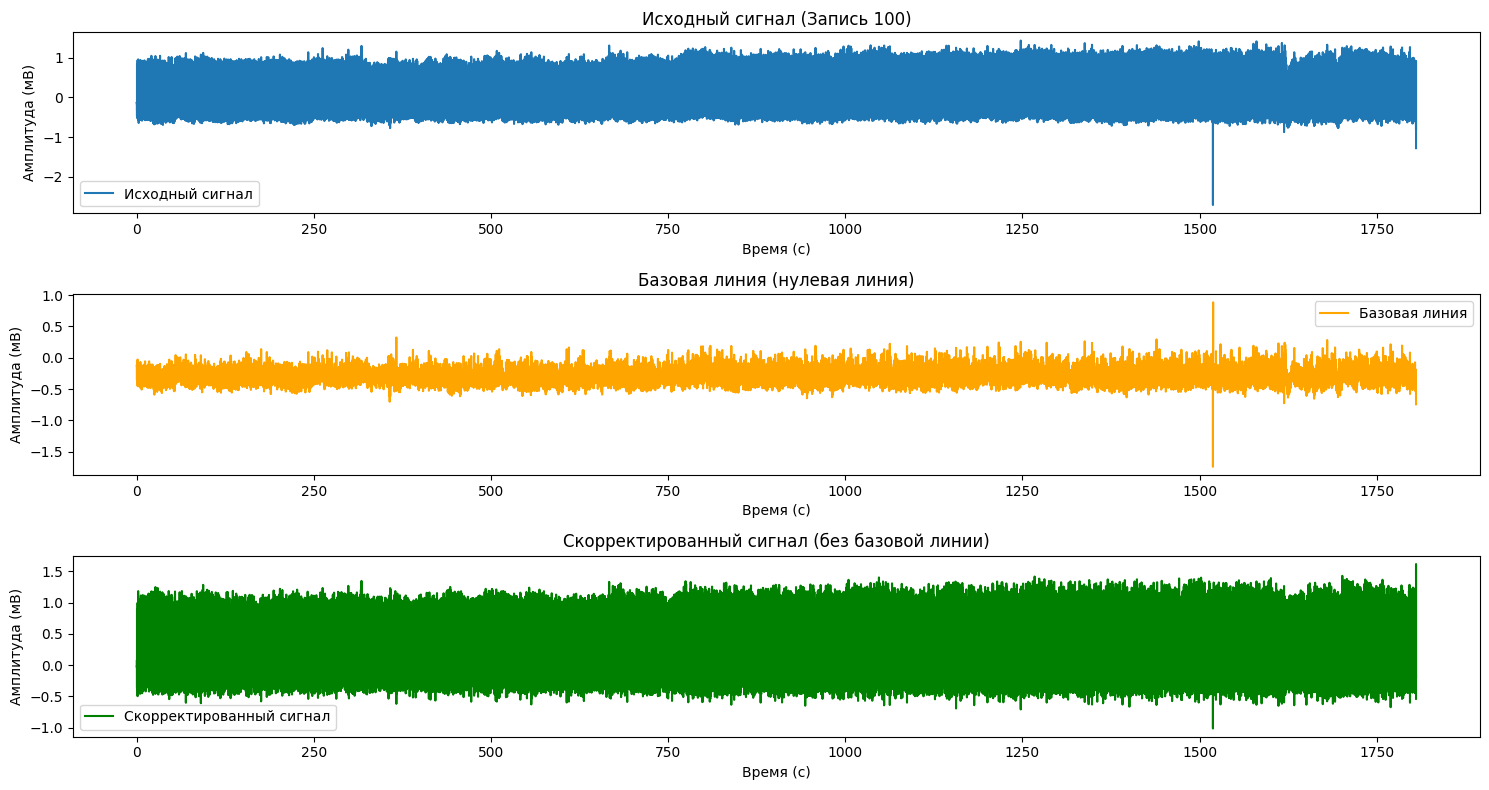

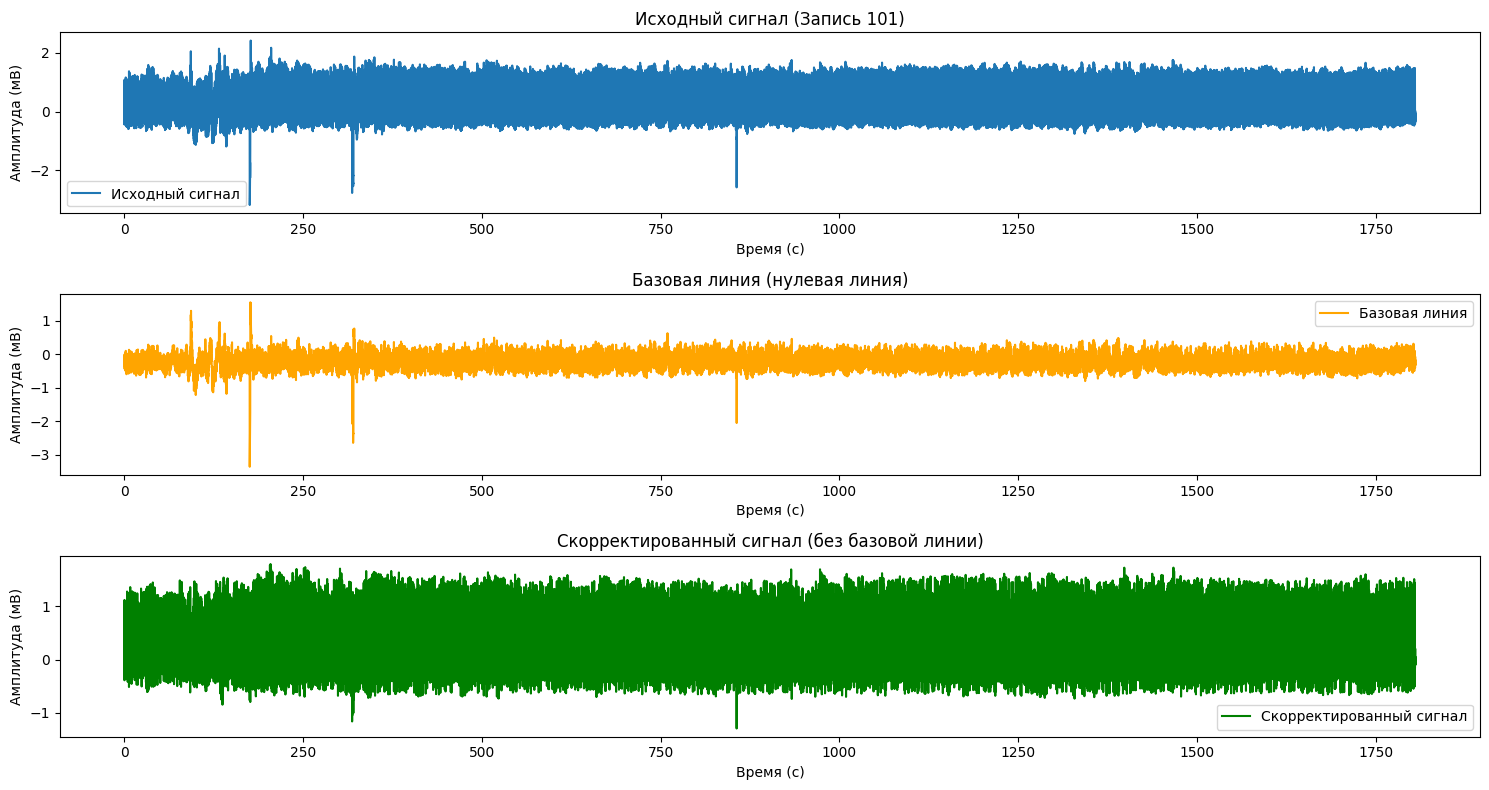

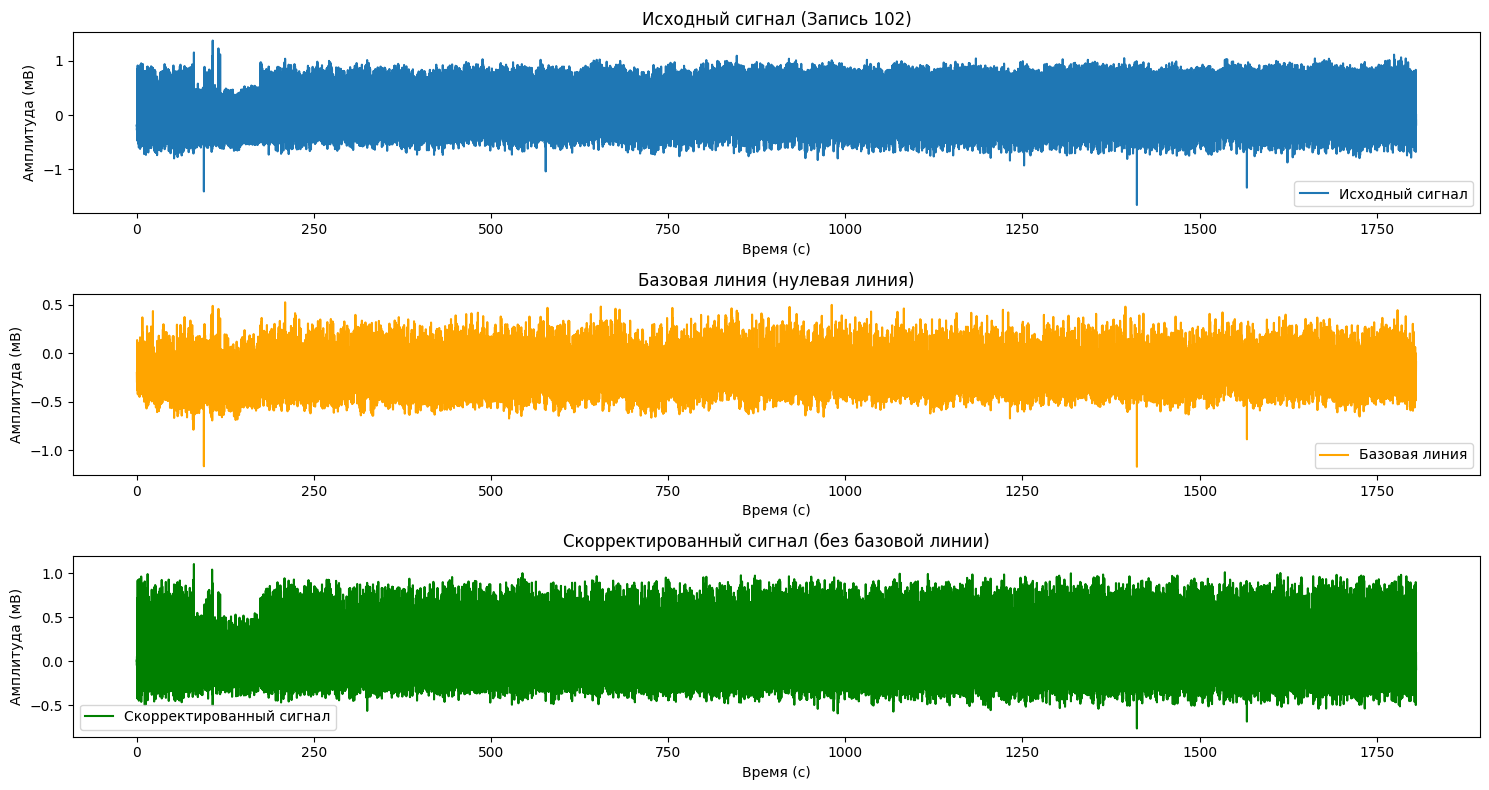

In [ ]:
wavelet = 'db4'
level = 5

example_records = [100, 101, 102]

# First 10 sec
segment_duration = 10


for record_num in example_records:
    if record_num not in all_signals:
        print(f"Запись {record_num} не найдена в словаре!")
        continue

    signal = all_signals[record_num]["signal"]
    fs = all_signals[record_num]["fs"]

    coeffs = pywt.wavedec(signal, wavelet, level=level)
    baseline = pywt.waverec([coeffs[0]] + [None] * level, wavelet)

    corrected_signal = signal - baseline[:len(signal)]

    time = np.linspace(0, len(signal) / fs, len(signal))

    plt.figure(figsize=(15, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, signal, label="Исходный сигнал")
    plt.title(f"Исходный сигнал (Запись {record_num})")
    plt.xlabel("Время (с)")
    plt.ylabel("Амплитуда (мВ)")
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(time, baseline[:len(signal)], label="Базовая линия", color="orange")
    plt.title("Базовая линия (нулевая линия)")
    plt.xlabel("Время (с)")
    plt.ylabel("Амплитуда (мВ)")
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(time, corrected_signal, label="Скорректированный сигнал", color="green")
    plt.title("Скорректированный сигнал (без базовой линии)")
    plt.xlabel("Время (с)")
    plt.ylabel("Амплитуда (мВ)")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
""" number = 102 """
signal

array([-0.2  , -0.2  , -0.2  , ..., -0.17 , -0.195,  0.   ])

In [ ]:
print(f"Среднее значение исходного сигнала: {np.mean(signal):.5f}")
print(f"Среднее значение скорректированного сигнала: {np.mean(corrected_signal):.5f}")


Среднее значение исходного сигнала: -0.24585
Среднее значение скорректированного сигнала: -0.00000


In [ ]:
print(f"Стандартное отклонение исходного сигнала: {np.std(signal):.5f}")
print(f"Стандартное отклонение скорректированного сигнала: {np.std(corrected_signal):.5f}")


Стандартное отклонение исходного сигнала: 0.19049
Стандартное отклонение скорректированного сигнала: 0.10722


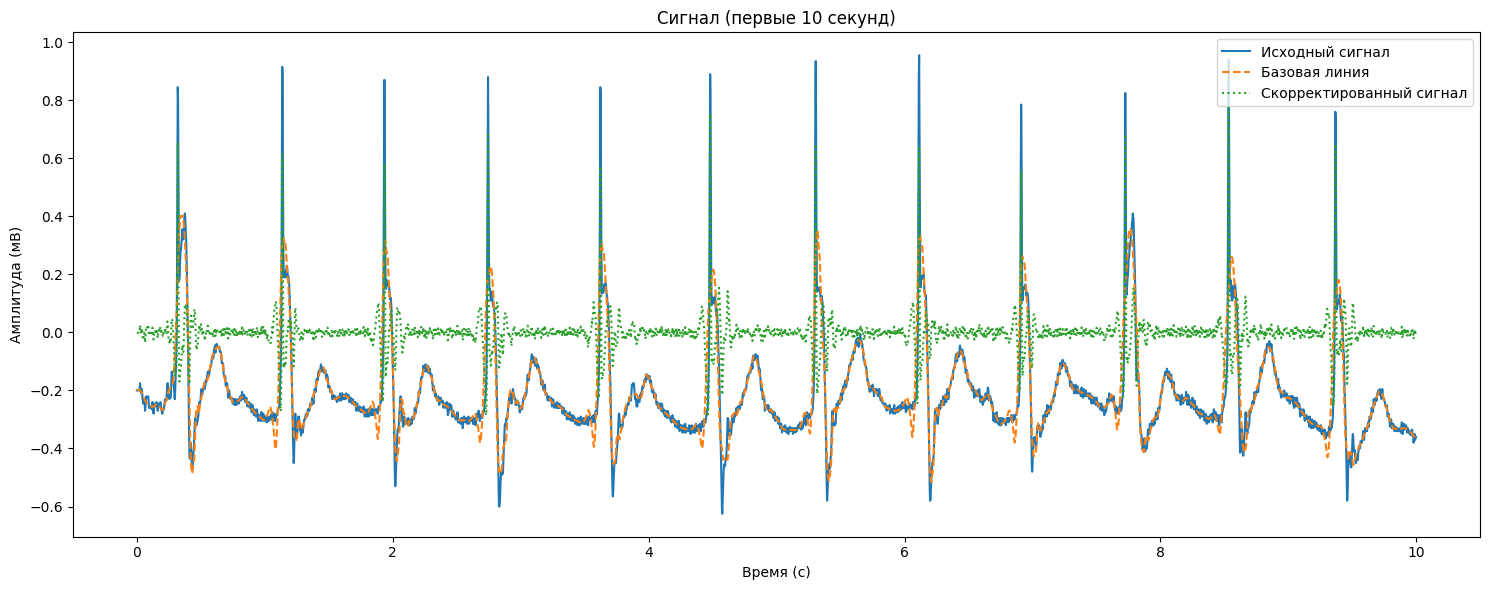

In [ ]:
# First 10 sec
segment_duration = 10
samples = int(segment_duration * fs)

time_segment = time[:samples]
signal_segment = signal[:samples]
corrected_segment = corrected_signal[:samples]
baseline_segment = baseline[:samples]

plt.figure(figsize=(15, 6))
plt.plot(time_segment, signal_segment, label="Исходный сигнал")
plt.plot(time_segment, baseline_segment, label="Базовая линия", linestyle="dashed")
plt.plot(time_segment, corrected_segment, label="Скорректированный сигнал", linestyle="dotted")
plt.title(f"Сигнал (первые {segment_duration} секунд)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда (мВ)")
plt.legend()
plt.tight_layout()
plt.show()


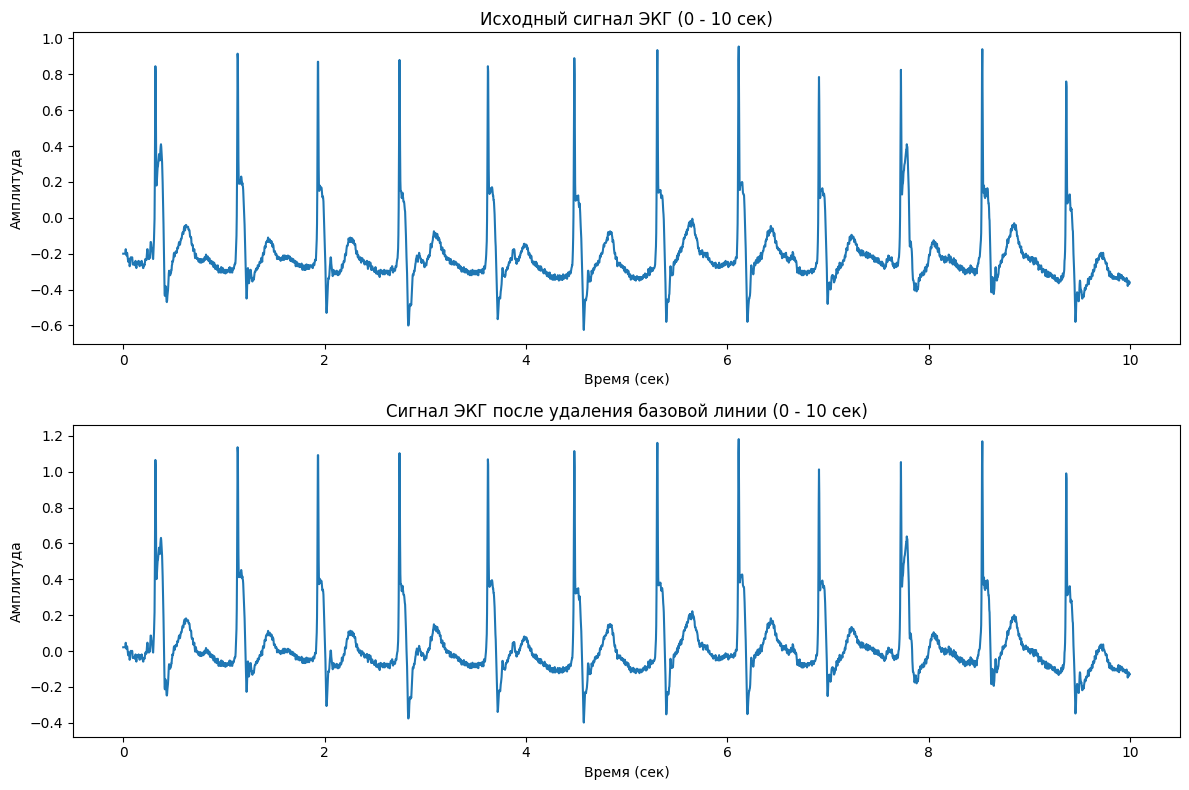

In [ ]:
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
record = wfdb.rdrecord(record_path)
signal = record.p_signal[:, 0]
fs = record.fs

wavelet = 'db6'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)

coeffs[0] = np.zeros_like(coeffs[0])

filtered_signal = pywt.waverec(coeffs, wavelet)
filtered_signal = filtered_signal[:len(signal)]  # Совмещение длины сигнала

start_time = 0
end_time = 10

start_index = int(start_time * fs)
end_index = int(end_time * fs)

time_axis = np.arange(start_index, end_index) / fs

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_axis, signal[start_index:end_index])
plt.title('Исходный сигнал ЭКГ ({} - {} сек)'.format(start_time, end_time))
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(time_axis, filtered_signal[start_index:end_index])
plt.title('Сигнал ЭКГ после удаления базовой линии ({} - {} сек)'.format(start_time, end_time))
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()


In [ ]:
max_level

15

In [ ]:
print(f"Среднее значение исходного сигнала: {np.mean(signal):.5f}")
print(f"Среднее значение скорректированного сигнала: {np.mean(filtered_signal):.5f}")

print(f"Стандартное отклонение исходного сигнала: {np.std(signal):.5f}")
print(f"Стандартное отклонение скорректированного сигнала: {np.std(filtered_signal):.5f}")


Среднее значение исходного сигнала: -0.24585
Среднее значение скорректированного сигнала: -0.00075
Стандартное отклонение исходного сигнала: 0.19049
Стандартное отклонение скорректированного сигнала: 0.19014


## Применение разных методов удаления БНЛ

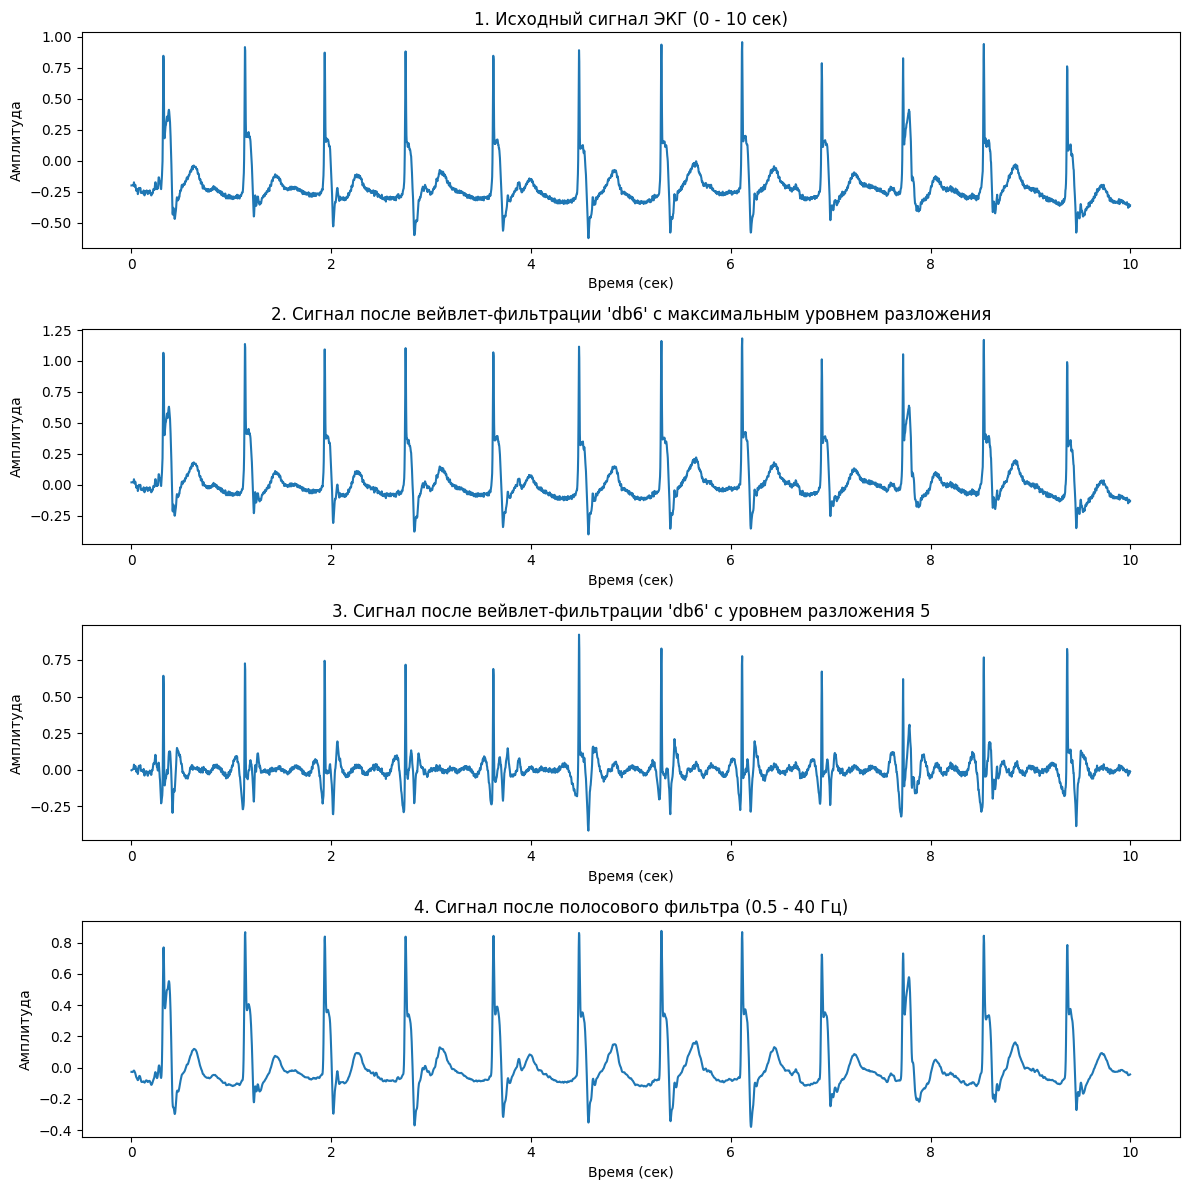

In [ ]:
from scipy.signal import butter, filtfilt

#102
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
record = wfdb.rdrecord(record_path)
signal = record.p_signal[:, 0]
fs = record.fs

start_time = 0
end_time = 10

start_index = int(start_time * fs)
end_index = int(end_time * fs)

time_axis = np.arange(start_index, end_index) / fs

# 1. Исходный сигнал
original_signal = signal[start_index:end_index]

# 2. Сигнал после удаления базовой линии с помощью вейвлета 'db6' с максимальным уровнем разложения
wavelet = 'db6'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs_max = pywt.wavedec(signal, wavelet, level=max_level)
coeffs_max[0] = np.zeros_like(coeffs_max[0])
filtered_signal_max = pywt.waverec(coeffs_max, wavelet)
filtered_signal_max = filtered_signal_max[:len(signal)]
filtered_signal_max = filtered_signal_max[start_index:end_index]

# 3. Сигнал после удаления базовой линии с помощью вейвлета 'db6' с уровнем разложения 5(как в прошлый раз)
level = 5
coeffs_level5 = pywt.wavedec(signal, wavelet, level=level)
coeffs_level5[0] = np.zeros_like(coeffs_level5[0])
filtered_signal_level5 = pywt.waverec(coeffs_level5, wavelet)
filtered_signal_level5 = filtered_signal_level5[:len(signal)]
filtered_signal_level5 = filtered_signal_level5[start_index:end_index]

# 4. Сигнал после обработки полосовым фильтро
lowcut = 0.5   # Нижняя частота среза в Гц
highcut = 40   # Верхняя частота среза в Гц
order = 2      # Порядок фильтра

nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
filtered_signal_bandpass = filtfilt(b, a, signal)
filtered_signal_bandpass = filtered_signal_bandpass[start_index:end_index]

plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(time_axis, original_signal)
plt.title('1. Исходный сигнал ЭКГ ({} - {} сек)'.format(start_time, end_time))
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 2)
plt.plot(time_axis, filtered_signal_max)
plt.title("2. Сигнал после вейвлет-фильтрации 'db6' с максимальным уровнем разложения")
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 3)
plt.plot(time_axis, filtered_signal_level5)
plt.title("3. Сигнал после вейвлет-фильтрации 'db6' с уровнем разложения 5")
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 4)
plt.plot(time_axis, filtered_signal_bandpass)
plt.title('4. Сигнал после полосового фильтра ({} - {} Гц)'.format(lowcut, highcut))
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()


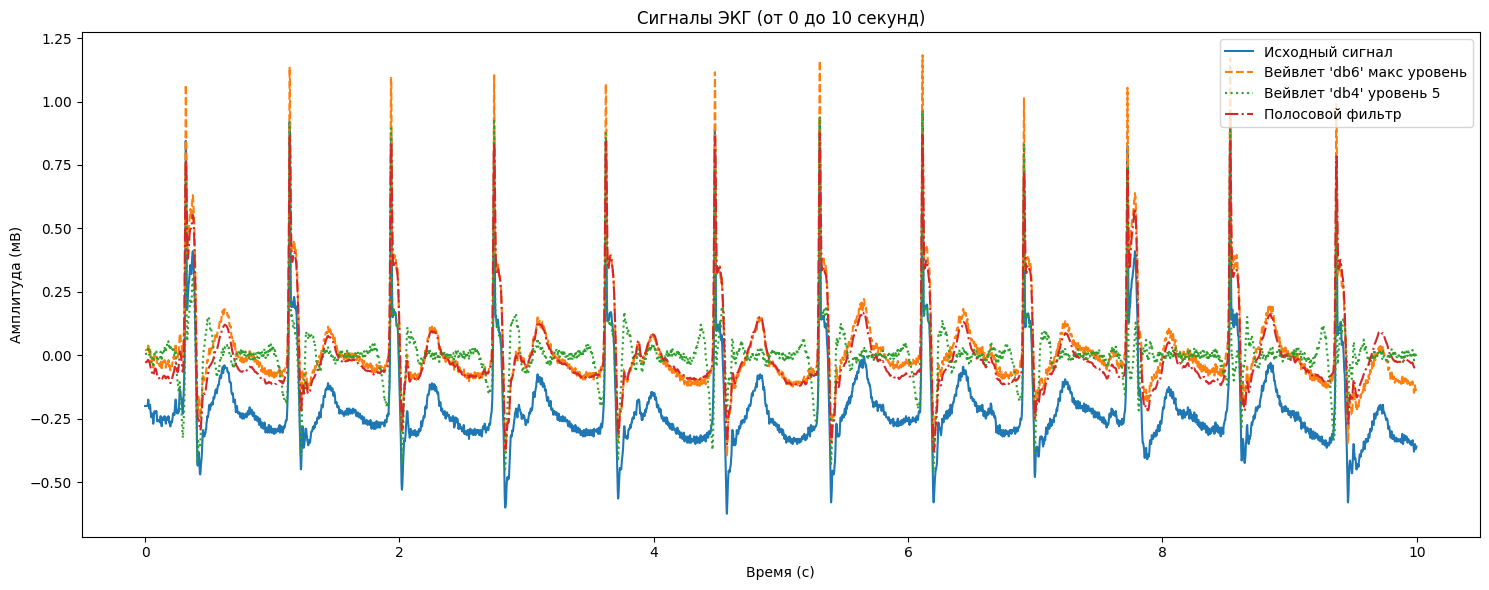

In [ ]:
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
record = wfdb.rdrecord(record_path)
signal = record.p_signal[:, 0]
fs = record.fs

start_time = 0
end_time = 10
segment_duration = end_time - start_time

start_index = int(start_time * fs)
end_index = int(end_time * fs)

time_segment = np.arange(start_index, end_index) / fs
signal_segment = signal[start_index:end_index]

# 1. Исходный сигнал уже определен как signal_segment

# 2. Сигнал после удаления базовой линии с помощью вейвлета 'db4' с максимальным уровнем разложения
wavelet = 'db6'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs_max = pywt.wavedec(signal, wavelet, level=max_level)
coeffs_max[0] = np.zeros_like(coeffs_max[0])  # Обнуление аппроксимационных коэффициентов на максимальном уровне
filtered_signal_max = pywt.waverec(coeffs_max, wavelet)
filtered_signal_max = filtered_signal_max[:len(signal)]
filtered_signal_max_segment = filtered_signal_max[start_index:end_index]

# 3. Сигнал после удаления базовой линии с помощью вейвлета 'db6' с уровнем разложения 5
wavelet = 'db4'
level = 5
coeffs_level5 = pywt.wavedec(signal, wavelet, level=level)
coeffs_level5[0] = np.zeros_like(coeffs_level5[0])
filtered_signal_level5 = pywt.waverec(coeffs_level5, wavelet)
filtered_signal_level5 = filtered_signal_level5[:len(signal)]
filtered_signal_level5_segment = filtered_signal_level5[start_index:end_index]

# 4. Сигнал после обработки полосовым фильтром
lowcut = 0.5   # Нижняя частота среза в Гц
highcut = 40   # Верхняя частота среза в Гц
order = 2      # Порядок фильтра

nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
filtered_signal_bandpass = filtfilt(b, a, signal)
filtered_signal_bandpass_segment = filtered_signal_bandpass[start_index:end_index]

# Построение всех сигналов на одном графике
plt.figure(figsize=(15, 6))
plt.plot(time_segment, signal_segment, label="Исходный сигнал")
plt.plot(time_segment, filtered_signal_max_segment, label="Вейвлет 'db6' макс уровень", linestyle="dashed")
plt.plot(time_segment, filtered_signal_level5_segment, label="Вейвлет 'db4' уровень 5", linestyle="dotted")
plt.plot(time_segment, filtered_signal_bandpass_segment, label="Полосовой фильтр", linestyle="dashdot")
plt.title(f"Сигналы ЭКГ (от {start_time} до {end_time} секунд)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда (мВ)")
plt.legend()
plt.tight_layout()
plt.show()


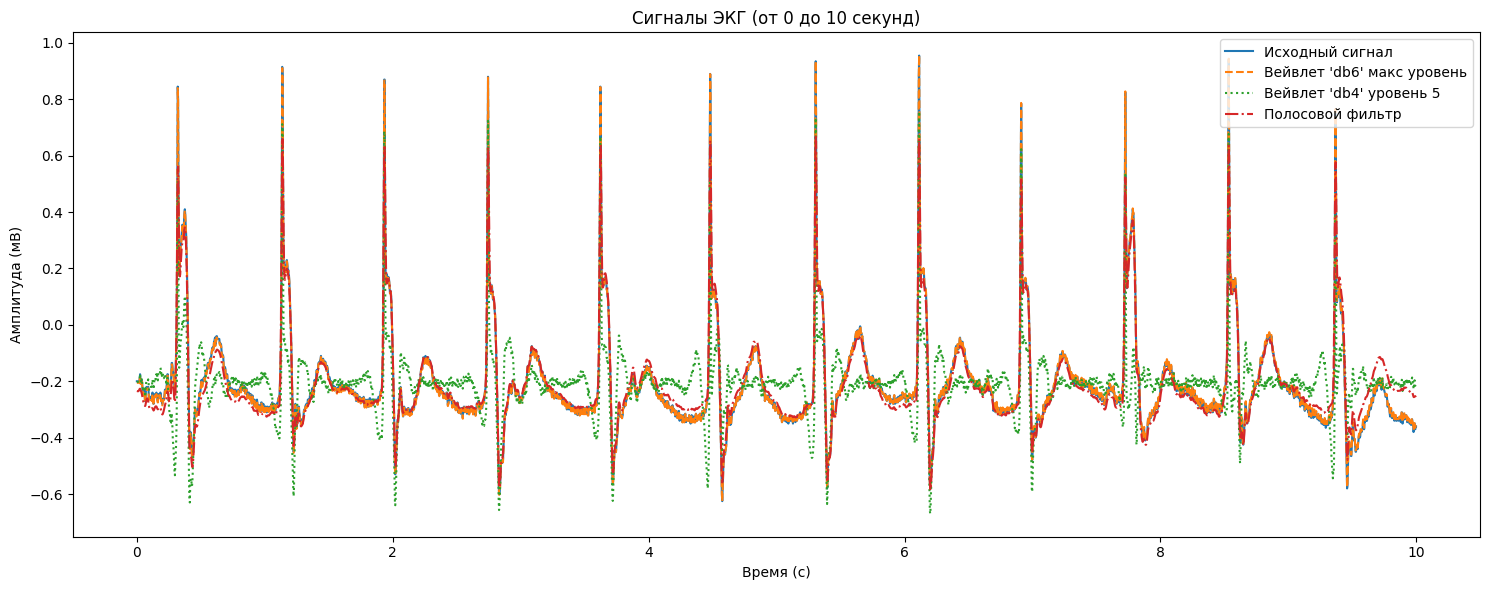

In [ ]:
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
record = wfdb.rdrecord(record_path)
signal = record.p_signal[:, 0]
fs = record.fs
start_time = 0
end_time = 10
segment_duration = end_time - start_time

start_index = int(start_time * fs)
end_index = int(end_time * fs)

time_segment = np.arange(start_index, end_index) / fs
signal_segment = signal[start_index:end_index]
original_mean = np.mean(signal_segment)

# 1. Исходный сигнал уже определен как signal_segment

# 2. Сигнал после удаления базовой линии с помощью вейвлета 'db6' с максимальным уровнем разложения
wavelet = 'db6'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs_max = pywt.wavedec(signal, wavelet, level=max_level)
coeffs_max[0] = np.zeros_like(coeffs_max[0])
filtered_signal_max = pywt.waverec(coeffs_max, wavelet)
filtered_signal_max = filtered_signal_max[:len(signal)]
filtered_signal_max_segment = filtered_signal_max[start_index:end_index]

# Выравнивание среднего значения
filtered_signal_max_segment -= np.mean(filtered_signal_max_segment)  # Центрируем вокруг нуля
filtered_signal_max_segment += original_mean  # Возвращаем среднее исходного сигнала

# 3. Сигнал после удаления базовой линии с помощью вейвлета 'db4' с уровнем разложения 5
wavelet = 'db4'
level = 5
coeffs_level5 = pywt.wavedec(signal, wavelet, level=level)
coeffs_level5[0] = np.zeros_like(coeffs_level5[0])
filtered_signal_level5 = pywt.waverec(coeffs_level5, wavelet)
filtered_signal_level5 = filtered_signal_level5[:len(signal)]
filtered_signal_level5_segment = filtered_signal_level5[start_index:end_index]

# Выравнивание среднего значения
filtered_signal_level5_segment -= np.mean(filtered_signal_level5_segment)
filtered_signal_level5_segment += original_mean

# 4. Сигнал после обработки полосовым фильтром
lowcut = 0.5   # Нижняя частота среза в Гц
highcut = 40   # Верхняя частота среза в Гц
order = 2      # Порядок фильтра

nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
filtered_signal_bandpass = filtfilt(b, a, signal)
filtered_signal_bandpass_segment = filtered_signal_bandpass[start_index:end_index]

filtered_signal_bandpass_segment -= np.mean(filtered_signal_bandpass_segment)
filtered_signal_bandpass_segment += original_mean

plt.figure(figsize=(15, 6))
plt.plot(time_segment, signal_segment, label="Исходный сигнал")
plt.plot(time_segment, filtered_signal_max_segment, label="Вейвлет 'db6' макс уровень", linestyle="dashed")
plt.plot(time_segment, filtered_signal_level5_segment, label="Вейвлет 'db4' уровень 5", linestyle="dotted")
plt.plot(time_segment, filtered_signal_bandpass_segment, label="Полосовой фильтр", linestyle="dashdot")
plt.title(f"Сигналы ЭКГ (от {start_time} до {end_time} секунд)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда (мВ)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def calculate_snr(original, processed): #соотношение сигнал/шум
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - processed) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_rmse(original, processed): #MSE и RMSE(отклонения)
    mse = mean_squared_error(original, processed)
    rmse = np.sqrt(mse)
    return rmse

def plot_spectrum(signal, fs, label): #спектры
    freqs = np.fft.rfftfreq(len(signal), d=1/fs)
    fft_vals = np.abs(np.fft.rfft(signal))
    plt.plot(freqs, fft_vals, label=label)




In [ ]:
snr_max = calculate_snr(signal_segment, filtered_signal_max_segment)
snr_level5 = calculate_snr(signal_segment, filtered_signal_level5_segment)
snr_bandpass = calculate_snr(signal_segment, filtered_signal_bandpass_segment)

print(f"SNR после вейвлет-фильтрации (макс уровень): {snr_max:.2f} дБ")
print(f"SNR после вейвлет-фильтрации (уровень 5): {snr_level5:.2f} дБ")
print(f"SNR после полосового фильтра: {snr_bandpass:.2f} дБ")
print("---------")
print("Больше = лучше")

SNR после вейвлет-фильтрации (макс уровень): 38.63 дБ
SNR после вейвлет-фильтрации (уровень 5): 6.47 дБ
SNR после полосового фильтра: 16.40 дБ
---------
Больше = лучше


In [ ]:
rmse_max = calculate_rmse(signal_segment, filtered_signal_max_segment)
rmse_level5 = calculate_rmse(signal_segment, filtered_signal_level5_segment)
rmse_bandpass = calculate_rmse(signal_segment, filtered_signal_bandpass_segment)

print(f"RMSE после вейвлет-фильтрации (макс уровень): {rmse_max:.4f}")
print(f"RMSE после вейвлет-фильтрации (уровень 5): {rmse_level5:.4f}")
print(f"RMSE после полосового фильтра: {rmse_bandpass:.4f}")
print("---------")
print("Меньше = лучше")

RMSE после вейвлет-фильтрации (макс уровень): 0.0032
RMSE после вейвлет-фильтрации (уровень 5): 0.1291
RMSE после полосового фильтра: 0.0411
---------
Меньше = лучше


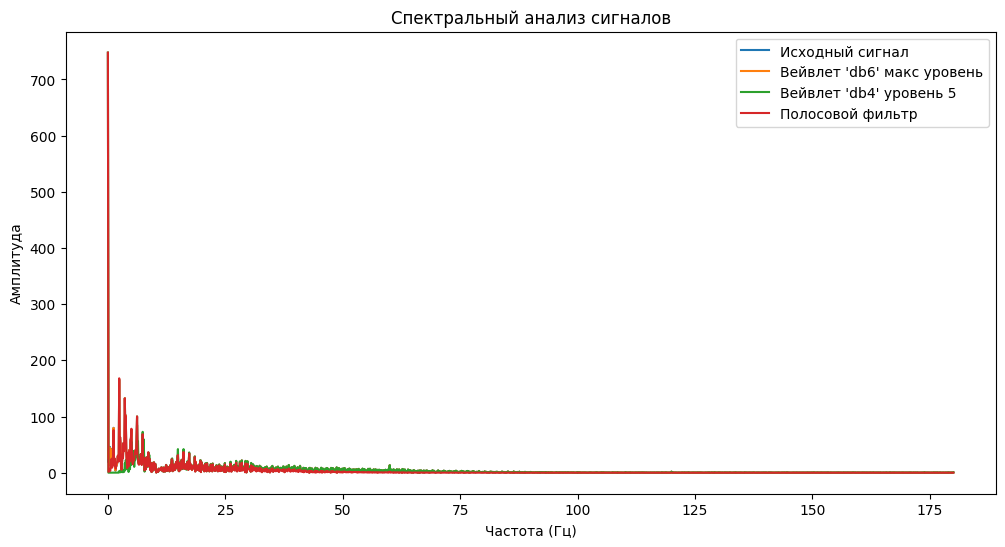

In [ ]:
plt.figure(figsize=(12, 6))
plot_spectrum(signal_segment, fs, 'Исходный сигнал')
plot_spectrum(filtered_signal_max_segment, fs, "Вейвлет 'db6' макс уровень")
plot_spectrum(filtered_signal_level5_segment, fs, "Вейвлет 'db4' уровень 5")
plot_spectrum(filtered_signal_bandpass_segment, fs, 'Полосовой фильтр')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектральный анализ сигналов')
plt.legend()
plt.show()

In [ ]:
!pip install biosppy

In [ ]:
from biosppy.signals import ecg

out_original = ecg.ecg(signal=signal_segment, sampling_rate=fs, show=False)
r_peaks_original = out_original['rpeaks']

out_filtered_max = ecg.ecg(signal=filtered_signal_max_segment, sampling_rate=fs, show=False)
r_peaks_filtered_max = out_filtered_max['rpeaks']

# R-пики в сигналах
print(f"Количество R-пиков в исходном сигнале: {len(r_peaks_original)}")
print(f"Количество R-пиков после вейвлет-фильтрации (макс уровень): {len(r_peaks_filtered_max)}")

Количество R-пиков в исходном сигнале: 12
Количество R-пиков после вейвлет-фильтрации (макс уровень): 12


## Разложение по частотам

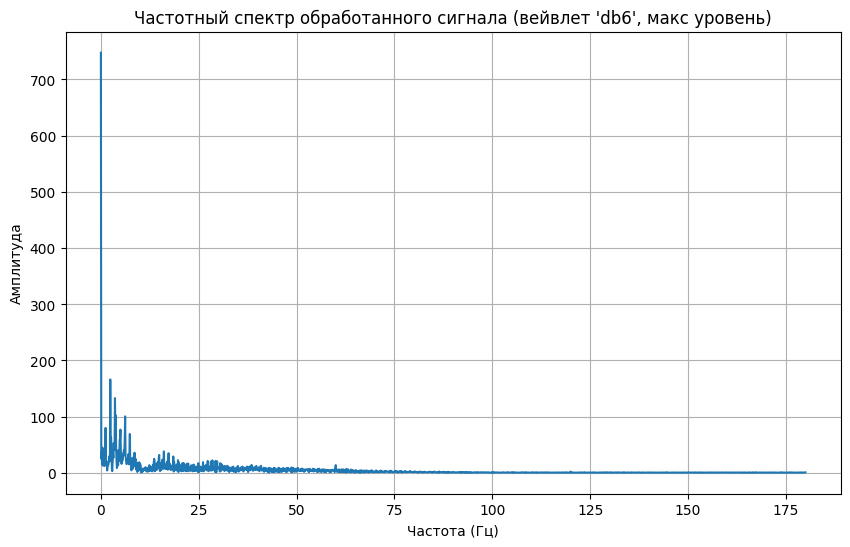

In [ ]:
fft_vals = np.fft.rfft(filtered_signal_max_segment)
fft_freqs = np.fft.rfftfreq(len(filtered_signal_max_segment), d=1/fs)

plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.title("Частотный спектр обработанного сигнала (вейвлет 'db6', макс уровень)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

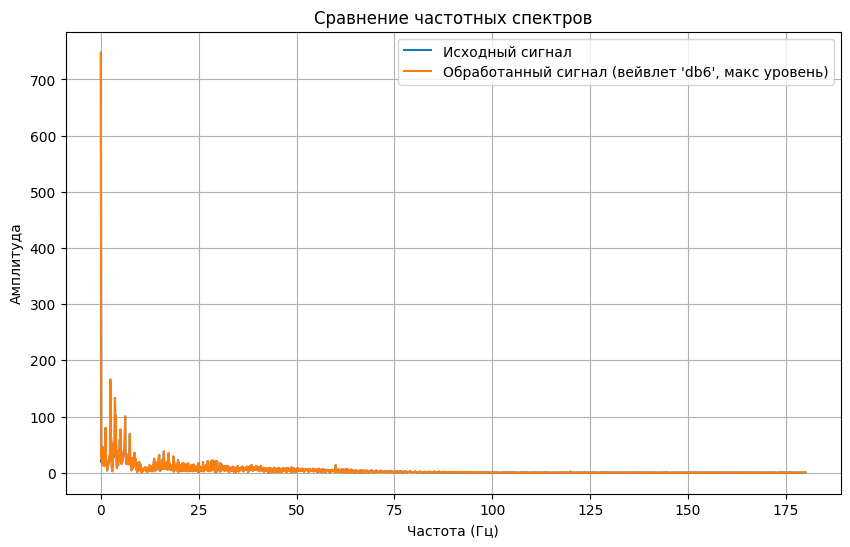

In [ ]:
# FFT исходного сигнала
fft_vals_original = np.fft.rfft(signal_segment)
fft_freqs_original = np.fft.rfftfreq(len(signal_segment), d=1/fs)

# Построение спектров
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs_original, np.abs(fft_vals_original), label='Исходный сигнал')
plt.plot(fft_freqs, np.abs(fft_vals), label="Обработанный сигнал (вейвлет 'db6', макс уровень)")
plt.title("Сравнение частотных спектров")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()


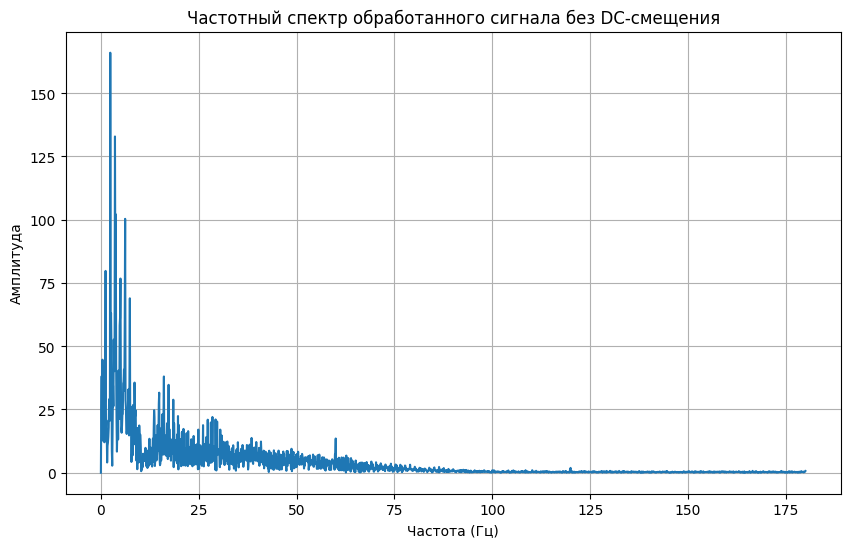

In [ ]:
# DC смещение
processed_signal_centered = filtered_signal_max_segment - np.mean(filtered_signal_max_segment)

fft_vals = np.fft.rfft(processed_signal_centered)
fft_freqs = np.fft.rfftfreq(len(processed_signal_centered), d=1/fs)

plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.title("Частотный спектр обработанного сигнала без DC-смещения")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


## **Анализ {102} сигнала по частотам**
Пик на низких частотах (около 0–10 Гц):
Это ключевой диапазон, в котором находится основная информация ЭКГ.
В этом диапазоне содержатся волны P, QRS-комплексы и волны T. Это частоты, связанные с электрической активностью сердца.

Снижение амплитуды после 10 Гц:
После пика на низких частотах амплитуда постепенно уменьшается. Это ожидаемо, так как основная информация ЭКГ сосредоточена в диапазоне от 0.5 до 50 Гц.

Пик около 50–60 Гц:
Этот пик обычно связан с электрическими помехами от сети электропитания. В большинстве стран частота сети составляет 50 Гц или 60 Гц.

Высокочастотные компоненты (>60 Гц):
Амплитуда на высоких частотах (выше 60 Гц) близка к нулю. Это нормально, так как высокочастотный шум уже может быть минимальным в этом сигнале.

#**Отчет по 1 семестру**

1. Присуствовал на *всех* НИ семинарах

2. Докладывал на *некоторых* НИ семинарах

3. Присутсвовал на конференции "Фундаментальная наука и приоритеты XXI века"
(29.11)

4. Присутвовал на конференции по computer vision "YOLO Vision 2024"
(27.09)

5. Присутствовал на конференции
(14.11)

6. Присутствовал на мехматских спецсеминарах кафедры МаТИС: "Нейронные сети"

7. Представил свою НИР на конкурс НИР в филиале

# Обучение модели (similarity)

In [ ]:
import numpy as np
from scipy.signal import stft

import torchvision.transforms as T
import torchvision.transforms.functional as F
from PIL import Image

In [ ]:
def load_and_preprocess(record_path, channel=0, segment_duration=5, wavelet='db6'):

    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel]
    fs = record.fs

    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    filtered_signal = filtered_signal[:len(signal)]

    segment_length = int(segment_duration * fs)
    total_length = len(filtered_signal)
    num_segments = total_length // segment_length

    segments = []
    for i in range(num_segments):
        start_idx = i * segment_length
        end_idx = start_idx + segment_length
        seg = filtered_signal[start_idx:end_idx]
        segments.append(seg)

    return segments, fs

In [ ]:
def get_2d_representation(signal, fs=360, nperseg=128, noverlap=64):

    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    # f = ndarray - Array of sample frequencies.
    # t = ndarray - Array of segment times.
    # Zxx = ndarray - STFT of x

    magnitude = np.abs(Zxx)

    #На выходе получим [C, H, W]. У нас C=1, H=F, W=T
    image = torch.tensor(magnitude, dtype=torch.float32).unsqueeze(0)  # [1, F, T]

    return image

In [ ]:
def augment(image_tensor):

    img_np = image_tensor.squeeze(0).cpu().numpy()  # [H, W]
    img_pil = Image.fromarray(img_np, mode='F')

    transform = T.Compose([
        T.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
        T.RandomHorizontalFlip(p=0.5),
    ])

    img_pil_aug = transform(img_pil)

    img_aug_tensor = F.to_tensor(img_pil_aug)
    return img_aug_tensor

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, segments, fs=360):

        self.segments = segments
        self.fs = fs

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        segment = self.segments[idx]
        image = get_2d_representation(segment, fs=self.fs)
        return image


In [ ]:
"""

batch_size = 32
dataset = CustomDataset(segments, fs=fs)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

"""

'\n\nbatch_size = 32\ndataset = CustomDataset(segments, fs=fs)\ndataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)\n\n'

In [ ]:
import torch.nn as nn
import torchvision.models as models

resnet = models.resnet50(pretrained=False)

encoder = nn.Sequential(*list(resnet.children())[:-1])
# убираем последний FC слой чтобы использовать ResNet как энкодер признаков:

projector = nn.Sequential(
    nn.Linear(2048, 256),
    nn.ReLU(),
    nn.Linear(256, 128)
)

# Не забыть
# cpu -> cuda

encoder = encoder.cpu()
projector = projector.cpu()

dummy = torch.randn(8, 1, 224, 224).cpu()  # [B, 1, H, W]
dummy_3c = dummy.repeat(1, 3, 1, 1)  # теперь [B, 3, H, W]
with torch.no_grad():
  h = encoder(dummy_3c)
  h = h.squeeze()
  z = projector(h)
print(z.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([8, 128])


In [ ]:
def info_nce_loss(z1, z2, temperature=0.5):

    z1 = z1 / z1.norm(p=2, dim=1, keepdim=True)
    z2 = z2 / z2.norm(p=2, dim=1, keepdim=True)

    batch_size = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim_matrix = torch.matmul(z, z.T)
    mask = ~torch.eye(2 * batch_size, dtype=torch.bool, device=z1.device)
    sim_matrix = sim_matrix[mask].view(2 * batch_size, 2 * batch_size - 1)
    sim_matrix = sim_matrix / temperature

    labels = torch.arange(batch_size, device=z1.device) + batch_size
    loss_z1 = -torch.log_softmax(sim_matrix[:batch_size], dim=1)[
        torch.arange(batch_size), labels - batch_size
    ]
    loss_z2 = -torch.log_softmax(sim_matrix[batch_size:], dim=1)[
        torch.arange(batch_size), torch.arange(batch_size)
    ]

    return (loss_z1.mean() + loss_z2.mean()) / 2

In [ ]:
!pip install infonce

In [ ]:
"""
from infonce import InfoNCELoss

loss_fn = InfoNCELoss(temperature=0.07)
# augmentation1 and augmentation2 are two different augmentations of the same batch
features1 = model(augmentations1)
features2 = model(augmentations2)
features = torch.stack([features1, features2], dim=0)
loss = loss_fn(features)

"""

In [ ]:
import torch.optim as optim

num_epochs = 1
batch_size = 32
learning_rate = 1e-3

NUMBER = 100

segments, fs = load_and_preprocess(f"mit-bih-arrhythmia-database-1.0.0/{NUMBER}", channel=0, segment_duration=5)

dataset = CustomDataset(segments, fs=fs)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=learning_rate)

encoder.train()
projector.train()

for epoch in range(num_epochs):
    total_loss = 0.0
    for batch_images in dataloader:
        #batch_images: [B, 1, H, W]
        batch_images = batch_images.cpu()

        aug1 = []
        aug2 = []
        for img in batch_images:
            a1 = augment(img)
            a2 = augment(img)

            aug1.append(a1)
            aug2.append(a2)

        aug1 = torch.cat(aug1, dim=0).cpu()
        aug2 = torch.cat(aug2, dim=0).cpu()

        if aug1.size(1) == 1:
            aug1 = aug1.repeat(1, 3, 1, 1)
            aug2 = aug2.repeat(1, 3, 1, 1)

        #print(aug1.shape)
        #print(aug2.shape)
        if aug1.dim() == 3:
            aug1 = aug1.unsqueeze(1).repeat(1, 3, 1, 1)
        if aug2.dim() == 3:
            aug2 = aug2.unsqueeze(1).repeat(1, 3, 1, 1)

        h1 = encoder(aug1)
        h1 = h1.squeeze()
        z1 = projector(h1)

        h2 = encoder(aug2)
        h2 = h2.squeeze()
        z2 = projector(h2)

        loss = info_nce_loss(z1, z2, temperature=0.5)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


AttributeError: partially initialized module 'torch' has no attribute 'types' (most likely due to a circular import)

# Обучение 1D ResNET

In [ ]:
import wfdb
import numpy as np
import torch

def load_and_segment_ecg(record_path, channel_indices=[0, 1], segment_duration=5):
    """
    Загружает сигнал ЭКГ из записи MIT-BIH и разбивает его на сегменты заданной длительности.

    Параметры:
      - record_path: строка, путь к записи (например, "mit-bih-arrhythmia-database-1.0.0/102")
      - channel_indices: список индексов каналов (для MIT-BIH обычно [0, 1])
      - segment_duration: длительность сегмента в секундах (например, 5 секунд)

    Возвращает:
      - segments: список тензоров, каждый из которых имеет форму [C, L]
      - fs: частота дискретизации записи
    """
    record = wfdb.rdrecord(record_path)
    # Извлекаем выбранные каналы – получаем массив формы [N, num_channels]
    signal = record.p_signal[:, channel_indices]
    fs = record.fs
    segment_length = int(segment_duration * fs)
    total_length = signal.shape[0]
    num_segments = total_length // segment_length

    segments = []
    for i in range(num_segments):
        seg = signal[i * segment_length : (i+1) * segment_length, :]
        # Транспонируем, чтобы получить форму [C, L]
        seg = seg.T
        segments.append(torch.tensor(seg, dtype=torch.float32))
    return segments, fs

# Пример использования:
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
segments, fs = load_and_segment_ecg(record_path, channel_indices=[0, 1], segment_duration=5)
print(f"Количество сегментов: {len(segments)}")
print(f"Размер первого сегмента: {segments[0].shape}")  # Ожидается [2, 1800] при fs=360


Количество сегментов: 361
Размер первого сегмента: torch.Size([2, 1800])


In [ ]:
from torch.utils.data import Dataset

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        """
        segments: список тензоров, каждый из которых имеет форму [C, L]
        augment_fn: функция аугментации для 1D-сигнала, применяемая к каждому сегменту
        """
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        x = self.segments[idx]
        if self.augment_fn:
            # Применяем аугментацию дважды для получения двух разных версий
            x1 = self.augment_fn(x)
            x2 = self.augment_fn(x)
            return x1, x2
        else:
            return x, x

# Пример простой аугментации для 1D-сигнала:
def simple_augment(signal, noise_std=0.01):
    """
    Добавляет Гауссов шум к сигналу.
    signal: тензор [C, L]
    """
    noise = torch.randn_like(signal) * noise_std
    return signal + noise

# Создаем датасет:
dataset = ContrastiveECGDataset(segments, augment_fn=simple_augment)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=7, stride=1, downsample=None):
        super(ResidualBlock1D, self).__init__()
        padding = (kernel_size - 1) // 2
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size,
                               stride=stride, padding=padding, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size,
                               stride=1, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

class ResNet1D(nn.Module):
    def __init__(self, in_channels, proj_dim=128):
        """
        in_channels: число каналов на входе (например, 2 для MIT-BIH)
        proj_dim: размерность выходного пространства признаков (для контрастивного обучения)
        """
        super(ResNet1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        # Определяем слои по типу ResNet (можно регулировать число блоков)
        self.layer1 = self._make_layer(64, 64, blocks=2, stride=1)
        self.layer2 = self._make_layer(64, 128, blocks=2, stride=2)
        self.layer3 = self._make_layer(128, 256, blocks=2, stride=2)
        self.layer4 = self._make_layer(256, 512, blocks=2, stride=2)

        # Глобальное среднее пуллирование по временной оси
        self.avgpool = nn.AdaptiveAvgPool1d(1)  # Выход: [B, 512, 1]

        # Проекционная голова для контрастивного обучения
        self.fc = nn.Linear(512, proj_dim)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        layers = []
        layers.append(ResidualBlock1D(in_channels, out_channels, kernel_size=7, stride=stride, downsample=downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock1D(out_channels, out_channels, kernel_size=7))
        return nn.Sequential(*layers)

    def forward(self, x):
        # x имеет форму [B, C, L]
        x = self.conv1(x)   # -> [B, 64, L/2]
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x) # -> [B, 64, L/4]

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)  # -> [B, 512, 1]
        x = x.squeeze(-1)    # -> [B, 512]
        x = self.fc(x)       # -> [B, proj_dim]
        return x

# Пример проверки модели:
# Пусть у нас 2 канала, и длина сегмента L = 1800 (5 секунд при 360 Гц)
dummy_input = torch.randn(8, 2, 1800)  # батч из 8 примеров
model = ResNet1D(in_channels=2, proj_dim=128)
output = model(dummy_input)
print(output.shape)  # Ожидается: [8, 128]


torch.Size([8, 128])


In [ ]:
import wfdb
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pywt
import random
import wandb

# Инициализация wandb
wandb.init(project="ecg-contrastive", config={
    "segment_duration": 5,
    "fs": 360,
    "noise_std": 0.01,
    "crop_ratio": 0.9,
    "batch_size": 32,
    "num_epochs": 20,
    "learning_rate": 1e-3
})
config = wandb.config

##########################
# 1. Предобработка: удаление базовой линии
##########################
def remove_baseline(signal, wavelet='db6'):
    """Удаляет блуждающую базовую линию с помощью вейвлет-преобразования."""
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])  # Обнуление аппроксимационных коэффициентов
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

##########################
# 2. Аугментации для 1D-сигнала
##########################
def augment_ecg(signal, noise_std=0.01, crop_ratio=0.9):
    """
    Применяет аугментации к 1D-сигналу:
      - Случайный кроп (crop) по времени.
      - Добавление Гауссова шума (аналог amplitude distortion).
    signal: тензор [C, L]
    """
    # Случайный кроп: выбираем случайную под-область по времени
    _, L = signal.shape
    crop_length = int(L * crop_ratio)
    start = random.randint(0, L - crop_length)
    cropped = signal[:, start:start+crop_length]

    # Затем можно растянуть обратно до исходной длины, если нужно:
    # Здесь для простоты оставляем кроп как есть.
    # Добавляем Гауссов шум:
    noise = torch.randn_like(cropped) * noise_std
    augmented = cropped + noise
    return augmented

##########################
# 3. Датасет для контрастивного обучения
##########################
class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        """
        segments: список тензоров [C, L] – сегменты сырых сигналов (с baseline удалённым)
        augment_fn: функция аугментации для 1D-сигнала
        """
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        # Берем сегмент и удаляем baseline
        seg = self.segments[idx]  # [C, L]
        seg_np = seg.numpy()  # переводим в numpy для обработки
        seg_filtered = remove_baseline(seg_np)  # baseline removal
        seg_filtered = torch.tensor(seg_filtered, dtype=torch.float32).unsqueeze(0) if seg.ndim==1 else torch.tensor(seg_filtered, dtype=torch.float32)
        # Ожидается форма [C, L] (например, [2, L])
        # Применяем аугментации дважды:
        if self.augment_fn:
            aug1 = self.augment_fn(seg_filtered)
            aug2 = self.augment_fn(seg_filtered)
        else:
            aug1, aug2 = seg_filtered, seg_filtered
        return aug1, aug2

##########################
# 4. Загрузка и сегментация сигнала
##########################
def load_and_segment_ecg(record_path, channel_indices=[0,1], segment_duration=5):
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel_indices]  # форма [N, C]
    fs = record.fs
    segment_length = int(segment_duration * fs)
    total_length = signal.shape[0]
    num_segments = total_length // segment_length
    segments = []
    for i in range(num_segments):
        seg = signal[i*segment_length:(i+1)*segment_length, :]
        seg = seg.T  # трансформируем в [C, L]
        segments.append(torch.tensor(seg, dtype=torch.float32))
    return segments, fs

# Загрузим сегменты (например, для записи 102)
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
segments, fs = load_and_segment_ecg(record_path, channel_indices=[0,1], segment_duration=config.segment_duration)
print(f"Сегментов: {len(segments)}; Первый сегмент: {segments[0].shape}")

# Создаем датасет
dataset = ContrastiveECGDataset(segments, augment_fn=lambda x: augment_ecg(x, noise_std=config.noise_std, crop_ratio=config.crop_ratio))
dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)

##########################
# 5. Модель: 1D-ResNet (как ранее определяли)
##########################
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=7, stride=1, downsample=None):
        super(ResidualBlock1D, self).__init__()
        padding = (kernel_size - 1) // 2
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=1, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        return self.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, proj_dim=128):
        super(ResNet1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, blocks=2, stride=1)
        self.layer2 = self._make_layer(64, 128, blocks=2, stride=2)
        self.layer3 = self._make_layer(128, 256, blocks=2, stride=2)
        self.layer4 = self._make_layer(256, 512, blocks=2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, proj_dim)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        layers = [ResidualBlock1D(in_channels, out_channels, kernel_size=7, stride=stride, downsample=downsample)]
        for _ in range(1, blocks):
            layers.append(ResidualBlock1D(out_channels, out_channels, kernel_size=7))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))  # [B, 64, L/2]
        x = self.maxpool(x)  # [B, 64, L/4]
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)  # [B, 512, 1]
        x = x.squeeze(-1)    # [B, 512]
        x = self.fc(x)       # [B, proj_dim]
        return x

model = ResNet1D(in_channels=2, proj_dim=128)
model = model.cuda()

##########################
# 6. Контрастивная функция потерь (используем InfoNCE из ранее)
##########################
def info_nce_loss(z1, z2, temperature=0.5):
    z1 = z1 / z1.norm(p=2, dim=1, keepdim=True)
    z2 = z2 / z2.norm(p=2, dim=1, keepdim=True)
    batch_size = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim_matrix = torch.matmul(z, z.T)
    mask = ~torch.eye(2*batch_size, dtype=torch.bool, device=z.device)
    sim_matrix = sim_matrix[mask].view(2*batch_size, 2*batch_size-1)
    sim_matrix = sim_matrix / temperature
    labels = torch.arange(batch_size, device=z.device) + batch_size
    loss_z1 = -torch.log_softmax(sim_matrix[:batch_size], dim=1)[torch.arange(batch_size), labels - batch_size]
    loss_z2 = -torch.log_softmax(sim_matrix[batch_size:], dim=1)[torch.arange(batch_size), torch.arange(batch_size)]
    loss = (loss_z1.mean() + loss_z2.mean()) / 2
    return loss

##########################
# 7. Цикл обучения
##########################
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
num_epochs = config.num_epochs

model.train()
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in dataloader:
        # batch состоит из пар (x1, x2)
        x1, x2 = batch  # Каждый x имеет форму [B, C, L] (например, [batch_size, 2, L_crop])
        x1 = x1.cuda()
        x2 = x2.cuda()

        # Пропускаем через модель
        z1 = model(x1)  # [B, 128]
        z2 = model(x2)  # [B, 128]

        loss = info_nce_loss(z1, z2, temperature=0.5)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    wandb.log({"epoch": epoch+1, "loss": avg_loss})
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

wandb.finish()


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vortex_d11 (vortex_d11-m-v-lomonosovmoscow-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Сегментов: 361; Первый сегмент: torch.Size([2, 1800])
Epoch 1/20, Loss: 4.0420
Epoch 2/20, Loss: 4.0370
Epoch 3/20, Loss: 4.0337
Epoch 4/20, Loss: 4.0339
Epoch 5/20, Loss: 4.0335
Epoch 6/20, Loss: 4.0342
Epoch 7/20, Loss: 4.0329
Epoch 8/20, Loss: 4.0345
Epoch 9/20, Loss: 4.0328
Epoch 10/20, Loss: 4.0341
Epoch 11/20, Loss: 4.0361
Epoch 12/20, Loss: 4.0347
Epoch 13/20, Loss: 4.0339
Epoch 14/20, Loss: 4.0339
Epoch 15/20, Loss: 4.0342
Epoch 16/20, Loss: 4.0341
Epoch 17/20, Loss: 4.0340
Epoch 18/20, Loss: 4.0339
Epoch 19/20, Loss: 4.0341
Epoch 20/20, Loss: 4.0341


In [ ]:
import os
import wfdb
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pywt
import random
import wandb

wandb.init(project="ecg-contrastive", config={
    "segment_duration": 10,
    "fs": 360,
    "noise_std": 0.01,
    "crop_ratio": 0.9,
    "batch_size": 64,
    "num_epochs": 20,
    "learning_rate": 1e-3,
    "checkpoints_path": "./checkpoints"
})
config = wandb.config

os.makedirs(config.checkpoints_path, exist_ok=True)

def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def augment_ecg(signal, noise_std=0.01, crop_ratio=0.9):
    _, L = signal.shape
    crop_length = int(L * crop_ratio)
    start = random.randint(0, L - crop_length)
    cropped = signal[:, start:start+crop_length]
    noise = torch.randn_like(cropped) * noise_std
    augmented = cropped + noise
    return augmented

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        seg = self.segments[idx]
        seg_np = seg.numpy()
        seg_filtered = remove_baseline(seg_np)
        seg_filtered = torch.tensor(seg_filtered, dtype=torch.float32)
        if seg_filtered.ndim == 1:
            seg_filtered = seg_filtered.unsqueeze(0)
        if self.augment_fn:
            x1 = self.augment_fn(seg_filtered)
            x2 = self.augment_fn(seg_filtered)
        else:
            x1, x2 = seg_filtered, seg_filtered
        return x1, x2

def load_and_segment_ecg(record_path, channel_indices=[0,1], segment_duration=5):
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel_indices]
    fs = record.fs
    segment_length = int(segment_duration * fs)
    total_length = signal.shape[0]
    num_segments = total_length // segment_length
    segments = []
    for i in range(num_segments):
        seg = signal[i*segment_length:(i+1)*segment_length, :].T
        seg = torch.tensor(seg, dtype=torch.float32)
        segments.append(seg)
    return segments

record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
              209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
              222, 223, 228, 230, 231, 232, 233, 234]
all_segments = []
for rid in record_ids:
    rp = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs = load_and_segment_ecg(rp, channel_indices=[0,1], segment_duration=config.segment_duration)
    all_segments.extend(segs)

dataset = ContrastiveECGDataset(
    segments=all_segments,
    augment_fn=lambda x: augment_ecg(x, noise_std=config.noise_std, crop_ratio=config.crop_ratio)
)

dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=7, stride=1, downsample=None):
        super().__init__()
        padding = (kernel_size - 1) // 2
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, 1, padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        return self.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, proj_dim=128):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, proj_dim)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        layers = [ResidualBlock1D(in_channels, out_channels, kernel_size=7, stride=stride, downsample=downsample)]
        for _ in range(1, blocks):
            layers.append(ResidualBlock1D(out_channels, out_channels, kernel_size=7))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x).squeeze(-1)
        return self.fc(x)

model = ResNet1D(in_channels=2, proj_dim=128).cuda()


Всего сегментов: 17328
Epoch 1/20, Loss: 4.1422
Checkpoint saved to ./checkpoints/model_epoch_1.pt
Epoch 2/20, Loss: 4.1419
Checkpoint saved to ./checkpoints/model_epoch_2.pt
Epoch 3/20, Loss: 4.1419
Checkpoint saved to ./checkpoints/model_epoch_3.pt


KeyboardInterrupt: 

# (WIP) Завершить текущую сессию wand

In [ ]:
wandb.finish()


# Эксперименты по улучшению ситуцаии с loss

In [ ]:
import os
import wfdb
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pywt
import random
import wandb

wandb.init(project="ecg-contrastive", config={
    "segment_duration": 10,
    "fs": 360,
    "noise_std": 0.005,
    "crop_ratio": 0.95,
    "batch_size": 128,
    "num_epochs": 30,
    "learning_rate": 1e-3,
    "temperature": 0.3,
    "checkpoints_path": "/content/drive/MyDrive/masters_work/checkpoints"
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)

def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def augment_ecg(signal, noise_std=config.noise_std, crop_ratio=config.crop_ratio):
    _, L = signal.shape
    crop_length = int(L * crop_ratio)
    start = random.randint(0, max(0, L - crop_length))
    cropped = signal[:, start:start+crop_length]
    noise = torch.randn_like(cropped) * noise_std
    augmented = cropped + noise
    return augmented

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        seg = self.segments[idx]
        seg_np = seg.numpy()
        seg_filtered = remove_baseline(seg_np)
        seg_filtered = torch.tensor(seg_filtered, dtype=torch.float32)
        if seg_filtered.ndim == 1:
            seg_filtered = seg_filtered.unsqueeze(0)
        if self.augment_fn:
            x1 = self.augment_fn(seg_filtered)
            x2 = self.augment_fn(seg_filtered)
        else:
            x1, x2 = seg_filtered, seg_filtered
        return x1, x2

def load_and_segment_ecg(record_path, channel_indices=[0,1], segment_duration=5):
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel_indices]
    fs = record.fs
    segment_length = int(segment_duration * fs)
    total_length = signal.shape[0]
    num_segments = total_length // segment_length
    segments = []
    for i in range(num_segments):
        seg = signal[i*segment_length:(i+1)*segment_length, :].T
        seg = torch.tensor(seg, dtype=torch.float32)
        segments.append(seg)
    return segments

record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
              209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
              222, 223, 228, 230, 231, 232, 233, 234]
all_segments = []
for rid in record_ids:
    rp = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs = load_and_segment_ecg(rp, channel_indices=[0,1], segment_duration=config.segment_duration)
    all_segments.extend(segs)

dataset = ContrastiveECGDataset(
    segments=all_segments,
    augment_fn=lambda x: augment_ecg(x, noise_std=config.noise_std, crop_ratio=config.crop_ratio)
)
dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)

optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(config.num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in dataloader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = info_nce_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    wandb.log({"epoch": epoch+1, "loss": avg_loss})
    scheduler.step(avg_loss)
    checkpoint_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, checkpoint_path)
    print(f"Epoch {epoch+1}/{config.num_epochs}, Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {checkpoint_path}")

wandb.finish()

Всего сегментов: 8640


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/30, Loss: 5.5316
Checkpoint saved to ./checkpoints/model_epoch_1.pt
Epoch 2/30, Loss: 5.5311
Checkpoint saved to ./checkpoints/model_epoch_2.pt
Epoch 3/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_3.pt
Epoch 4/30, Loss: 5.5311
Checkpoint saved to ./checkpoints/model_epoch_4.pt
Epoch 5/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_5.pt
Epoch 6/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_6.pt
Epoch 7/30, Loss: 5.5311
Checkpoint saved to ./checkpoints/model_epoch_7.pt
Epoch 8/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_8.pt
Epoch 9/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_9.pt
Epoch 10/30, Loss: 5.5310
Checkpoint saved to ./checkpoints/model_epoch_10.pt


KeyboardInterrupt: 

# Адекватный подход(с около R-пиковыми сегментами)

+Изменение агументаций(для TS)

+Создание сегментов на основе положений R пик(**+neurokit2**)

In [ ]:
import os
import wfdb
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import pywt
import random
import wandb
import neurokit2 as nk

############################################
# 1. Инициализация wandb и конфигурация
############################################
wandb.init(project="ecg-contrastive", config={
    "window_before": 0.3,      # окно до R-пика (сек)
    "window_after": 0.3,       # окно после R-пика (сек)
    "noise_std": 0.005,        # сила добавляемого шума
    "time_warp_range": 0.05,    # макс. отклонение для временного варпинга
    "amp_scale_range": 0.05,    # диапазон амплитудного масштабирования
    "batch_size": 128,
    "num_epochs": 30,
    "learning_rate": 1e-3,
    "temperature": 0.3,
    "train_split": 0.8,        # 80% на обучение, 20% на тест
    "checkpoints_path": "./checkpoints"
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)

############################################
# 2. Функция удаления блуждающей базовой линии
############################################
def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

############################################
# 3. Аугментации для ЭКГ
############################################
def time_warp(signal, warp_range=config.time_warp_range):
    """
    Случайное временное растяжение/сжатие (time warping).
    signal: [C, L]
    """
    C, L = signal.shape
    factor = 1 + random.uniform(-warp_range, warp_range)
    new_length = int(L * factor)
    new_time = np.linspace(0, L-1, new_length)
    warped = []
    for c in range(C):
        channel = signal[c].cpu().numpy()
        warped_channel = np.interp(new_time, np.arange(L), channel)
        warped.append(warped_channel)
    warped = np.stack(warped, axis=0)
    return torch.tensor(warped, dtype=signal.dtype)

def amplitude_scale(signal, scale_range=config.amp_scale_range):
    """
    Случайное масштабирование амплитуды.
    """
    scale = 1 + random.uniform(-scale_range, scale_range)
    return signal * scale

def add_noise(signal, noise_std=config.noise_std):
    """
    Добавление Гауссова шума.
    """
    noise = torch.randn_like(signal) * noise_std
    return signal + noise

def augment_ecg(signal):
    """
    Комплексная аугментация:
      - временной warping (случайно)
      - масштабирование амплитуды (случайно)
      - добавление шума (всегда)
    """
    if random.random() < 0.5:
        signal = time_warp(signal)
    if random.random() < 0.5:
        signal = amplitude_scale(signal)
    signal = add_noise(signal)
    return signal

############################################
# 4. Сегментация по R-пикам (NeuroKit2)
############################################
def segment_ecg_by_rpeaks(record_path, channel_indices=[0,1],
                          window_before=config.window_before,
                          window_after=config.window_after):
    """
    Загружает запись из MIT-BIH, обнаруживает R-пики на первом канале,
    и извлекает сегменты вокруг каждого R-пика для всех каналов.
    """
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel_indices]  # [N, C]
    fs = record.fs

    ecg_signal = signal[:, 0]  # первый канал
    try:
        # neurokit2.ecg_peaks возвращает (signals, info)
        signals, info = nk.ecg_peaks(ecg_signal, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return []

    segments = []
    L_before = int(window_before * fs)
    L_after = int(window_after * fs)
    total_length = signal.shape[0]

    for r in r_peaks:
        start = max(0, r - L_before)
        end = min(total_length, r + L_after)
        seg = signal[start:end, :].T  # [C, L_segment]
        seg = torch.tensor(seg, dtype=torch.float32)
        segments.append(seg)
    return segments

############################################
# 5. Загрузка сегментов из нескольких записей
############################################
record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
              209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
              222, 223, 228, 230, 231, 232, 233, 234]
all_segments = []
for rid in record_ids:
    rp = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs = segment_ecg_by_rpeaks(rp, channel_indices=[0,1])
    all_segments.extend(segs)

print(f"Всего сегментов (по R-пикам): {len(all_segments)}")

############################################
# 6. Разделение на train/test
############################################
train_size = int(len(all_segments) * config.train_split)
test_size = len(all_segments) - train_size
train_segments, test_segments = random_split(all_segments, [train_size, test_size])
print(f"Train: {len(train_segments)}, Test: {len(test_segments)}")

############################################
# 7. Класс датасета для контрастивного обучения
############################################
class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        """
        segments: список тензоров [C, L]
        augment_fn: функция аугментации для 1D-сигнала
        """
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        seg = self.segments[idx]
        seg_np = seg.numpy()
        seg_filtered = remove_baseline(seg_np)  # удаляем базовую линию
        seg_filtered = torch.tensor(seg_filtered, dtype=torch.float32)
        # Если сигнал одномерный (C=1), расширим до [1, L]
        if seg_filtered.ndim == 1:
            seg_filtered = seg_filtered.unsqueeze(0)

        # Применяем аугментацию дважды
        if self.augment_fn:
            x1 = self.augment_fn(seg_filtered)
            x2 = self.augment_fn(seg_filtered)
        else:
            x1, x2 = seg_filtered, seg_filtered

        return x1, x2

# Создаем датасеты и DataLoader'ы
train_dataset = ContrastiveECGDataset(train_segments, augment_fn=augment_ecg)
test_dataset  = ContrastiveECGDataset(test_segments, augment_fn=augment_ecg)  # при желании здесь можно отключить аугментации

train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=config.batch_size, shuffle=False)

############################################
# 8. Определение архитектуры ResNet1D
############################################
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=7, stride=1, downsample=None):
        super().__init__()
        padding = (kernel_size - 1) // 2
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, 1, padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        return self.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, proj_dim=128):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, proj_dim)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        layers = [ResidualBlock1D(in_channels, out_channels, kernel_size=7, stride=stride, downsample=downsample)]
        for _ in range(1, blocks):
            layers.append(ResidualBlock1D(out_channels, out_channels, kernel_size=7))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x).squeeze(-1)
        return self.fc(x)

model = ResNet1D(in_channels=2, proj_dim=128).cuda()

############################################
# 9. Контрастивная функция потерь (InfoNCE)
############################################
def info_nce_loss(z1, z2, temperature=config.temperature):
    z1 = z1 / z1.norm(p=2, dim=1, keepdim=True)
    z2 = z2 / z2.norm(p=2, dim=1, keepdim=True)
    batch_size = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim_matrix = torch.matmul(z, z.T)
    mask = ~torch.eye(2*batch_size, dtype=torch.bool, device=z.device)
    sim_matrix = sim_matrix[mask].view(2*batch_size, 2*batch_size-1)
    sim_matrix = sim_matrix / temperature
    labels = torch.arange(batch_size, device=z.device) + batch_size
    loss_z1 = -torch.log_softmax(sim_matrix[:batch_size], dim=1)[torch.arange(batch_size), labels - batch_size]
    loss_z2 = -torch.log_softmax(sim_matrix[batch_size:], dim=1)[torch.arange(batch_size), torch.arange(batch_size)]
    return (loss_z1.mean() + loss_z2.mean()) / 2

############################################
# 10. Цикл обучения с логированием и чекпоинтами
############################################
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(config.num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in train_loader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = info_nce_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    wandb.log({"epoch": epoch+1, "train_loss": avg_loss})
    scheduler.step(avg_loss)

    # Сохранение чекпоинта
    checkpoint_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, checkpoint_path)
    print(f"Epoch {epoch+1}/{config.num_epochs}, Train Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {checkpoint_path}")

wandb.finish()


Всего сегментов (по R-пикам): 109345
Train: 87476, Test: 21869


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
def segment_ecg_by_rpeaks(record_path, channel_indices=[0,1],
                          window_before=config.window_before,
                          window_after=config.window_after):
    """
    Загружает запись из MIT-BIH, обнаруживает R-пики на первом канале,
    и извлекает сегменты вокруг каждого R-пика для всех каналов.
    """
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal[:, channel_indices]  # [N, C]
    fs = record.fs

    ecg_signal = signal[:, 0]  # первый канал
    try:
        # neurokit2.ecg_peaks возвращает (signals, info)
        signals, info = nk.ecg_peaks(ecg_signal, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return []

    segments = []
    L_before = int(window_before * fs)
    L_after = int(window_after * fs)
    total_length = signal.shape[0]

    for r in r_peaks:
        start = max(0, r - L_before)
        end = min(total_length, r + L_after)
        seg = signal[start:end, :].T  # [C, L_segment]
        seg = torch.tensor(seg, dtype=torch.float32)
        segments.append(seg)
    return segments

In [ ]:
record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201]
all_segments = []
for rid in record_ids:
    rp = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs = segment_ecg_by_rpeaks(rp, channel_indices=[0,1])
    all_segments.extend(segs)

print(f"Всего сегментов (по R-пикам): {len(all_segments)}")

Всего сегментов (по R-пикам): 52251


# Точно рабочий код :)

In [ ]:
pip install wfdb neurokit2 pywavelets wandb

In [ ]:
import os
import wfdb
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import pywt
import random
import wandb
import neurokit2 as nk

# Инициализация wandb
wandb.init(project="ecg-contrastive", config={
    "window_before": 0.5,      # окно до R-пика (сек)
    "window_after": 0.8,       # окно после R-пика (сек)
    "noise_std": 0.005,        # сила добавляемого шума
    "time_warp_range": 0.1,    # макс. отклонение для временного варпинга
    "amp_scale_range": 0.1,    # диапазон амплитудного масштабирования
    "batch_size": 64,
    "num_epochs": 20,
    "learning_rate": 1e-3,
    "temperature": 0.3,
    "train_split": 0.8,
    "checkpoints_path": "./checkpoints",
    "max_len": 600             # максимальная длина для пэддинга/обрезки
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vortex_d11 (vortex_d11-m-v-lomonosovmoscow-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [ ]:
def remove_baseline(signal, wavelet='db6'):
    """
    Удаляет блуждающую базовую линию с помощью вейвлет-преобразования.
    """
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def time_warp(signal, warp_range=0.1):
    """
    Случайное временное растяжение/сжатие (time warping).
    signal: [C, L]
    """
    C, L = signal.shape
    factor = 1 + random.uniform(-warp_range, warp_range)
    new_length = int(L * factor)
    new_time = np.linspace(0, L-1, new_length)
    warped = []
    for c in range(C):
        channel = signal[c].cpu().numpy()
        warped_channel = np.interp(new_time, np.arange(L), channel)
        warped.append(warped_channel)
    warped = np.stack(warped, axis=0)
    return torch.tensor(warped, dtype=signal.dtype)

def amplitude_scale(signal, scale_range=0.1):
    """
    Случайное масштабирование амплитуды.
    """
    scale = 1 + random.uniform(-scale_range, scale_range)
    return signal * scale

def add_noise(signal, noise_std=0.005):
    """
    Добавление Гауссова шума.
    """
    noise = torch.randn_like(signal) * noise_std
    return signal + noise

def augment_ecg(signal):
    """
    Комплексная аугментация для ЭКГ:
      - time warp (случайно)
      - амплитудное масштабирование (случайно)
      - добавление шума (всегда)
    """
    if random.random() < 0.5:
        signal = time_warp(signal, warp_range=config.time_warp_range)
    if random.random() < 0.5:
        signal = amplitude_scale(signal, scale_range=config.amp_scale_range)
    signal = add_noise(signal, noise_std=config.noise_std)
    return signal

def pad_or_truncate(signal, max_len=600):
    """
    Приводит сигнал к фиксированной длине max_len:
      - если сигнал длиннее, обрезаем
      - если короче, дополняем нулями
    """
    C, L = signal.shape
    if L > max_len:
        return signal[:, :max_len]
    elif L < max_len:
        pad_size = max_len - L
        pad_zeros = signal.new_zeros((C, pad_size))
        return torch.cat([signal, pad_zeros], dim=1)
    else:
        return signal

def custom_collate_fn(batch, max_len=600):
    """
    Кастомная collate_fn, приводящая все сигналы в батче к [C, max_len].
    batch — список пар (x1, x2).
    """
    x1_list = []
    x2_list = []
    for (sig1, sig2) in batch:
        sig1_fixed = pad_or_truncate(sig1, max_len=max_len)
        sig2_fixed = pad_or_truncate(sig2, max_len=max_len)
        x1_list.append(sig1_fixed)
        x2_list.append(sig2_fixed)
    X1 = torch.stack(x1_list, dim=0)  # [B, C, max_len]
    X2 = torch.stack(x2_list, dim=0)  # [B, C, max_len]
    return X1, X2


In [ ]:
from torch.utils.data import random_split

train_size = int(len(all_segments) * config.train_split)
test_size = len(all_segments) - train_size
train_segments, test_segments = random_split(all_segments, [train_size, test_size])
print(f"Train: {len(train_segments)}, Test: {len(test_segments)}")


Train: 41800, Test: 10451


In [ ]:
class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        seg = self.segments[idx]
        seg_np = seg.numpy()
        # Удаляем базовую линию
        seg_filtered = remove_baseline(seg_np)
        seg_filtered = torch.tensor(seg_filtered, dtype=torch.float32)
        if seg_filtered.ndim == 1:
            seg_filtered = seg_filtered.unsqueeze(0)

        # Аугментации (две версии)
        if self.augment_fn:
            x1 = self.augment_fn(seg_filtered)
            x2 = self.augment_fn(seg_filtered)
        else:
            x1, x2 = seg_filtered, seg_filtered

        return x1, x2

# Создаем датасеты
train_dataset = ContrastiveECGDataset(train_segments, augment_fn=augment_ecg)
test_dataset  = ContrastiveECGDataset(test_segments,  augment_fn=augment_ecg)  # при желании без аугментаций

# DataLoader с кастомной collate_fn
train_loader = DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    collate_fn=lambda batch: custom_collate_fn(batch, max_len=config.max_len)
)
test_loader = DataLoader(
    test_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    collate_fn=lambda batch: custom_collate_fn(batch, max_len=config.max_len)
)

In [ ]:
'''
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=7, stride=1, downsample=None):
        super().__init__()
        padding = (kernel_size - 1) // 2
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, 1, padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        return self.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, in_channels, proj_dim=128):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, proj_dim)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )
        layers = [ResidualBlock1D(in_channels, out_channels, kernel_size=7, stride=stride, downsample=downsample)]
        for _ in range(1, blocks):
            layers.append(ResidualBlock1D(out_channels, out_channels, kernel_size=7))
        return nn.Sequential(*layers)

    def forward(self, x):
        # x: [B, C, L]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x).squeeze(-1)  # [B, 512]
        return self.fc(x)

model = ResNet1D(in_channels=2, proj_dim=128).cuda()
'''


class BasicBlock1D(nn.Module):
    expansion = 1  # для BasicBlock остаётся 1

    def __init__(self, in_planes, planes, kernel_size=3, stride=1, downsample=None):
        super().__init__()
        padding = (kernel_size - 1) // 2

        self.conv1 = nn.Conv1d(in_planes, planes, kernel_size, stride=stride,
                               padding=padding, bias=False)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv1d(planes, planes, kernel_size, stride=1,
                               padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(planes)

        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out

class ResNet1D18(nn.Module):
    def __init__(self, in_channels=1, num_classes=128):
        super().__init__()
        # Первый блок: Conv1d(7x7, stride=2) + BN + ReLU + MaxPool1d(3, stride=2)
        self.in_planes = 64
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        # Далее 4 "stage" (layer)
        self.layer1 = self._make_layer(64, 2, stride=1)   # 2 блока, выход 64 каналов
        self.layer2 = self._make_layer(128, 2, stride=2)  # 2 блока, выход 128 каналов
        self.layer3 = self._make_layer(256, 2, stride=2)  # 2 блока, выход 256 каналов
        self.layer4 = self._make_layer(512, 2, stride=2)  # 2 блока, выход 512 каналов

        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_planes != planes:
            downsample = nn.Sequential(
                nn.Conv1d(self.in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes),
            )
        layers = []
        layers.append(BasicBlock1D(self.in_planes, planes, stride=stride, downsample=downsample))
        self.in_planes = planes
        for _ in range(1, blocks):
            layers.append(BasicBlock1D(planes, planes, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        # x: [B, in_channels, L]
        x = self.conv1(x)   # -> [B, 64, L/2]
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x) # -> [B, 64, L/4]

        x = self.layer1(x)  # -> [B, 64, ...]
        x = self.layer2(x)  # -> [B, 128, ...]
        x = self.layer3(x)  # -> [B, 256, ...]
        x = self.layer4(x)  # -> [B, 512, ...]
        x = self.avgpool(x) # -> [B, 512, 1]
        x = x.squeeze(-1)   # -> [B, 512]
        x = self.fc(x)      # -> [B, num_classes]
        return x


model = ResNet1D18(in_channels=2, num_classes=128).cuda()

In [ ]:
def info_nce_loss(z1, z2, temperature=0.3):
    z1 = z1 / z1.norm(p=2, dim=1, keepdim=True)
    z2 = z2 / z2.norm(p=2, dim=1, keepdim=True)
    batch_size = z1.size(0)
    z = torch.cat([z1, z2], dim=0)  # [2B, D]
    sim_matrix = torch.matmul(z, z.T)
    mask = ~torch.eye(2*batch_size, dtype=torch.bool, device=z.device)
    sim_matrix = sim_matrix[mask].view(2*batch_size, 2*batch_size-1)
    sim_matrix = sim_matrix / temperature
    labels = torch.arange(batch_size, device=z.device) + batch_size
    loss_z1 = -torch.log_softmax(sim_matrix[:batch_size], dim=1)[torch.arange(batch_size), labels - batch_size]
    loss_z2 = -torch.log_softmax(sim_matrix[batch_size:], dim=1)[torch.arange(batch_size), torch.arange(batch_size)]
    return (loss_z1.mean() + loss_z2.mean()) / 2

optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
num_epochs = config.num_epochs
for epoch in range(num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in train_loader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = info_nce_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    wandb.log({"epoch": epoch+1, "train_loss": avg_loss})
    scheduler.step(avg_loss)

    # Сохранение чекпоинта
    checkpoint_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, checkpoint_path)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {checkpoint_path}")

wandb.finish()


Epoch 1/20, Train Loss: 4.8410
Checkpoint saved to ./checkpoints/model_epoch_1.pt
Epoch 2/20, Train Loss: 4.8410
Checkpoint saved to ./checkpoints/model_epoch_2.pt
Epoch 3/20, Train Loss: 4.8409
Checkpoint saved to ./checkpoints/model_epoch_3.pt
Epoch 4/20, Train Loss: 4.8409
Checkpoint saved to ./checkpoints/model_epoch_4.pt


KeyboardInterrupt: 

# Визуализация(для теста)

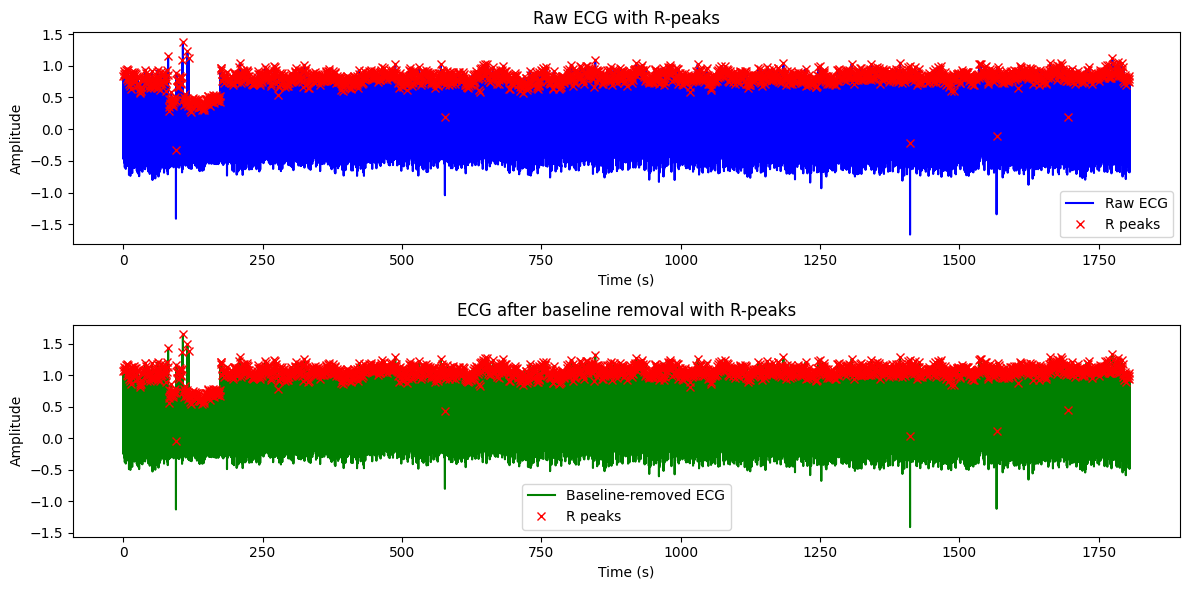

In [ ]:
def remove_baseline(signal, wavelet='db6'):

    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def visualize_r_peaks(record_path, channel=0, wavelet='db6'):
    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, channel]  # Одноканальный сигнал
    fs = record.fs  # Частота дискретизации

    #Находим R-пики с помощью NeuroKit2
    try:
        signals, info = nk.ecg_peaks(ecg_raw, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return

    ecg_no_baseline = remove_baseline(ecg_raw, wavelet=wavelet)

    time = np.arange(len(ecg_raw)) / fs

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time, ecg_raw, label="Raw ECG", color='blue')
    plt.plot(time[r_peaks], ecg_raw[r_peaks], 'rx', label="R peaks")
    plt.title("Raw ECG with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(time, ecg_no_baseline, label="Baseline-removed ECG", color='green')
    plt.plot(time[r_peaks], ecg_no_baseline[r_peaks], 'rx', label="R peaks")
    plt.title("ECG after baseline removal with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

record_path = "mit-bih-arrhythmia-database-1.0.0/102"
visualize_r_peaks(record_path, channel=0, wavelet='db6')


In [ ]:
def plot_ecg_style(time, signal, r_peaks=None, start=0, end=2, fs=360):

    mask = (time >= start) & (time <= end)
    t_plot = time[mask]
    s_plot = signal[mask]

    min_t, max_t = t_plot[0], t_plot[-1]
    min_s, max_s = s_plot.min(), s_plot.max()

    plt.figure(figsize=(10, 4))

    major_hstep = 0.2
    for xgrid in np.arange(min_t - (min_t % major_hstep), max_t + major_hstep, major_hstep):
        plt.axvline(x=xgrid, color='red', alpha=0.2, linewidth=0.5)

    major_vstep = 0.5
    vmin_grid = np.floor(min_s / major_vstep) * major_vstep
    vmax_grid = np.ceil(max_s / major_vstep) * major_vstep
    for ygrid in np.arange(vmin_grid, vmax_grid + major_vstep, major_vstep):
        plt.axhline(y=ygrid, color='red', alpha=0.2, linewidth=0.5)

    plt.plot(t_plot, s_plot, color='black', label="ECG fragment")

    if r_peaks is not None:
        r_times = r_peaks / fs
        r_mask = (r_times >= start) & (r_times <= end)
        r_show_times = r_times[r_mask]
        r_show_idx = (r_peaks[r_mask]).astype(int)
        plt.plot(r_show_times, signal[r_show_idx], 'ro', label="R peaks")

    plt.xlim(min_t, max_t)
    plt.ylim(vmin_grid, vmax_grid)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (mV) [условно]")
    plt.title("ECG fragment with R-peaks (zoomed)")
    plt.legend()
    plt.grid(False)
    plt.show()


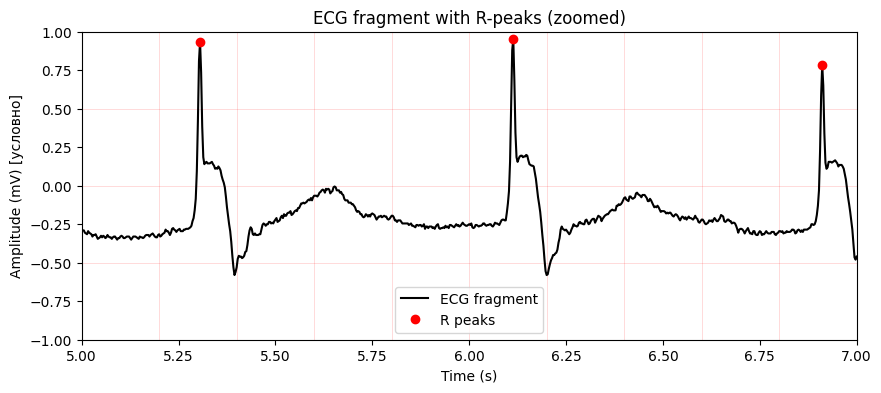

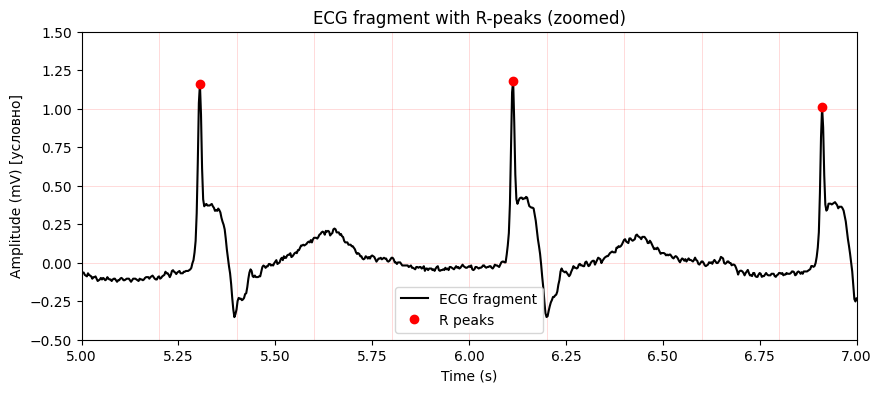

In [ ]:
import wfdb
import neurokit2 as nk
import numpy as np

def visualize_rpeaks_zoomed(record_path, channel=0, fs=360, start=5, end=7):
    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, channel]  # [N,]
    time = np.arange(len(ecg_raw)) / fs

    signals, info = nk.ecg_peaks(ecg_raw, sampling_rate=fs)
    r_peaks = info["ECG_R_Peaks"]

    import pywt
    def remove_baseline(signal, wavelet='db6'):
        max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
        coeffs = pywt.wavedec(signal, wavelet, level=max_level)
        coeffs[0] = np.zeros_like(coeffs[0])
        filtered_signal = pywt.waverec(coeffs, wavelet)
        return filtered_signal[:len(signal)]

    ecg_no_baseline = remove_baseline(ecg_raw)

    #фрагмент исходного сигнала
    plot_ecg_style(time, ecg_raw, r_peaks=r_peaks, start=start, end=end, fs=fs)

    #без baseline
    plot_ecg_style(time, ecg_no_baseline, r_peaks=r_peaks, start=start, end=end, fs=fs)

# Запуск
record_path = "mit-bih-arrhythmia-database-1.0.0/102"
visualize_rpeaks_zoomed(record_path, channel=0, fs=360, start=5, end=7)


In [ ]:
import os
import wfdb
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import pywt
import wandb
import neurokit2 as nk
from torch.utils.data import Dataset, DataLoader, random_split

wandb.init(project="ecg-contrastive-inception", config={
    "window_before": 0.5,
    "window_after": 0.8,
    "noise_std": 0.005,
    "time_warp_range": 0.1,
    "amp_scale_range": 0.1,
    "batch_size": 128,
    "num_epochs": 30,
    "learning_rate": 1e-3,
    "temperature": 0.3,
    "train_split": 0.8,
    "checkpoints_path": "./checkpoints_inception",
    "max_len": 600
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)

def remove_baseline(signal, wavelet='db6'):
    m = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    c = pywt.wavedec(signal, wavelet, level=m)
    c[0] = np.zeros_like(c[0])
    f = pywt.waverec(c, wavelet)
    return f[:len(signal)]

def time_warp(signal, warp_range=0.1):
    c, l = signal.shape
    factor = 1 + random.uniform(-warp_range, warp_range)
    nl = int(l * factor)
    nt = np.linspace(0, l-1, nl)
    w = []
    for i in range(c):
        arr = signal[i].cpu().numpy()
        w.append(np.interp(nt, np.arange(l), arr))
    return torch.tensor(np.stack(w, axis=0), dtype=signal.dtype)

def amplitude_scale(signal, scale_range=0.1):
    s = 1 + random.uniform(-scale_range, scale_range)
    return signal * s

def add_noise(signal, noise_std=0.005):
    n = torch.randn_like(signal) * noise_std
    return signal + n

def augment_ecg(signal):
    if random.random() < 0.5:
        signal = time_warp(signal, warp_range=config.time_warp_range)
    if random.random() < 0.5:
        signal = amplitude_scale(signal, scale_range=config.amp_scale_range)
    signal = add_noise(signal, noise_std=config.noise_std)
    return signal

def pad_or_truncate(signal, max_len=600):
    c, l = signal.shape
    if l > max_len:
        return signal[:, :max_len]
    elif l < max_len:
        p = max_len - l
        z = signal.new_zeros((c, p))
        return torch.cat([signal, z], dim=1)
    else:
        return signal

def custom_collate_fn(batch, max_len=600):
    x1_list, x2_list = [], []
    for b in batch:
        x1_list.append(pad_or_truncate(b[0], max_len))
        x2_list.append(pad_or_truncate(b[1], max_len))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

def segment_ecg_by_rpeaks(record_path, channel_indices=[0,1], wb=0.5, wa=0.8):
    r = wfdb.rdrecord(record_path)
    s = r.p_signal[:, channel_indices]
    fs = r.fs
    ecg_sig = s[:, 0]
    try:
        sigs, info = nk.ecg_peaks(ecg_sig, sampling_rate=fs)
        rp = info["ECG_R_Peaks"]
    except:
        return []
    segs = []
    lb = int(wb * fs)
    la = int(wa * fs)
    tl = s.shape[0]
    for r_ in rp:
        st = max(0, r_ - lb)
        en = min(tl, r_ + la)
        seg = s[st:en, :].T
        segs.append(torch.tensor(seg, dtype=torch.float32))
    return segs

record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202]

all_segments = []
for rid in record_ids:
    path_ = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs_ = segment_ecg_by_rpeaks(path_, channel_indices=[0,1],
                                  wb=config.window_before, wa=config.window_after)
    all_segments.extend(segs_)
train_size = int(len(all_segments) * config.train_split)
test_size = len(all_segments) - train_size
train_segments, test_segments = random_split(all_segments, [train_size, test_size])

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn
    def __len__(self):
        return len(self.segments)
    def __getitem__(self, idx):
        seg = self.segments[idx]
        arr = seg.numpy()
        arr_f = remove_baseline(arr)
        arr_f = torch.tensor(arr_f, dtype=torch.float32)
        if arr_f.ndim == 1:
            arr_f = arr_f.unsqueeze(0)
        if self.augment_fn:
            x1 = self.augment_fn(arr_f)
            x2 = self.augment_fn(arr_f)
        else:
            x1, x2 = arr_f, arr_f
        return x1, x2

train_dataset = ContrastiveECGDataset(train_segments, augment_fn=augment_ecg)
test_dataset  = ContrastiveECGDataset(test_segments,  augment_fn=augment_ecg)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)

class InceptionBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=9, padding=4, bias=False)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=19, padding=9, bias=False)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=39, padding=19, bias=False)
        self.bn = nn.BatchNorm1d(3 * out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv_res = nn.Conv1d(in_channels, 3*out_channels, kernel_size=1, padding=0, bias=False)
    def forward(self, x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        cat = torch.cat([b1, b2, b3], dim=1)
        res = self.conv_res(x)
        out = self.bn(cat + res)
        return self.relu(out)

class InceptionTime1D(nn.Module):
    def __init__(self, in_channels=2, num_blocks=6, out_channels=32, proj_dim=128):
        super().__init__()
        blocks = []
        input_ch = in_channels
        for _ in range(num_blocks):
            blocks.append(InceptionBlock1D(input_ch, out_channels))
            input_ch = 3 * out_channels
        self.network = nn.Sequential(*blocks)
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_ch, proj_dim)
    def forward(self, x):
        out = self.network(x)
        out = self.gap(out).squeeze(-1)
        out = self.fc(out)
        return out

model = InceptionTime1D(in_channels=2, num_blocks=6, out_channels=32, proj_dim=128).cuda()

def info_nce_loss(z1, z2, temperature=0.3):
    z1 = z1 / z1.norm(dim=1, keepdim=True)
    z2 = z2 / z2.norm(dim=1, keepdim=True)
    b = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim = torch.matmul(z, z.T)
    mask = ~torch.eye(2*b, dtype=torch.bool, device=z.device)
    sim = sim[mask].view(2*b, 2*b-1)
    sim = sim / temperature
    labels = torch.arange(b, device=z.device) + b
    loss1 = -torch.log_softmax(sim[:b], dim=1)[torch.arange(b), labels - b]
    loss2 = -torch.log_softmax(sim[b:], dim=1)[torch.arange(b), torch.arange(b)]
    return (loss1.mean() + loss2.mean()) / 2

optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(config.num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in train_loader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = info_nce_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    wandb.log({"epoch": epoch+1, "train_loss": avg_loss})
    scheduler.step(avg_loss)
    ckpt_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, ckpt_path)
    print(f"Epoch {epoch+1}/{config.num_epochs}, Train Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {ckpt_path}")

wandb.finish()


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
!pip install tsai

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pywt
import neurokit2 as nk
import wfdb
import wandb
from torch.utils.data import Dataset, DataLoader, random_split
from tsai.models.InceptionTimePlus import InceptionTimePlus

wandb.init(project="ecg-contrastive-tsai", config={
    "window_before": 0.5,
    "window_after": 0.8,
    "noise_std": 0.005,
    "time_warp_range": 0.1,
    "amp_scale_range": 0.1,
    "batch_size": 128,
    "num_epochs": 30,
    "learning_rate": 1e-3,
    "temperature": 0.3,
    "train_split": 0.8,
    "checkpoints_path": "./checkpoints_tsai",
    "max_len": 600
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)

def remove_baseline(signal, wavelet='db6'):
    m = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    c = pywt.wavedec(signal, wavelet, level=m)
    c[0] = np.zeros_like(c[0])
    f = pywt.waverec(c, wavelet)
    return f[:len(signal)]

def time_warp(signal, warp_range=0.1):
    c, l = signal.shape
    factor = 1 + random.uniform(-warp_range, warp_range)
    nl = int(l * factor)
    nt = np.linspace(0, l-1, nl)
    w = []
    for i in range(c):
        arr = signal[i].cpu().numpy()
        w.append(np.interp(nt, np.arange(l), arr))
    return torch.tensor(np.stack(w, axis=0), dtype=signal.dtype)

def amplitude_scale(signal, scale_range=0.1):
    s = 1 + random.uniform(-scale_range, scale_range)
    return signal * s

def add_noise(signal, noise_std=0.005):
    n = torch.randn_like(signal) * noise_std
    return signal + n

def augment_ecg(signal):
    if random.random() < 0.5:
        signal = time_warp(signal, warp_range=config.time_warp_range)
    if random.random() < 0.5:
        signal = amplitude_scale(signal, scale_range=config.amp_scale_range)
    signal = add_noise(signal, noise_std=config.noise_std)
    return signal

def pad_or_truncate(signal, max_len=600):
    c, l = signal.shape
    if l > max_len:
        return signal[:, :max_len]
    elif l < max_len:
        p = max_len - l
        z = signal.new_zeros((c, p))
        return torch.cat([signal, z], dim=1)
    else:
        return signal

def custom_collate_fn(batch, max_len=600):
    x1_list, x2_list = [], []
    for b in batch:
        x1_list.append(pad_or_truncate(b[0], max_len))
        x2_list.append(pad_or_truncate(b[1], max_len))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

def segment_ecg_by_rpeaks(record_path, channel_indices=[0,1], wb=0.5, wa=0.8):
    r = wfdb.rdrecord(record_path)
    s = r.p_signal[:, channel_indices]
    fs = r.fs
    ecg_sig = s[:, 0]
    try:
        sigs, info = nk.ecg_peaks(ecg_sig, sampling_rate=fs)
        rp = info["ECG_R_Peaks"]
    except:
        return []
    segs = []
    lb = int(wb * fs)
    la = int(wa * fs)
    tl = s.shape[0]
    for r_ in rp:
        st = max(0, r_ - lb)
        en = min(tl, r_ + la)
        seg = s[st:en, :].T
        segs.append(torch.tensor(seg, dtype=torch.float32))
    return segs

record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
              209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
              222, 223, 228, 230, 231, 232, 233, 234]
all_segments = []
for rid in record_ids:
    path_ = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs_ = segment_ecg_by_rpeaks(path_, channel_indices=[0,1],
                                  wb=config.window_before, wa=config.window_after)
    all_segments.extend(segs_)
train_size = int(len(all_segments) * config.train_split)
test_size = len(all_segments) - train_size
train_segments, test_segments = random_split(all_segments, [train_size, test_size])

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn
    def __len__(self):
        return len(self.segments)
    def __getitem__(self, idx):
        seg = self.segments[idx]
        arr = seg.numpy()
        arr_f = remove_baseline(arr)
        arr_f = torch.tensor(arr_f, dtype=torch.float32)
        if arr_f.ndim == 1:
            arr_f = arr_f.unsqueeze(0)
        if self.augment_fn:
            x1 = self.augment_fn(arr_f)
            x2 = self.augment_fn(arr_f)
        else:
            x1, x2 = arr_f, arr_f
        return x1, x2

train_dataset = ContrastiveECGDataset(train_segments, augment_fn=augment_ecg)
test_dataset  = ContrastiveECGDataset(test_segments,  augment_fn=augment_ecg)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)

class InceptionTimeModel(nn.Module):
    def __init__(self, c_in=2, proj_dim=128):
        super().__init__()
        self.inception = InceptionTimePlus(c_in=c_in, c_out=proj_dim, seq_len=config.max_len)
    def forward(self, x):
        return self.inception(x)

model = InceptionTimeModel(c_in=2, proj_dim=128).cuda()

def info_nce_loss(z1, z2, temperature=0.3):
    z1 = z1 / z1.norm(dim=1, keepdim=True)
    z2 = z2 / z2.norm(dim=1, keepdim=True)
    b = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim = torch.matmul(z, z.T)
    mask = ~torch.eye(2*b, dtype=torch.bool, device=z.device)
    sim = sim[mask].view(2*b, 2*b-1)
    sim = sim / temperature
    labels = torch.arange(b, device=z.device) + b
    loss1 = -torch.log_softmax(sim[:b], dim=1)[torch.arange(b), labels - b]
    loss2 = -torch.log_softmax(sim[b:], dim=1)[torch.arange(b), torch.arange(b)]
    return (loss1.mean() + loss2.mean()) / 2

optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(config.num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in train_loader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = info_nce_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    wandb.log({"epoch": epoch+1, "train_loss": avg_loss})
    scheduler.step(avg_loss)
    ckpt_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, ckpt_path)
    print(f"Epoch {epoch+1}/{config.num_epochs}, Train Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {ckpt_path}")

wandb.finish()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vortex_d11 (vortex_d11-m-v-lomonosovmoscow-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/30, Train Loss: 5.5400
Checkpoint saved to ./checkpoints_tsai/model_epoch_1.pt
Epoch 2/30, Train Loss: 5.5399
Checkpoint saved to ./checkpoints_tsai/model_epoch_2.pt
Epoch 3/30, Train Loss: 5.5399
Checkpoint saved to ./checkpoints_tsai/model_epoch_3.pt
Epoch 4/30, Train Loss: 5.5399
Checkpoint saved to ./checkpoints_tsai/model_epoch_4.pt
Epoch 5/30, Train Loss: 5.5399
Checkpoint saved to ./checkpoints_tsai/model_epoch_5.pt


KeyboardInterrupt: 

# Проверка LOSS функции

Loss for identical inputs: 1.9797074794769287
Loss for random embeddings: 2.750575542449951


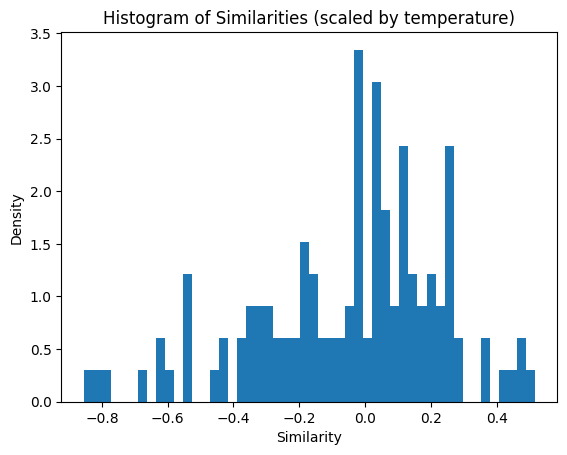

Total gradient norm: 0.0003106669849444188


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def test_identical_inputs():
    batch_size = 8
    dim = 128
    x = torch.randn(batch_size, dim).cuda()
    x = F.normalize(x, dim=1)
    loss_val = info_nce_loss(x, x, temperature=0.3)
    print("Loss for identical inputs:", loss_val.item())

def test_random_embeddings():
    batch_size = 8
    dim = 128
    z1 = torch.randn(batch_size, dim).cuda()
    z2 = torch.randn(batch_size, dim).cuda()
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)
    loss_val = info_nce_loss(z1, z2, temperature=0.3)
    print("Loss for random embeddings:", loss_val.item())

def visualize_similarities(z1, z2, temperature=0.3):
    batch_size = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim_matrix = torch.matmul(z, z.T)
    mask = ~torch.eye(2*batch_size, dtype=torch.bool, device=z.device)
    sim_matrix = sim_matrix[mask].view(2*batch_size, 2*batch_size-1)
    sim_matrix = sim_matrix / temperature
    sim_np = sim_matrix.cpu().detach().numpy().flatten()
    plt.hist(sim_np, bins=50, density=True)
    plt.title("Histogram of Similarities (scaled by temperature)")
    plt.xlabel("Similarity")
    plt.ylabel("Density")
    plt.show()

def print_gradients(model, x1, x2, temperature=0.3):
    model.train()
    optimizer.zero_grad()
    z1 = model(x1)
    z2 = model(x2)
    loss = info_nce_loss(z1, z2, temperature)
    loss.backward()
    grad_norm = 0.0
    for p in model.parameters():
        if p.grad is not None:
            grad_norm += p.grad.norm().item()
    print("Total gradient norm:", grad_norm)

# Тест для идентичных входов
test_identical_inputs()

# Тест для случайных эмбеддингов
test_random_embeddings()

# Визуализация распределения сходств
batch_size = 8
dim = 128
z1 = F.normalize(torch.randn(batch_size, dim).cuda(), dim=1)
z2 = F.normalize(torch.randn(batch_size, dim).cuda(), dim=1)
visualize_similarities(z1, z2, temperature=0.3)

# Если у вас уже есть обучаемая модель (например, model и optimizer), можно протестировать градиенты:
# Допустим, берем один батч из train_loader:
for (x1, x2) in train_loader:
    x1 = x1.cuda()
    x2 = x2.cuda()
    print_gradients(model, x1, x2, temperature=0.3)
    break


In [ ]:
def info_nce_simplified(z1, z2):
    b = z1.size(0)
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)
    sims = torch.matmul(z1, z2.T)  # [B, B]
    labels = torch.arange(b, device=z1.device)
    loss = F.cross_entropy(sims, labels)
    return loss


In [ ]:
def info_nce_simplified(z1, z2):
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)
    sim = torch.matmul(z1, z2.T)
    labels = torch.arange(z1.size(0), device=z1.device)
    loss = F.cross_entropy(sim, labels)
    return loss

B = 4
D = 8

x = torch.randn(B, D)
z1_identical = x.clone()
z2_identical = x.clone()

loss_identical = info_nce_simplified(z1_identical, z2_identical)
print("Loss for identical embeddings:", loss_identical.item())

z1_random = torch.randn(B, D)
z2_random = torch.randn(B, D)
loss_random = info_nce_simplified(z1_random, z2_random)
print("Loss for random embeddings:", loss_random.item())

print("ln(B) =", math.log(B))


Loss for identical embeddings: 0.8528905510902405
Loss for random embeddings: 1.2926666736602783
ln(B) = 1.3862943611198906


# Переделали LOSS FUNC на манер SIMCLR

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pywt
import neurokit2 as nk
import wfdb
import wandb
from torch.utils.data import Dataset, DataLoader, random_split
from tsai.models.InceptionTimePlus import InceptionTimePlus
import torch.nn.functional as F

wandb.init(project="ecg-contrastive-tsai-simclr", config={
    "window_before": 0.5,
    "window_after": 0.8,
    "noise_std": 0.005,
    "time_warp_range": 0.1,
    "amp_scale_range": 0.1,
    "batch_size": 128,
    "num_epochs": 30,
    "learning_rate": 1e-3,
    "temperature": 0.1,
    "train_split": 0.8,
    "checkpoints_path": "./checkpoints_tsai_simclr",
    "max_len": 600
})
config = wandb.config
os.makedirs(config.checkpoints_path, exist_ok=True)

def remove_baseline(signal, wavelet='db6'):
    m = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    c = pywt.wavedec(signal, wavelet, level=m)
    c[0] = np.zeros_like(c[0])
    f = pywt.waverec(c, wavelet)
    return f[:len(signal)]

def time_warp(signal, warp_range=0.1):
    c, l = signal.shape
    factor = 1 + random.uniform(-warp_range, warp_range)
    nl = int(l * factor)
    nt = np.linspace(0, l-1, nl)
    w = []
    for i in range(c):
        arr = signal[i].cpu().numpy()
        w.append(np.interp(nt, np.arange(l), arr))
    return torch.tensor(np.stack(w, axis=0), dtype=signal.dtype)

def amplitude_scale(signal, scale_range=0.1):
    s = 1 + random.uniform(-scale_range, scale_range)
    return signal * s

def add_noise(signal, noise_std=0.005):
    n = torch.randn_like(signal) * noise_std
    return signal + n

def augment_ecg(signal):
    if random.random() < 0.5:
        signal = time_warp(signal, warp_range=config.time_warp_range)
    if random.random() < 0.5:
        signal = amplitude_scale(signal, scale_range=config.amp_scale_range)
    signal = add_noise(signal, noise_std=config.noise_std)
    return signal

def pad_or_truncate(signal, max_len=600):
    c, l = signal.shape
    if l > max_len:
        return signal[:, :max_len]
    elif l < max_len:
        p = max_len - l
        z = signal.new_zeros((c, p))
        return torch.cat([signal, z], dim=1)
    else:
        return signal

def custom_collate_fn(batch, max_len=600):
    x1_list, x2_list = [], []
    for b in batch:
        x1_list.append(pad_or_truncate(b[0], max_len))
        x2_list.append(pad_or_truncate(b[1], max_len))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

def segment_ecg_by_rpeaks(record_path, channel_indices=[0,1], wb=0.5, wa=0.8):
    r = wfdb.rdrecord(record_path)
    s = r.p_signal[:, channel_indices]
    fs = r.fs
    ecg_sig = s[:, 0]
    try:
        sigs, info = nk.ecg_peaks(ecg_sig, sampling_rate=fs)
        rp = info["ECG_R_Peaks"]
    except:
        return []
    segs = []
    lb = int(wb * fs)
    la = int(wa * fs)
    tl = s.shape[0]
    for r_ in rp:
        st = max(0, r_ - lb)
        en = min(tl, r_ + la)
        seg = s[st:en, :].T
        segs.append(torch.tensor(seg, dtype=torch.float32))
    return segs

record_ids = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
              122, 123, 124, 200, 201, 202]

all_segments = []
for rid in record_ids:
    path_ = f"mit-bih-arrhythmia-database-1.0.0/{rid}"
    segs_ = segment_ecg_by_rpeaks(path_, channel_indices=[0,1],
                                  wb=config.window_before, wa=config.window_after)
    all_segments.extend(segs_)

train_size = int(len(all_segments) * config.train_split)
test_size = len(all_segments) - train_size
train_segments, test_segments = random_split(all_segments, [train_size, test_size])

class ContrastiveECGDataset(Dataset):
    def __init__(self, segments, augment_fn=None):
        self.segments = segments
        self.augment_fn = augment_fn
    def __len__(self):
        return len(self.segments)
    def __getitem__(self, idx):
        seg = self.segments[idx]
        arr = seg.numpy()
        arr_f = remove_baseline(arr)
        arr_f = torch.tensor(arr_f, dtype=torch.float32)
        if arr_f.ndim == 1:
            arr_f = arr_f.unsqueeze(0)
        if self.augment_fn:
            x1 = self.augment_fn(arr_f)
            x2 = self.augment_fn(arr_f)
        else:
            x1, x2 = arr_f, arr_f
        return x1, x2

train_dataset = ContrastiveECGDataset(train_segments, augment_fn=augment_ecg)
test_dataset  = ContrastiveECGDataset(test_segments,  augment_fn=augment_ecg)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    collate_fn=lambda b: custom_collate_fn(b, max_len=config.max_len)
)

class InceptionTimeModel(nn.Module):
    def __init__(self, c_in=2, proj_dim=128):
        super().__init__()
        self.inception = InceptionTimePlus(c_in=c_in, c_out=proj_dim, seq_len=config.max_len)
    def forward(self, x):
        return self.inception(x)

model = InceptionTimeModel(c_in=2, proj_dim=128).cuda()

def simclr_loss(z1, z2, temperature=0.3):
    b = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    z = F.normalize(z, dim=1)
    sim = torch.matmul(z, z.T) / temperature
    mask = torch.eye(2*b, dtype=torch.bool, device=z.device)
    sim = sim[~mask].view(2*b, 2*b - 1)
    labels = torch.arange(b, device=z.device) + b
    loss_z1 = -F.log_softmax(sim[:b], dim=1)[torch.arange(b), labels - b]
    labels2 = torch.arange(b, device=z.device)
    loss_z2 = -F.log_softmax(sim[b:], dim=1)[torch.arange(b), labels2]
    return (loss_z1.mean() + loss_z2.mean()) / 2

optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(config.num_epochs):
    total_loss = 0.0
    model.train()
    for (x1, x2) in train_loader:
        x1 = x1.cuda()
        x2 = x2.cuda()
        z1 = model(x1)
        z2 = model(x2)
        loss = simclr_loss(z1, z2, temperature=config.temperature)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    wandb.log({"epoch": epoch+1, "train_loss": avg_loss})
    scheduler.step(avg_loss)
    ckpt_path = os.path.join(config.checkpoints_path, f"model_epoch_{epoch+1}.pt")
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, ckpt_path)
    print(f"Epoch {epoch+1}/{config.num_epochs}, Train Loss: {avg_loss:.4f}")
    print(f"Checkpoint saved to {ckpt_path}")

wandb.finish()

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/30, Train Loss: 5.5411
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_1.pt
Epoch 2/30, Train Loss: 5.5410
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_2.pt
Epoch 3/30, Train Loss: 5.5410
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_3.pt
Epoch 4/30, Train Loss: 5.5410
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_4.pt
Epoch 5/30, Train Loss: 5.5410
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_5.pt
Epoch 6/30, Train Loss: 5.5410
Checkpoint saved to ./checkpoints_tsai_simclr/model_epoch_6.pt


KeyboardInterrupt: 

In [ ]:
----------------

# Работы с данными

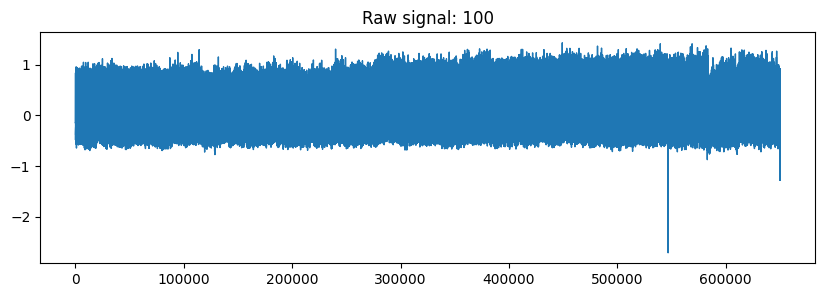

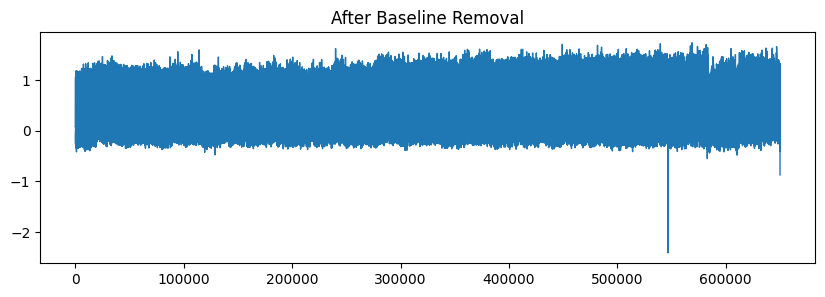

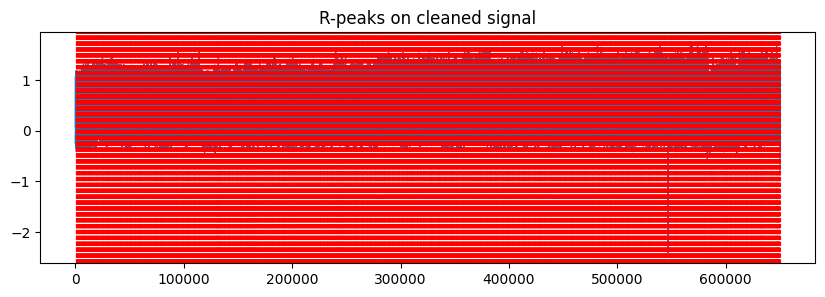

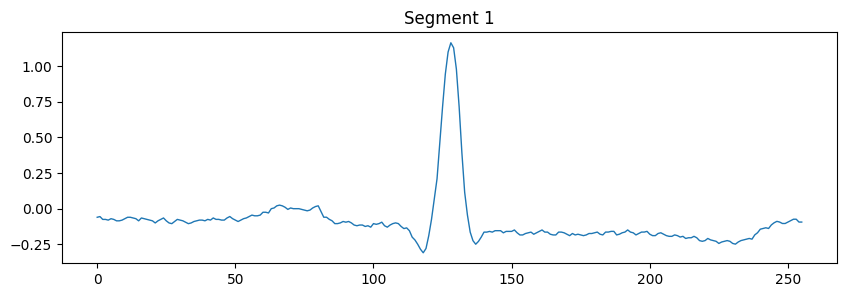

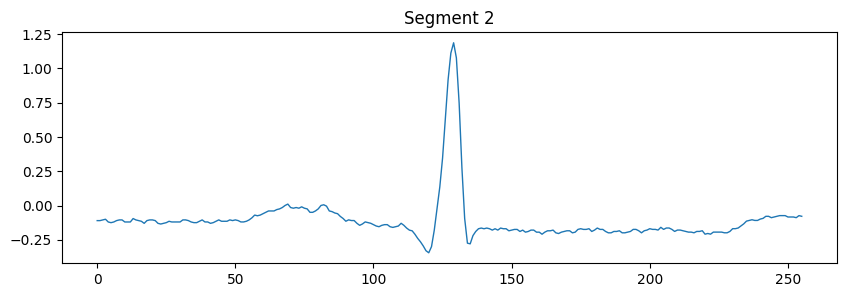

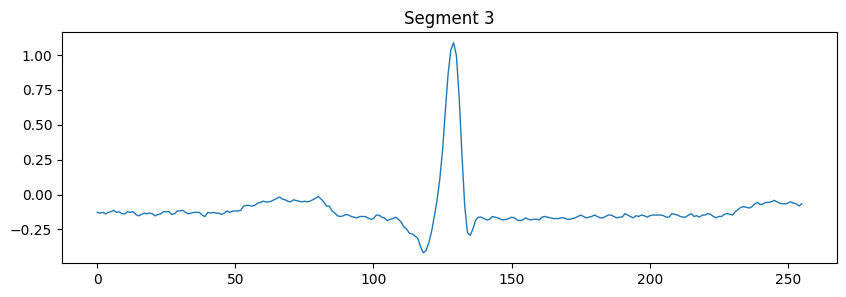

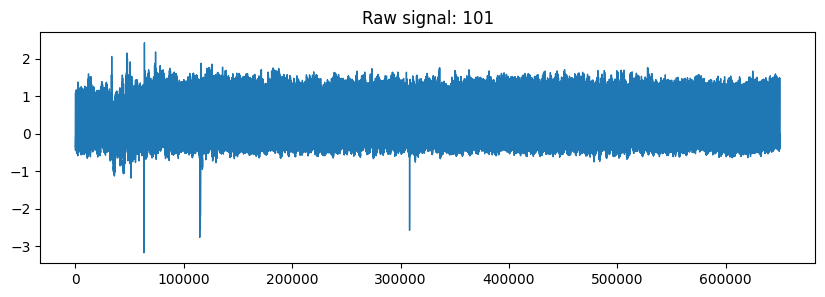

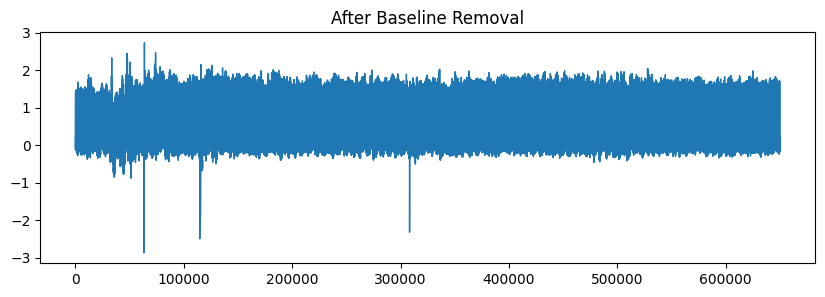

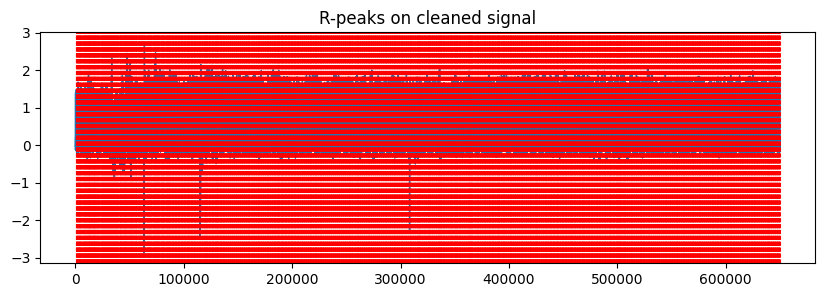

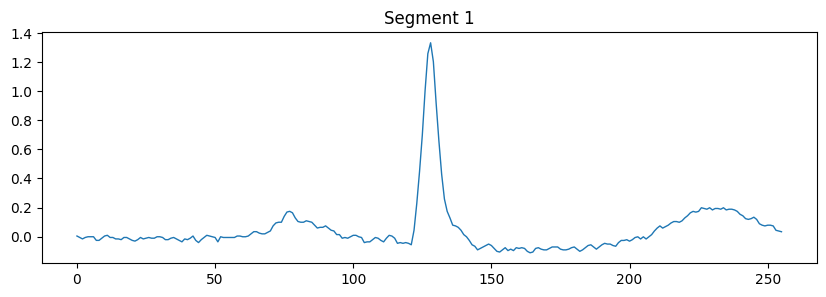

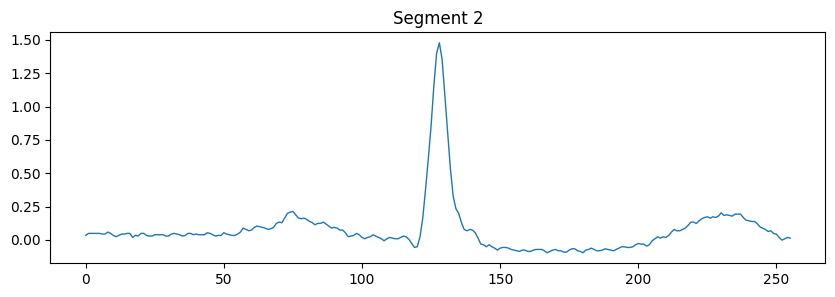

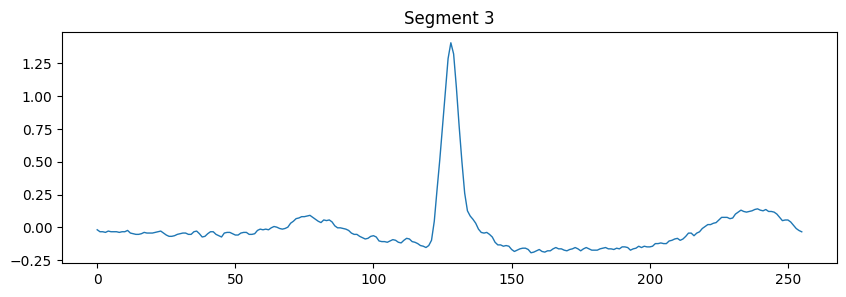

Total segments in dataset: 4135
Shape of first segment: torch.Size([1, 256])


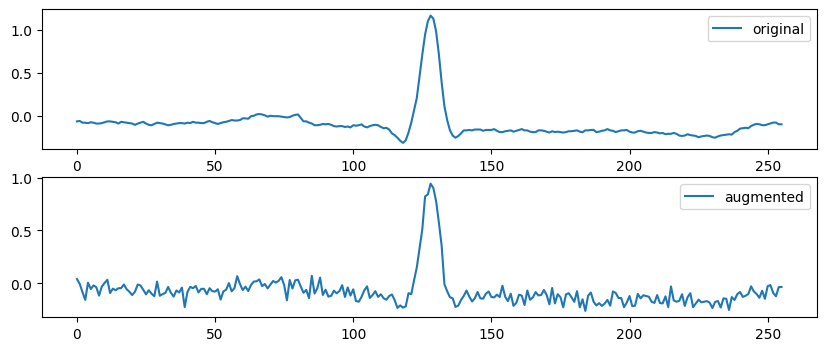

In [ ]:
import os
import numpy as np
import wfdb
import pywt
import neurokit2 as nk

import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

##########################################
# 1) Удаление baseline wander (wavelet)
##########################################
def remove_baseline_wander(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), wavelet)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    # Зануляем самую грубую аппроксимацию
    coeffs[0] = np.zeros_like(coeffs[0])
    reconstructed = pywt.waverec(coeffs, wavelet)
    # Подрежем до исходной длины
    if len(reconstructed) > len(signal):
        reconstructed = reconstructed[:len(signal)]
    return reconstructed

##########################################
# 2) Вырезаем сегменты вокруг R-пиков
##########################################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half_window = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half_window
        end = r + half_window
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments

##########################################
# 3) Аугментация (пример)
##########################################
class MyECGAugment:
    """Минимальная аугментация: шум + амплитудное масштабирование."""
    def __init__(self, noise_std=0.01, amp_scale=0.1):
        self.noise_std = noise_std
        self.amp_scale = amp_scale

    def __call__(self, signal):
        """signal shape: (segment_size,)"""
        x = signal.copy()
        # Амплитудное масштабирование
        scale_factor = 1.0 + (2*np.random.rand() - 1.0)*self.amp_scale
        x = x * scale_factor
        # Добавляем шум
        noise = np.random.randn(len(x)) * self.noise_std
        x = x + noise
        return x

##########################################
# 4) Dataset c промежуточной визуализацией
##########################################
class ECGDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, sampling_rate=360, wavelet='db6', do_visualize=True):
        """
        record_paths: список имён/путей к .hea/.dat (MIT-BIH или др.)
        segment_size: длина сегмента
        do_visualize: включать ли plot (рекомендуется = True при отладке)
        """
        self.all_segments = []
        self.sampling_rate = sampling_rate
        self.segment_size = segment_size
        self.wavelet = wavelet
        self.do_visualize = do_visualize

        # Собираем ВСЕ сегменты со ВСЕХ записей
        for rec_path in record_paths:
            # 1) Читаем
            record = wfdb.rdrecord(rec_path)
            ecg_signal = record.p_signal[:, 0]  # 1 канал
            # 2) (Визуализация сырого сигнала)
            if self.do_visualize:
                self._plot_signal(ecg_signal, title=f"Raw signal: {os.path.basename(rec_path)}")

            # 3) Удаляем baseline wander
            ecg_cleaned = remove_baseline_wander(ecg_signal, wavelet=self.wavelet)
            # (Визуализация после baseline removal)
            if self.do_visualize:
                self._plot_signal(ecg_cleaned, title="After Baseline Removal")

            # 4) Поиск R-пиков (используем neurokit2)
            #    Перед этим можно пропустить signal через nk.ecg_clean(...) для сглаживания
            #    Но уже у нас ecg_cleaned, можно ещё раз
            ecg_preprocessed = nk.ecg_clean(ecg_cleaned, sampling_rate=self.sampling_rate)
            peaks_info = nk.ecg_findpeaks(ecg_preprocessed, sampling_rate=self.sampling_rate)
            r_peaks = peaks_info['ECG_R_Peaks']

            # (Визуализация R-пиков на сигнале)
            if self.do_visualize:
                self._plot_rpeaks(ecg_cleaned, r_peaks, title="R-peaks on cleaned signal")

            # 5) Сегментация
            segments = segment_ecg_by_rpeaks(ecg_cleaned, r_peaks, self.segment_size)

            # (Визуализация нескольких сегментов)
            if self.do_visualize and len(segments) > 0:
                for i in range(min(3, len(segments))):  # 3 примера максимум
                    self._plot_signal(segments[i], title=f"Segment {i+1}")

            # 6) Собираем
            for seg in segments:
                self.all_segments.append(seg.astype(np.float32))

        # Итог: self.all_segments — список np.array (segment_size,)

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        x = self.all_segments[idx]  # (segment_size,)
        # Возвращаем как (1, segment_size)
        return torch.from_numpy(x).unsqueeze(0)

    def _plot_signal(self, sig, title=""):
        """Простая функция для отладки, чтобы нарисовать 1D-сигнал."""
        plt.figure(figsize=(10, 3))
        plt.plot(sig, linewidth=1)
        plt.title(title)
        plt.show()

    def _plot_rpeaks(self, sig, r_peaks, title=""):
        """Показать сигнал и отметить вертикальными линиями R-пики."""
        plt.figure(figsize=(10, 3))
        plt.plot(sig, linewidth=1, label="ECG")
        for rp in r_peaks:
            plt.axvline(x=rp, color='red', linestyle='--', linewidth=0.8)
        plt.title(title)
        plt.show()


##########################################
# 5) Пример использования / main
##########################################
def main():
    # Пример: список записей MIT-BIH (предположим у вас лежит "100", "101" и т.д.)
    # Укажите путь к ним. Если wfdb не находит, укажите полный путь:
    # record_paths = ["/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0/100", "/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0/101"]
    record_paths = ["100", "101"]  # для демонстрации

    # Создаём датасет
    dataset = ECGDataset(
        record_paths=record_paths,
        segment_size=256,
        sampling_rate=360,
        wavelet='db6',
        do_visualize=True  # включаем визуализацию
    )

    print(f"Total segments in dataset: {len(dataset)}")

    # Возьмём первый сегмент
    seg_0 = dataset[0]  # (1, 256) Torch Tensor
    print("Shape of first segment:", seg_0.shape)

    # Дополнительно: можем протестировать аугментацию
    aug = MyECGAugment(noise_std=0.05, amp_scale=0.2)
    seg_np = seg_0.squeeze(0).numpy()  # (256,)
    seg_aug = aug(seg_np)

    # Визуализируем сегмент ДО и ПОСЛЕ аугментации
    plt.figure(figsize=(10,4))
    plt.subplot(2,1,1)
    plt.plot(seg_np, label="original")
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(seg_aug, label="augmented")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
cd mit-bih-arrhythmia-database-1.0.0

/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0


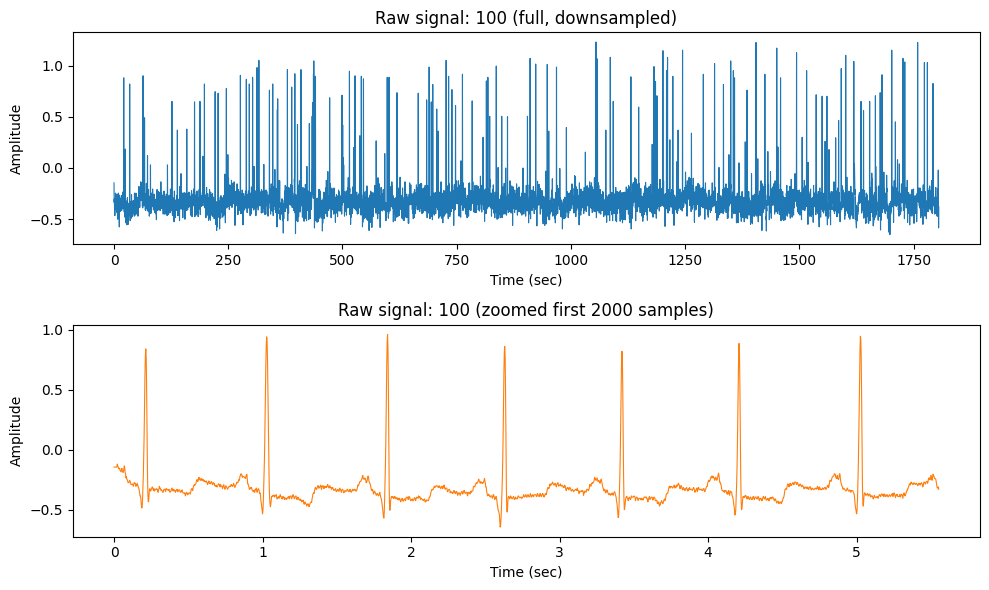

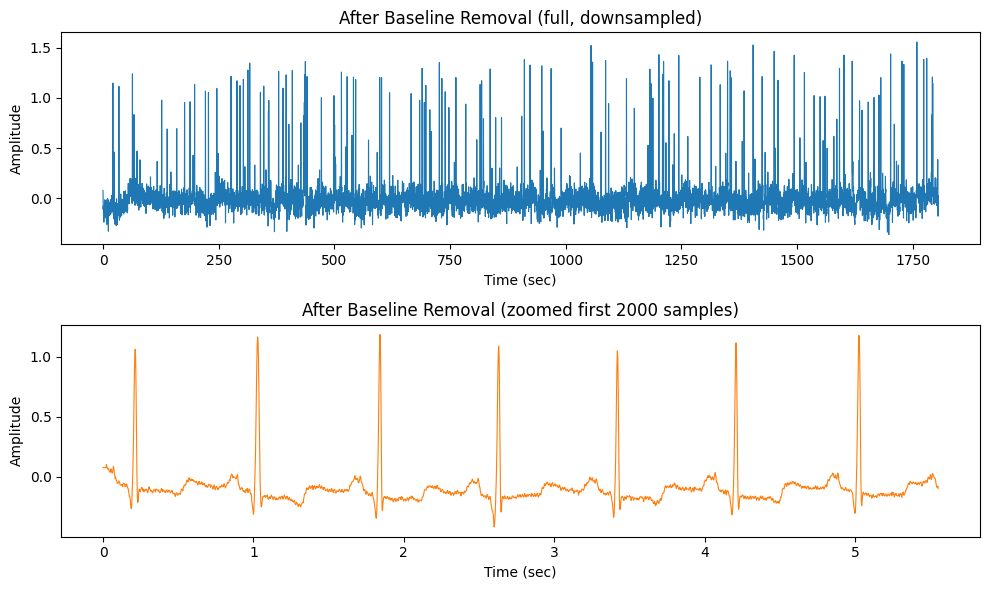

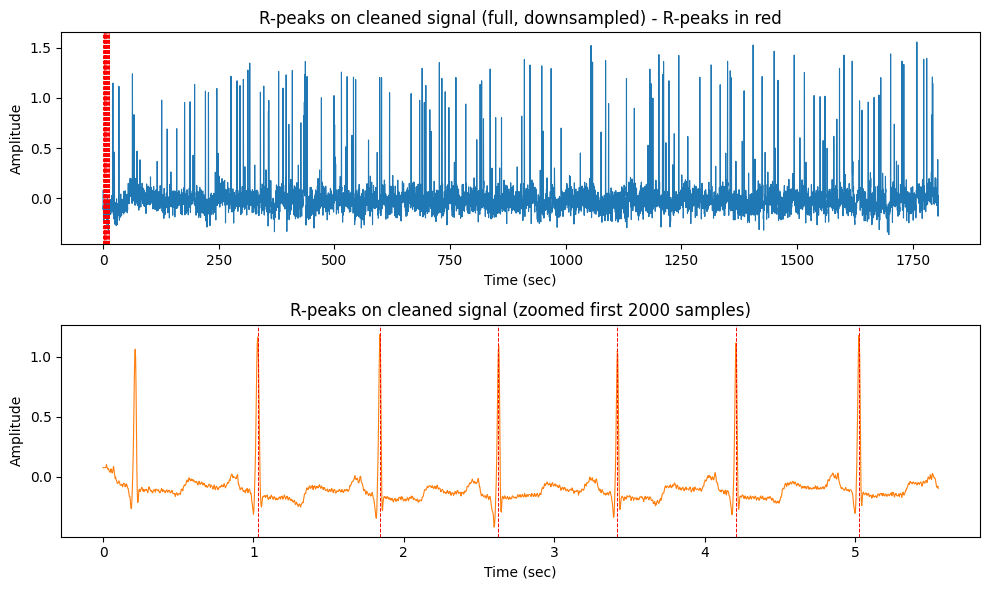

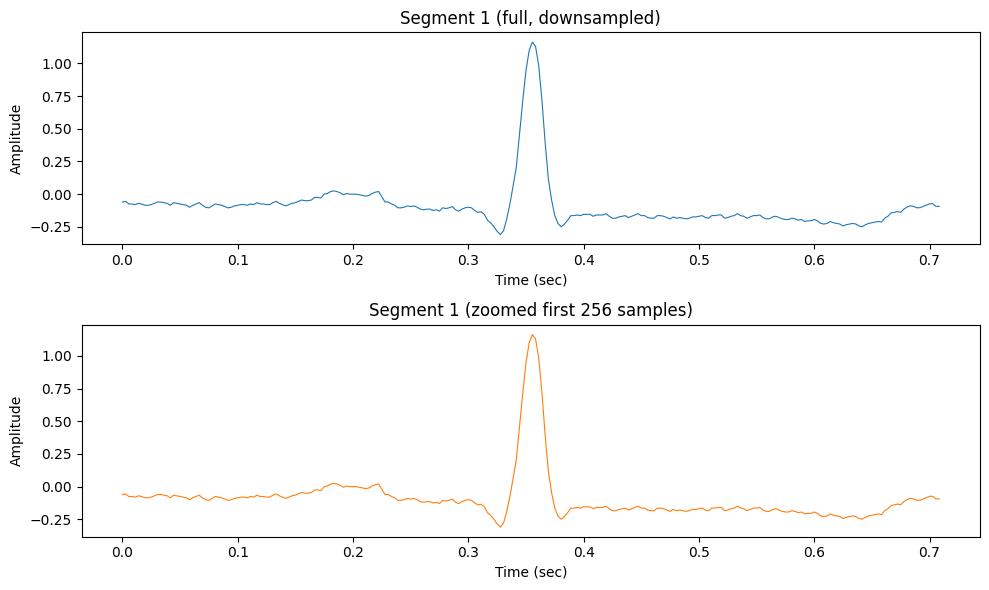

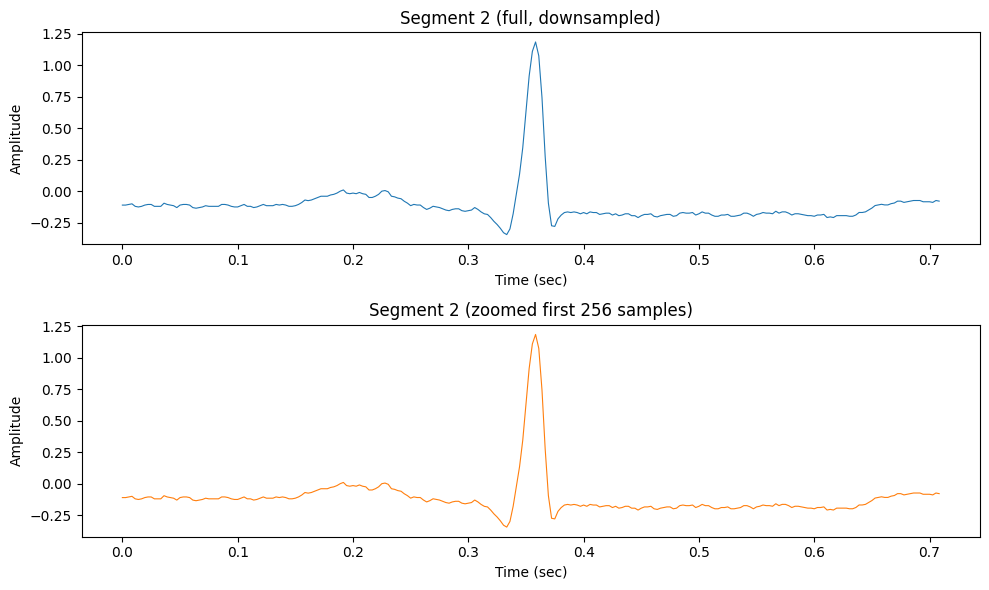

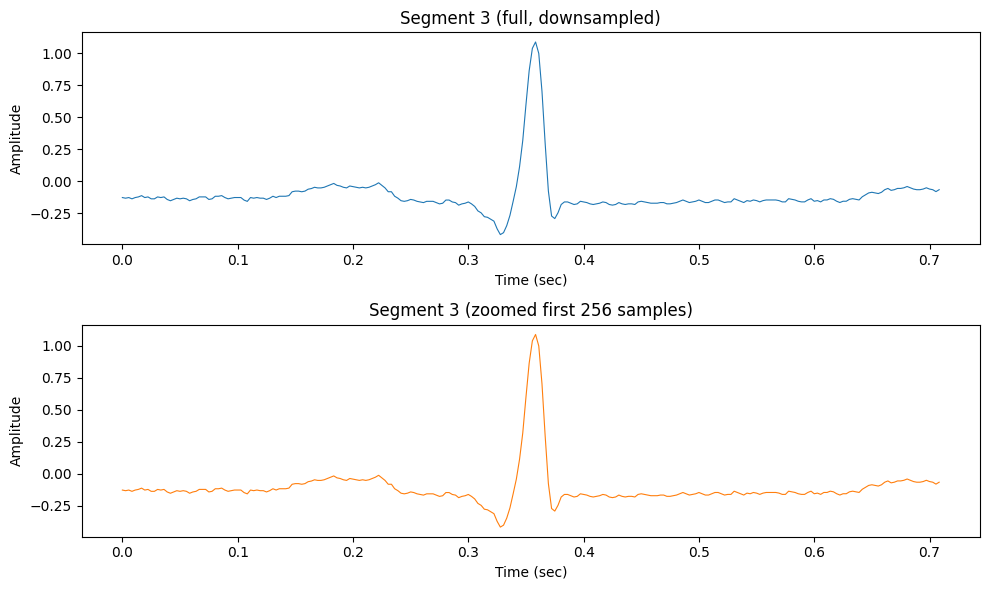

Total segments: 2270
Shape of first segment: torch.Size([1, 256])


In [ ]:
import os
import numpy as np
import wfdb
import pywt
import neurokit2 as nk
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset


######################################################
# УЛУЧШЕННЫЕ ФУНКЦИИ ВИЗУАЛИЗАЦИИ
######################################################
def plot_signal_improved(sig, title="", fs=360, max_points=5000, zoom_samples=2000):
    """
    Рисует 2 сабплота:
      1) Даунсэмплированный график всего сигнала (до max_points точек)
      2) "Приближение" на первые zoom_samples отсчётов
    fs          : частота дискретизации (используется для оси X в секундах)
    max_points  : максимум точек на "полном" графике
    zoom_samples: сколько точек берём для нижнего "приближённого" графика
    """
    N = len(sig)

    # -- даунсэмплирование для верхнего графика --
    if N > max_points:
        step = N // max_points
        sig_plot = sig[::step]
        x_plot = np.arange(0, N, step) / fs
    else:
        sig_plot = sig
        x_plot = np.arange(N) / fs

    # -- фрагмент (zoom) для нижнего графика --
    zoom_end = min(zoom_samples, N)
    sig_zoom = sig[:zoom_end]
    x_zoom = np.arange(zoom_end) / fs

    # -- построим фигуру из 2 subplot --
    fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=False)

    # Верхний: весь сигнал (даунсэмплированный)
    axes[0].plot(x_plot, sig_plot, linewidth=0.8)
    axes[0].set_title(f"{title} (full, downsampled)", fontsize=12)
    axes[0].set_xlabel("Time (sec)")
    axes[0].set_ylabel("Amplitude")

    # Нижний: приближение
    axes[1].plot(x_zoom, sig_zoom, linewidth=0.8, color='tab:orange')
    axes[1].set_title(f"{title} (zoomed first {zoom_end} samples)", fontsize=12)
    axes[1].set_xlabel("Time (sec)")
    axes[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()


def plot_rpeaks_improved(sig, r_peaks, title="", fs=360, max_points=5000, zoom_samples=2000):
    """
    То же самое, что plot_signal_improved, но рисуем вертикальные линии для R-пиков (красные).
    """
    N = len(sig)
    # -- даунсэмплирование для "полного" графика --
    if N > max_points:
        step = N // max_points
        sig_plot = sig[::step]
        x_plot = np.arange(0, N, step) / fs
        # Для pиков сделаем упрощённо: берём только те, что кратны step,
        # чтобы они точно легли на даунсэмплированный x_plot:
        r_peaks_ds = [rp for rp in r_peaks if rp % step == 0]
        r_peaks_x_plot = [(rp // step)/fs for rp in r_peaks_ds]
    else:
        sig_plot = sig
        x_plot = np.arange(N) / fs
        r_peaks_ds = r_peaks
        r_peaks_x_plot = [rp/fs for rp in r_peaks_ds]

    # -- фрагмент (zoom) --
    zoom_end = min(zoom_samples, N)
    sig_zoom = sig[:zoom_end]
    x_zoom = np.arange(zoom_end) / fs
    r_peaks_zoom = [rp for rp in r_peaks if rp < zoom_end]
    r_peaks_x_zoom = [rp/fs for rp in r_peaks_zoom]

    # -- построение --
    fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=False)

    # Верхний subplot
    axes[0].plot(x_plot, sig_plot, linewidth=0.8, label="ECG (downsampled)")
    for rp_x in r_peaks_x_plot:
        axes[0].axvline(rp_x, color='red', linestyle='--', linewidth=0.7)
    axes[0].set_title(f"{title} (full, downsampled) - R-peaks in red", fontsize=12)
    axes[0].set_xlabel("Time (sec)")
    axes[0].set_ylabel("Amplitude")

    # Нижний subplot (zoom)
    axes[1].plot(x_zoom, sig_zoom, color='tab:orange', linewidth=0.8, label="ECG (zoom)")
    for rp_x in r_peaks_x_zoom:
        axes[1].axvline(rp_x, color='red', linestyle='--', linewidth=0.7)
    axes[1].set_title(f"{title} (zoomed first {zoom_end} samples)", fontsize=12)
    axes[1].set_xlabel("Time (sec)")
    axes[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

######################################################
# Базовый preprocess: remove_baseline_wander
######################################################
def remove_baseline_wander(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), wavelet)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    reconstructed = pywt.waverec(coeffs, wavelet)
    if len(reconstructed) > len(signal):
        reconstructed = reconstructed[:len(signal)]
    return reconstructed


######################################################
# Функция нарезки сегментов вокруг R-пиков
######################################################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half_window = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half_window
        end = r + half_window
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments


######################################################
# Пример Dataset, с визуализацией на каждом шаге
######################################################
class ECGDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, sampling_rate=360, wavelet='db6', do_visualize=True):
        self.all_segments = []
        self.segment_size = segment_size
        self.sampling_rate = sampling_rate
        self.wavelet = wavelet
        self.do_visualize = do_visualize

        for rec_path in record_paths:
            # 1) Читаем сигнал
            record = wfdb.rdrecord(rec_path)
            ecg_signal = record.p_signal[:, 0]  # первый канал

            # 2) Визуализируем сырое (даунсэмплированное + zoom)
            if self.do_visualize:
                plot_signal_improved(ecg_signal,
                                     title=f"Raw signal: {os.path.basename(rec_path)}",
                                     fs=self.sampling_rate,
                                     max_points=5000,
                                     zoom_samples=2000)

            # 3) remove baseline
            ecg_clean = remove_baseline_wander(ecg_signal, wavelet=self.wavelet)

            # 4) Визуализация после baseline
            if self.do_visualize:
                plot_signal_improved(ecg_clean,
                                     title="After Baseline Removal",
                                     fs=self.sampling_rate,
                                     max_points=5000,
                                     zoom_samples=2000)

            # 5) Поиск R-пиков
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=self.sampling_rate)
            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=self.sampling_rate)
            r_peaks = peaks_info["ECG_R_Peaks"]

            # 6) Визуализация R-пиков
            if self.do_visualize:
                plot_rpeaks_improved(ecg_clean, r_peaks,
                                     title="R-peaks on cleaned signal",
                                     fs=self.sampling_rate,
                                     max_points=5000,
                                     zoom_samples=2000)

            # 7) Сегментация
            segments = segment_ecg_by_rpeaks(ecg_clean, r_peaks, self.segment_size)

            # Покажем хотя бы несколько сегментов
            if self.do_visualize and len(segments) > 0:
                for i, seg in enumerate(segments[:3]):  # первые 3
                    plot_signal_improved(seg,
                                         title=f"Segment {i+1}",
                                         fs=self.sampling_rate,
                                         max_points=2000,
                                         zoom_samples=2000)

            # 8) Сохраняем
            for seg in segments:
                self.all_segments.append(seg.astype(np.float32))

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        x = self.all_segments[idx]  # shape (segment_size,)
        # Возвращаем torch-тензор (1, segment_size)
        return torch.from_numpy(x).unsqueeze(0)


######################################################
# Пример использования
######################################################
def main():
    # Допустим, у нас в текущей папке лежат 100.hea, 100.dat
    # Или укажите полный путь, если wfdb не найдёт
    record_paths = ["100"]

    dataset = ECGDataset(
        record_paths=record_paths,
        segment_size=256,
        sampling_rate=360,
        wavelet='db6',
        do_visualize=True  # ВКЛЮЧАЕМ визуализацию
    )

    print("Total segments:", len(dataset))
    if len(dataset) > 0:
        x0 = dataset[0]  # (1, 256)
        print("Shape of first segment:", x0.shape)

if __name__ == "__main__":
    main()


In [ ]:
def main():
    # Пример: список записей MIT-BIH (предположим у вас лежит "100", "101" и т.д.)
    # Укажите путь к ним. Если wfdb не находит, укажите полный путь:
    # record_paths = ["/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0/100", "/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0/101"]
    record_paths = ["100", "101"]  # для демонстрации

    # Создаём датасет
    dataset = ECGDataset(
        record_paths=record_paths,
        segment_size=256,
        sampling_rate=360,
        wavelet='db6',
        do_visualize=True  # включаем визуализацию
    )

    print(f"Total segments in dataset: {len(dataset)}")

    # Возьмём первый сегмент
    seg_0 = dataset[0]  # (1, 256) Torch Tensor
    print("Shape of first segment:", seg_0.shape)

    # Дополнительно: можем протестировать аугментацию
    aug = MyECGAugment(noise_std=0.05, amp_scale=0.2)
    seg_np = seg_0.squeeze(0).numpy()  # (256,)
    seg_aug = aug(seg_np)

    # Визуализируем сегмент ДО и ПОСЛЕ аугментации
    plt.figure(figsize=(10,4))
    plt.subplot(2,1,1)
    plt.plot(seg_np, label="original")
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(seg_aug, label="augmented")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Choosing segment around R-peak index 5 => start=1681, end=1937, length=256


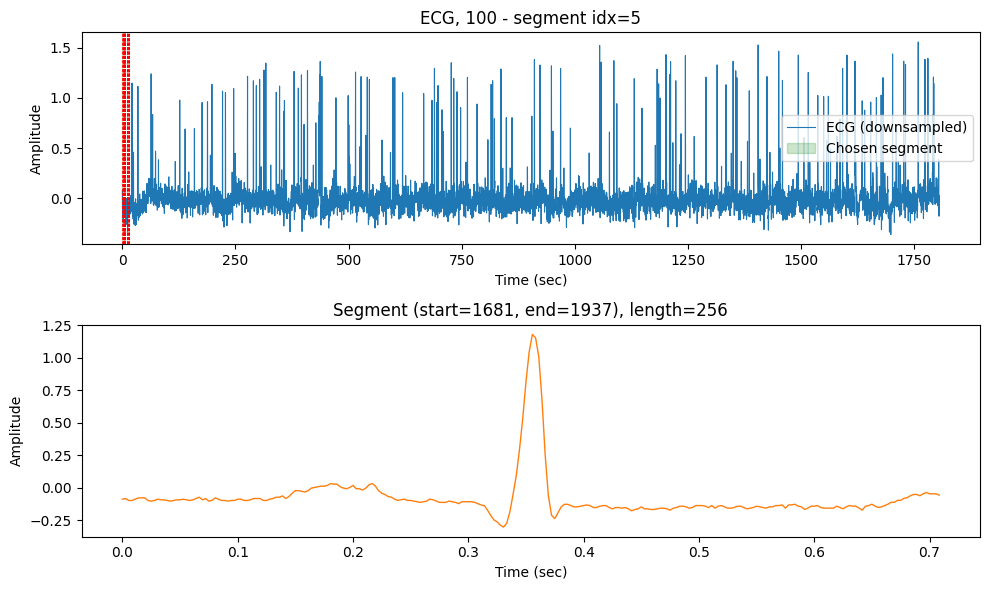

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pywt
import neurokit2 as nk

def remove_baseline_wander(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), wavelet)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    rec = pywt.waverec(coeffs, wavelet)
    if len(rec) > len(signal):
        rec = rec[:len(signal)]
    return rec

def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append((start, end, seg))
    return segments

def plot_segmentation_example(record_path="100", segment_size=256, fs=360, wavelet='db6'):
    """
    1) Считываем сигнал,
    2) Удаляем baseline,
    3) Находим R-пики,
    4) Берём один R-пик (например, 10-й),
    5) Отмечаем окно сегмента (start..end) на общем графике и показываем сам сегмент крупно.
    """

    # 1) Считываем

    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, 0]

    # 2) Удаляем baseline
    ecg_clean = remove_baseline_wander(ecg_raw, wavelet=wavelet)

    # 3) R-пики
    ecg_for_peaks = nk.ecg_clean(ecg_clean, sampling_rate=fs)
    peaks_info = nk.ecg_findpeaks(ecg_for_peaks, sampling_rate=fs)
    r_peaks = peaks_info["ECG_R_Peaks"]

    # 4) Сегментируем
    segs = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=segment_size)
    if len(segs) == 0:
        print("No segments found!")
        return

    # Выберем, например, 5-й сегмент (или min(5, len(segs)-1))
    idx_peak = min(5, len(segs)-1)
    start, end, seg = segs[idx_peak]
    r_center = start + (segment_size//2)  # Это позиция R-пика (для проверки, что он по центру)

    print(f"Choosing segment around R-peak index {idx_peak} => start={start}, end={end}, length={len(seg)}")

    # 5) Построим графики
    # -- График всего сигнала (даунсэмплируем, чтобы не было сплошного залития) --
    N = len(ecg_clean)
    max_points = 5000
    if N > max_points:
        step = N // max_points
        ecg_plot = ecg_clean[::step]
        x_plot = np.arange(0, N, step) / fs
        # Для r-пиков тоже проредим (грубое приближение)
        r_peaks_ds = [rp for rp in r_peaks if rp % step == 0]
        r_peaks_x = [(rp//step)/fs for rp in r_peaks_ds]
        # Для start..end тоже возьмём start_ds, end_ds
        start_ds = start // step
        end_ds   = end // step
    else:
        ecg_plot = ecg_clean
        x_plot = np.arange(N)/fs
        r_peaks_ds = r_peaks
        r_peaks_x = [rp/fs for rp in r_peaks_ds]
        start_ds = start
        end_ds = end

    # -- Построим 2 сабплота: (весь сигнал) и (сегмент) --
    fig, axes = plt.subplots(nrows=2, figsize=(10,6))

    # (A) Весь сигнал
    axes[0].plot(x_plot, ecg_plot, linewidth=0.8, label="ECG (downsampled)")
    # Отметим R-пики красными линиями
    for rp_x in r_peaks_x:
        axes[0].axvline(rp_x, color='red', linestyle='--', linewidth=0.6)

    # Подсветим окно (start..end)
    # Преобразуем в "секунды" (на даунсэмплированном масштабе)
    start_sec = start_ds / fs
    end_sec   = end_ds / fs
    axes[0].axvspan(start_sec, end_sec, color='green', alpha=0.2, label="Chosen segment")

    axes[0].set_title(f"ECG, {os.path.basename(record_path)} - segment idx={idx_peak}")
    axes[0].set_xlabel("Time (sec)")
    axes[0].set_ylabel("Amplitude")
    axes[0].legend()

    # (B) Сам сегмент крупно
    seg_time = np.arange(len(seg))/fs
    axes[1].plot(seg_time, seg, linewidth=1.0, color='tab:orange')
    axes[1].set_title(f"Segment (start={start}, end={end}), length={len(seg)}")
    axes[1].set_xlabel("Time (sec)")
    axes[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Пример вызова
if __name__ == "__main__":
    plot_segmentation_example(record_path="/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0/100", segment_size=256)


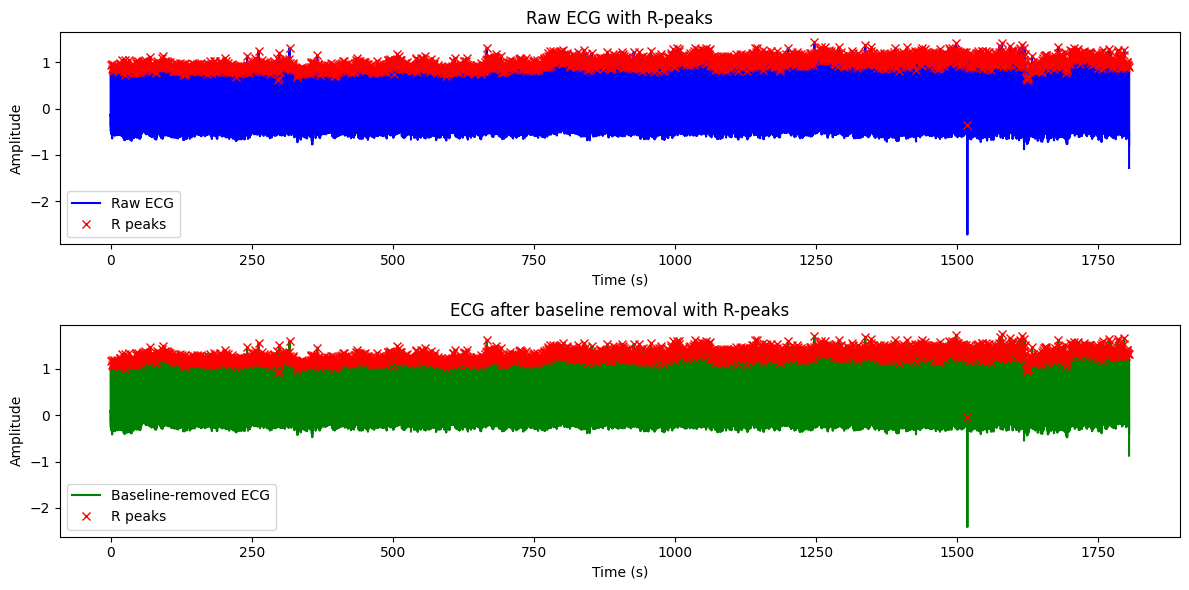

In [ ]:
def remove_baseline(signal, wavelet='db6'):

    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def visualize_r_peaks(record_path, channel=0, wavelet='db6'):
    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, channel]  # Одноканальный сигнал
    fs = record.fs  # Частота дискретизации

    #Находим R-пики с помощью NeuroKit2
    try:
        signals, info = nk.ecg_peaks(ecg_raw, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return

    ecg_no_baseline = remove_baseline(ecg_raw, wavelet=wavelet)

    time = np.arange(len(ecg_raw)) / fs

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time, ecg_raw, label="Raw ECG", color='blue')
    plt.plot(time[r_peaks], ecg_raw[r_peaks], 'rx', label="R peaks")
    plt.title("Raw ECG with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(time, ecg_no_baseline, label="Baseline-removed ECG", color='green')
    plt.plot(time[r_peaks], ecg_no_baseline[r_peaks], 'rx', label="R peaks")
    plt.title("ECG after baseline removal with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

record_path = "mit-bih-arrhythmia-database-1.0.0/100"
visualize_r_peaks(record_path, channel=0, wavelet='db6')


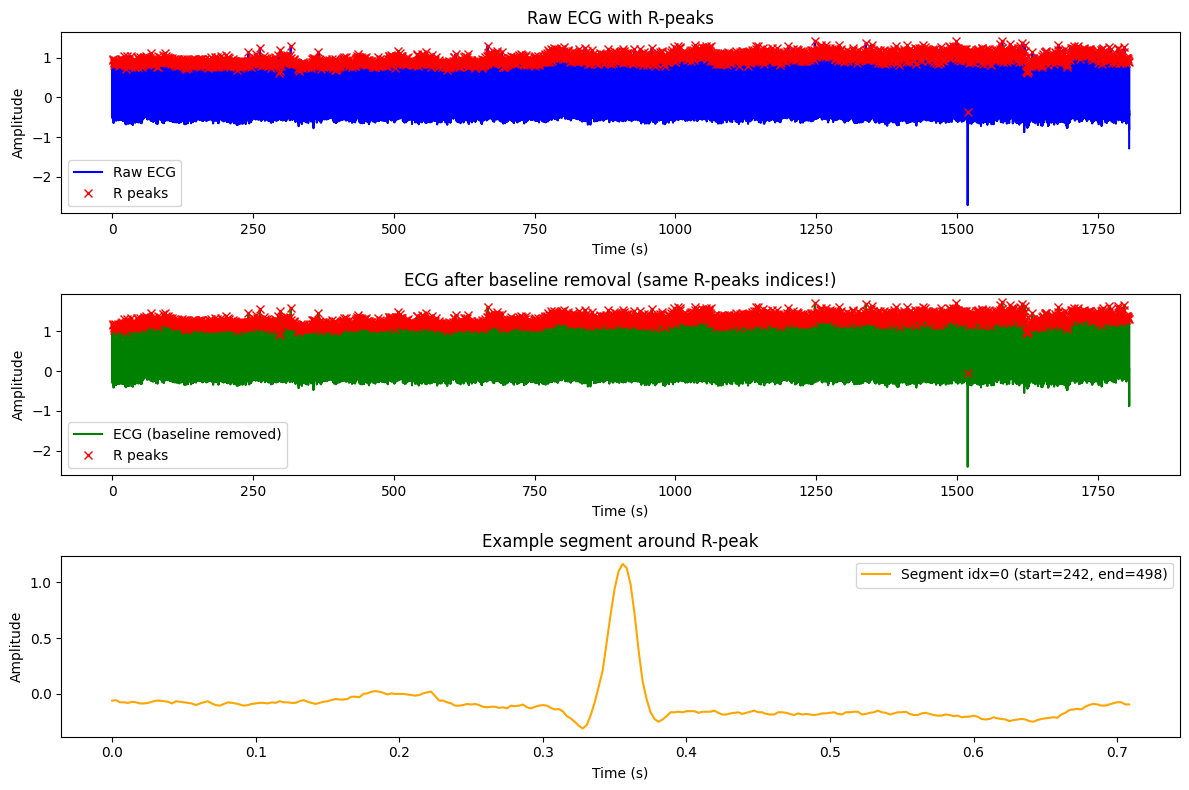

In [ ]:
import wfdb
import numpy as np
import neurokit2 as nk
import pywt
import matplotlib.pyplot as plt

def remove_baseline(signal, wavelet='db6'):
    # Ваша функция
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]


def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    """
    Возвращает список (start, end, сегмент) для каждого R-пика.
    """
    half_window = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half_window
        end = r + half_window
        # Проверка, чтобы не выйти за границы
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append((start, end, seg))
    return segments


def visualize_r_peaks_and_segments(record_path, channel=0, wavelet='db6', segment_size=256, seg_index=5):
    """
    1) Считываем сигнал, находим R-пики (ecg_peaks).
    2) Удаляем baseline.
    3) Показываем:
       - Сырой сигнал с R-пиками
       - Сигнал после baseline removal с R-пиками
       - Как минимум один сегмент (seg_index) в увеличенном виде.
    """
    # 1) Считываем
    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, channel]
    fs = record.fs

    # 2) Находим R-пики (по сырому сигналу или ecg_clean)
    #    Здесь демонстрируем именно ecg_peaks по сырому сигналу,
    #    но часто лучше сначала его "подчистить" (nk.ecg_clean).
    #    Для простоты оставим, как в вашем примере.
    try:
        signals, info = nk.ecg_peaks(ecg_raw, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return

    # 3) Удаляем baseline
    ecg_no_baseline = remove_baseline(ecg_raw, wavelet=wavelet)

    # 4) Сегментация (на сигнале без baseline, например)
    segments = segment_ecg_by_rpeaks(ecg_no_baseline, r_peaks, segment_size=segment_size)

    # 5) Визуализация
    time = np.arange(len(ecg_raw)) / fs

    plt.figure(figsize=(12, 8))

    # (A) Сырой сигнал с R-пиками
    plt.subplot(3, 1, 1)
    plt.plot(time, ecg_raw, label="Raw ECG", color='blue')
    plt.plot(time[r_peaks], ecg_raw[r_peaks], 'rx', label="R peaks")
    plt.title("Raw ECG with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    # (B) Сигнал после baseline removal с R-пиками
    plt.subplot(3, 1, 2)
    plt.plot(time, ecg_no_baseline, label="ECG (baseline removed)", color='green')
    # Те же R-пики (те же индексы), но теперь другой сигнал
    # Если хотите, можете отдельно переобнаружить R-пики уже на ecg_no_baseline
    plt.plot(time[r_peaks], ecg_no_baseline[r_peaks], 'rx', label="R peaks")
    plt.title("ECG after baseline removal (same R-peaks indices!)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    # (C) Один из сегментов, если он существует
    plt.subplot(3, 1, 3)
    if len(segments) == 0:
        plt.text(0.5, 0.5, "No segments found!", ha='center', va='center', fontsize=14)
    else:
        # Выберем seg_index (по умолчанию = 5), либо меньше, если их < 5
        idx_chosen = min(seg_index, len(segments) - 1)
        start, end, seg = segments[idx_chosen]
        seg_time = np.arange(len(seg)) / fs
        plt.plot(seg_time, seg, label=f"Segment idx={idx_chosen} (start={start}, end={end})", color='orange')
        plt.title("Example segment around R-peak")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    record_path = "mit-bih-arrhythmia-database-1.0.0/100"
    visualize_r_peaks_and_segments(record_path, channel=0, wavelet='db6', segment_size=256, seg_index=0)


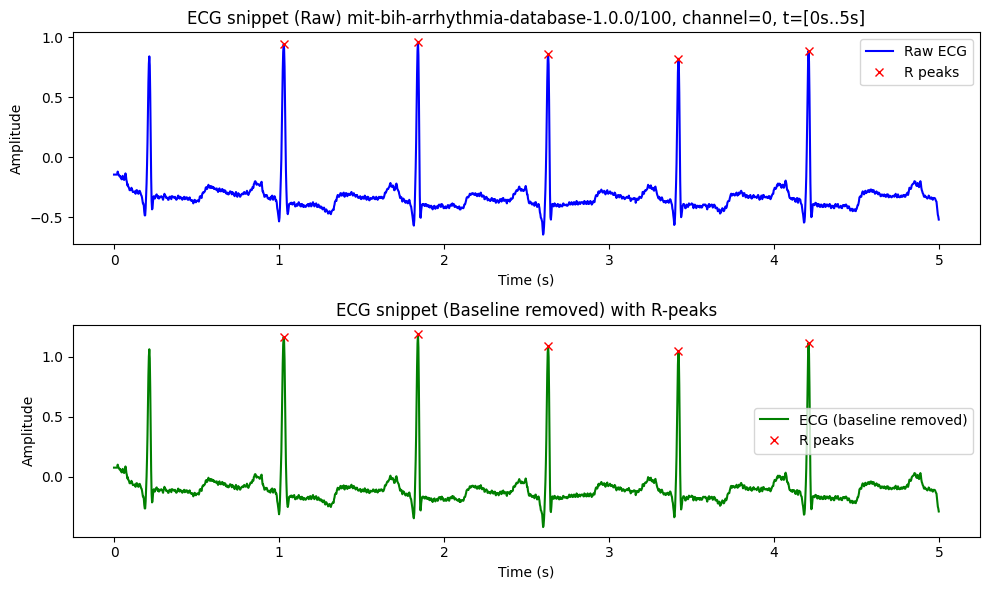

In [ ]:
import wfdb
import numpy as np
import pywt
import neurokit2 as nk
import matplotlib.pyplot as plt

def remove_baseline(signal, wavelet='db6'):
    """
    Удаление блуждающей базовой линии с помощью вейвлета db6
    (аналогично вашему коду).
    """
    # Пример: используем длину вейвлета для dwt_max_level
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

def plot_ecg_snippet(record_path, channel=0, start_s=0, duration_s=10, wavelet='db6'):
    """
    Считывает сигнал ECG из record_path, находит R-пики
    и рисует ТОЛЬКО фрагмент [start_s .. start_s+duration_s] в секундах.

    Показываем:
    - (верхний сабплот) сырой сигнал, ограниченный по времени, + R-пики в этом окне
    - (нижний сабплот) сигнал после baseline removal, тот же временной участок + те же R-пики

    Параметры:
      record_path : путь к записи (например, "100" из MIT-BIH)
      channel     : индекс канала, если несколько
      start_s     : с какой секунды начать отображать
      duration_s  : сколько секунд показать
      wavelet     : тип вейвлета для remove_baseline
    """
    # 1) Считываем запись
    record = wfdb.rdrecord(record_path)
    ecg_raw = record.p_signal[:, channel]
    fs = record.fs  # частота дискретизации (например, 360)

    # 2) Ищем R-пики (по исходному сигналу или ecg_clean)
    #    Для большей точности часто делают: ecg_clean + ecg_peaks(...)
    #    Здесь — простейший вариант:
    try:
        signals, info = nk.ecg_peaks(ecg_raw, sampling_rate=fs)
        r_peaks = info["ECG_R_Peaks"]
    except Exception as e:
        print(f"Ошибка при обнаружении пиков: {e}")
        return

    # 3) Убираем baseline
    ecg_no_baseline = remove_baseline(ecg_raw, wavelet=wavelet)

    # 4) Вычисляем индексы для нужного фрагмента
    #    start_s .. end_s в секундах => индексы [start_idx .. end_idx]
    end_s = start_s + duration_s
    start_idx = int(start_s * fs)
    end_idx   = int(end_s * fs)
    if end_idx > len(ecg_raw):
        end_idx = len(ecg_raw)

    # 5) Ограничиваем сигнал
    snippet_raw = ecg_raw[start_idx:end_idx]
    snippet_blr = ecg_no_baseline[start_idx:end_idx]
    snippet_time = np.arange(start_idx, end_idx) / fs

    # 6) Отбираем R-пики, которые попадают в этот диапазон
    snippet_rpeaks = [rp for rp in r_peaks if (rp >= start_idx and rp < end_idx)]
    # Переведём их в локальные координаты (чтобы рисовать на snippet)
    snippet_rpeaks_idx = [rp - start_idx for rp in snippet_rpeaks]

    # 7) Рисуем два сабплота
    plt.figure(figsize=(10, 6))

    # (A) Сырой сигнал
    plt.subplot(2,1,1)
    plt.plot(snippet_time, snippet_raw, color='blue', label="Raw ECG")
    # Покажем R-пики красными крестиками
    # Преобразуем snippet_rpeaks_idx => snippet_time_rpeaks
    snippet_time_rpeaks = snippet_time[snippet_rpeaks_idx]
    plt.plot(snippet_time_rpeaks, snippet_raw[snippet_rpeaks_idx], 'rx', label="R peaks")
    plt.title(f"ECG snippet (Raw) {record_path}, channel={channel}, "
              f"t=[{start_s}s..{end_s}s]")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    # (B) Сигнал после baseline removal
    plt.subplot(2,1,2)
    plt.plot(snippet_time, snippet_blr, color='green', label="ECG (baseline removed)")
    plt.plot(snippet_time_rpeaks, snippet_blr[snippet_rpeaks_idx], 'rx', label="R peaks")
    plt.title(f"ECG snippet (Baseline removed) with R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Пример для записи "100" (MIT-BIH), возьмём первые 5 секунд.
    # Если в текущей директории нет "100.dat"/"100.hea",
    # укажите полный путь, например "/path/to/mitbih/100"
    plot_ecg_snippet(
        record_path = "mit-bih-arrhythmia-database-1.0.0/100",
        channel=0,       # если ваш нужный отвод не 0, поменяйте на 1
        start_s=0,
        duration_s=5,    # показываем фрагмент длиной 5 секунд
        wavelet='db6'
    )


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


#########################################################
#              1) Класс Net1D из вашего кода
#########################################################
class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super(MyConv1dPadSame, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.groups = groups
        self.conv = nn.Conv1d(
            in_channels=self.in_channels,
            out_channels=self.out_channels,
            kernel_size=self.kernel_size,
            stride=self.stride,
            groups=self.groups)

    def forward(self, x):
        in_dim = x.shape[-1]
        out_dim = (in_dim + self.stride - 1) // self.stride
        p = max(0, (out_dim - 1)*self.stride + self.kernel_size - in_dim)
        pad_left = p // 2
        pad_right = p - pad_left
        x = F.pad(x, (pad_left, pad_right), "constant", 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super(MyMaxPool1dPadSame, self).__init__()
        self.kernel_size = kernel_size
        self.max_pool = nn.MaxPool1d(kernel_size=self.kernel_size)

    def forward(self, x):
        p = max(0, self.kernel_size - 1)
        pad_left = p // 2
        pad_right = p - pad_left
        x = F.pad(x, (pad_left, pad_right), "constant", 0)
        x = self.max_pool(x)
        return x

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True):
        super(BasicBlock, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if self.downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.middle_channels = int(self.out_channels * self.ratio)

        # conv1
        self.bn1 = nn.BatchNorm1d(in_channels)
        self.activation1 = Swish()
        self.do1 = nn.Dropout(p=0.5)
        self.conv1 = MyConv1dPadSame(in_channels, self.middle_channels, 1, 1, groups=1)

        # convk
        self.bn2 = nn.BatchNorm1d(self.middle_channels)
        self.activation2 = Swish()
        self.do2 = nn.Dropout(p=0.5)
        self.conv2 = MyConv1dPadSame(self.middle_channels, self.middle_channels,
                                     self.kernel_size, self.stride, groups=self.groups)

        # conv1 again
        self.bn3 = nn.BatchNorm1d(self.middle_channels)
        self.activation3 = Swish()
        self.do3 = nn.Dropout(p=0.5)
        self.conv3 = MyConv1dPadSame(self.middle_channels, self.out_channels, 1, 1, groups=1)

        # Squeeze-and-Excitation
        r = 2
        self.se_fc1 = nn.Linear(self.out_channels, self.out_channels//r)
        self.se_fc2 = nn.Linear(self.out_channels//r, self.out_channels)
        self.se_activation = Swish()

        if self.downsample:
            self.max_pool = MyMaxPool1dPadSame(kernel_size=self.stride)

    def forward(self, x):
        identity = x
        out = x
        # first conv
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.activation1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        # second conv
        if self.use_bn:
            out = self.bn2(out)
        out = self.activation2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        # third conv
        if self.use_bn:
            out = self.bn3(out)
        out = self.activation3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        # Squeeze-and-Excitation
        se = out.mean(dim=-1) # (batch, channels)
        se = self.se_fc1(se)
        se = self.se_activation(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        # out shape (batch, channels, length)
        out = torch.einsum('bcl,bc->bcl', out, se)

        # downsample shortcut
        if self.downsample:
            identity = self.max_pool(identity)
        # channel matching
        if self.out_channels != self.in_channels:
            # pad zeros
            identity = identity.transpose(-1, -2)
            ch_diff = self.out_channels - self.in_channels
            ch_left = ch_diff // 2
            ch_right = ch_diff - ch_left
            identity = F.pad(identity, (ch_left, ch_right), "constant", 0)
            identity = identity.transpose(-1, -2)

        out = out + identity
        return out

class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True, verbose=False):
        super(BasicStage, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.i_stage = i_stage
        self.m_blocks = m_blocks
        self.use_bn = use_bn
        self.use_do = use_do
        self.verbose = verbose

        self.block_list = nn.ModuleList()
        for i_block in range(self.m_blocks):
            is_first_block = (self.i_stage == 0 and i_block == 0)
            downsample = (i_block == 0)  # only first block in stage downsamples
            stride_ = stride if downsample else 1
            tmp_in = in_channels if i_block == 0 else out_channels
            block = BasicBlock(
                in_channels=tmp_in,
                out_channels=out_channels,
                ratio=self.ratio,
                kernel_size=self.kernel_size,
                stride=stride_,
                groups=self.groups,
                downsample=downsample,
                is_first_block=is_first_block,
                use_bn=self.use_bn,
                use_do=self.use_do
            )
            self.block_list.append(block)

    def forward(self, x):
        out = x
        for i_block, block in enumerate(self.block_list):
            out = block(out)
            if self.verbose:
                print(f"Stage {self.i_stage}, block {i_block}, out shape={list(out.shape)}")
        return out

class Net1D(nn.Module):
    """
    Чтобы под SimCLR взять выход размером n_classes=128,
    тогда на выходе будет shape = (batch_size, 128).
    """
    def __init__(self, in_channels, base_filters, ratio,
                 filter_list, m_blocks_list, kernel_size, stride, groups_width,
                 n_classes, use_bn=True, use_do=True, verbose=False):
        super(Net1D, self).__init__()
        self.in_channels = in_channels
        self.base_filters = base_filters
        self.ratio = ratio
        self.filter_list = filter_list
        self.m_blocks_list = m_blocks_list
        self.kernel_size = kernel_size
        self.stride = stride
        self.groups_width = groups_width
        self.n_stages = len(filter_list)
        self.n_classes = n_classes
        self.use_bn = use_bn
        self.use_do = use_do
        self.verbose = verbose

        # first conv
        self.first_conv = MyConv1dPadSame(in_channels, self.base_filters, self.kernel_size, stride=2)
        self.first_bn = nn.BatchNorm1d(base_filters)
        self.first_activation = Swish()

        # stages
        self.stage_list = nn.ModuleList()
        in_ch = self.base_filters
        for i_stage in range(self.n_stages):
            out_ch = self.filter_list[i_stage]
            m_blocks = self.m_blocks_list[i_stage]
            stage = BasicStage(
                in_channels=in_ch,
                out_channels=out_ch,
                ratio=self.ratio,
                kernel_size=self.kernel_size,
                stride=self.stride,
                groups=out_ch//self.groups_width,
                i_stage=i_stage,
                m_blocks=m_blocks,
                use_bn=self.use_bn,
                use_do=self.use_do,
                verbose=self.verbose
            )
            self.stage_list.append(stage)
            in_ch = out_ch

        # final prediction
        self.dense = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        # x: (batch, in_channels, length)
        out = self.first_conv(x)
        if self.use_bn:
            out = self.first_bn(out)
        out = self.first_activation(out)

        # pass through stages
        for i_stage, stage in enumerate(self.stage_list):
            out = stage(out)

        # global average pooling over time
        out = out.mean(dim=-1)  # (batch, channels)
        out = self.dense(out)   # (batch, n_classes)
        return out


#########################################################
#              2) Projection Head for SimCLR
#########################################################
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super(ProjectionHead, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)


#########################################################
#              3) NT-Xent Loss (SimCLR)
#########################################################
def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    z_i, z_j: (batch_size, dim)
    """
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)  # (2N, dim)

    # pairwise cosine similarity (2N,2N)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature

    # Запретим "самосходство" (диагональ) = -inf
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)

    # Позитив для i: i+N (по модулю 2N)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)

    loss = F.cross_entropy(sim, labels)
    return loss


#########################################################
# 4) Пример Dataset под SimCLR (заглушка)
#########################################################
class ECGSimCLRDataset(Dataset):
    """
    Предполагается, что у вас УЖЕ есть сегменты (baseline_removed, вырезанные по R-пикам)
    например, в списке numpy-массивов.
    Здесь я делаю фиктивную генерацию. Замените на свои реальные.
    """
    def __init__(self, num_samples=1000, length=256):
        super().__init__()
        self.num_samples = num_samples
        self.length = length
        # Генерируем просто шум
        self.data = np.random.randn(num_samples, length).astype(np.float32)

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Возвращаем (1, L)
        x = self.data[idx]  # shape=(L,)
        x = torch.from_numpy(x).unsqueeze(0)  # (1,L)
        return x


#########################################################
# 5) Аугментация (простейшая)
#########################################################
class SimpleECGAugment:
    def __init__(self, noise_std=0.01, amp_scale=0.1):
        self.noise_std = noise_std
        self.amp_scale = amp_scale

    def __call__(self, x: torch.Tensor):
        # x shape: (1, L)
        x_aug = x.clone()
        # Амплитудное масштабирование
        scale = 1.0 + (2*torch.rand(1) - 1.0)*self.amp_scale
        x_aug = x_aug * scale
        # Шум
        noise = torch.randn_like(x_aug)*self.noise_std
        x_aug = x_aug + noise
        return x_aug


#########################################################
# 6) Collate-функция SimCLR: двойная аугментация
#########################################################
def simclr_collate_fn(batch, transform):
    """
    batch: список [ x1, x2, ... ] где x1 shape=(1,L)
    Возвращаем (x1_aug, x2_aug)
    """
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    x1 = torch.stack(x1_list, dim=0)  # (B, 1, L)
    x2 = torch.stack(x2_list, dim=0)  # (B, 1, L)
    return x1, x2


#########################################################
# 7) Функция тренировки SimCLR
#########################################################
def train_simclr_ecg():
    # -- 1) Создаём датасет (подставьте свой вместо фиктивного) --
    dataset = ECGSimCLRDataset(num_samples=2000, length=256)

    # -- 2) Пример аугментации --
    transform_fn = SimpleECGAugment(noise_std=0.02, amp_scale=0.1)

    # -- 3) DataLoader c collate_fn --
    train_loader = DataLoader(
        dataset,
        batch_size=32,
        shuffle=True,
        collate_fn=lambda b: simclr_collate_fn(b, transform=transform_fn)
    )

    # -- 4) Инициализация Net1D (выход 128) + Projection Head (128->128) --
    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64, 160, 160, 400],  # можно как в README, или короче
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,  # для SimCLR делаем эмбеддинг 128
        use_bn=True,
        use_do=True,
        verbose=False
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    # -- 5) Отправляем на GPU (если доступно) --
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    # -- 6) Optimizer --
    optimizer = optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=1e-3)

    # -- 7) Цикл обучения --
    num_epochs = 5
    temperature = 0.5
    for epoch in range(num_epochs):
        encoder.train()
        projector.train()

        total_loss = 0.0
        for x1, x2 in train_loader:
            x1 = x1.to(device)  # (B,1,L)
            x2 = x2.to(device)

            # Пропуск через Net1D
            h1 = encoder(x1)  # (B,128)
            h2 = encoder(x2)

            # Проекция
            z1 = projector(h1)  # (B,128)
            z2 = projector(h2)

            # NT-Xent
            loss = nt_xent_loss(z1, z2, temperature=temperature)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {avg_loss:.4f}")


#########################################################
# 8) Запуск
#########################################################
if __name__ == "__main__":
    train_simclr_ecg()


Epoch 1/5, Loss = 3.5937


KeyboardInterrupt: 

# РАБОТАЕМ, РАБОТАЕМ НАРОД!

In [ ]:
import os
import numpy as np
import wfdb
import pywt
import neurokit2 as nk
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

###############################################
# 1) remove_baseline: убираем блуждающую линию
###############################################
def remove_baseline(signal, wavelet='db6'):
    """
    Удаление baseline wander через вейвлет Добеши (db6).
    """
    # Если хотите, можно подобрать уровень вручную или:
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    # Обнуляем низкочастотную аппроксимацию
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    # Подрежем, если вдруг на 1-2 отсчёта длиннее
    return filtered_signal[:len(signal)]

###############################################
# 2) segment_ecg_by_rpeaks
###############################################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    """
    На вход: ecg_signal (1D numpy), r_peaks (индексы R-пиков),
    Возвращает список numpy-массивов длины segment_size.
    """
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments

###############################################
# 3) Dataset, где мы:
#    - Считываем записи,
#    - Убираем baseline,
#    - Ищем R-пики,
#    - Делаем сегменты,
#    - Складываем их в self.all_segments
###############################################
class ECGSimCLRDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, wavelet='db6', channel=0):
        """
        record_paths: список путей/имён записи (например, ["100", "101", ...]),
                      или полный путь, если wfdb не найдёт иначе
        segment_size: длина окна вокруг R-пика
        wavelet     : какой wavelet для remove_baseline
        channel     : какой канал берем из p_signal (часто 0 или 1)
        """
        super().__init__()
        self.all_segments = []
        self.segment_size = segment_size

        for path in record_paths:
            # Читаем запись
            record = wfdb.rdrecord(path)
            ecg_raw = record.p_signal[:, channel]  # берём нужный канал
            fs = record.fs if hasattr(record, 'fs') else 360  # частота дискретизации

            # Убираем baseline
            ecg_clean = remove_baseline(ecg_raw, wavelet=wavelet)

            # Для лучшего результата часто делаем ecg_clean(NeuroKit) => nk.ecg_clean(...),
            # но здесь оставим, как есть, либо добавьте:
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            # R-пики
            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info["ECG_R_Peaks"]

            # Сегментация
            segments = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=self.segment_size)
            for seg in segments:
                self.all_segments.append(seg.astype(np.float32))

        print(f"Total segments from {len(record_paths)} records: {len(self.all_segments)}")

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        # Возвращаем (1, segment_size), т.е. форму для Conv1D
        seg = self.all_segments[idx]  # shape=(segment_size,)
        return torch.from_numpy(seg).unsqueeze(0)  # (1, L)

###############################################
# 4) Net1D (ResNet1D) из вашего net1d.py
#    (немного скопирован и упрощён, но суть та же).
###############################################
class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride
    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len-1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        self.pool = nn.MaxPool1d(kernel_size=kernel_size)
    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.pool(x)
        return x

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        # middle_channels
        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = nn.Dropout(p=0.5)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = nn.Dropout(p=0.5)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = nn.Dropout(p=0.5)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        # SE
        self.se_fc1 = nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        # conv1
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        # conv2
        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        # conv3
        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        # SE
        se = out.mean(dim=-1)  # (B, C)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        # downsample
        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            # pad channel
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff - left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left,right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out

class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True):
        super().__init__()
        self.blocks = nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return out

class Net1D(nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list, kernel_size,
                 stride, groups_width, n_classes, use_bn=True, use_do=True):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)  # Global Average Pool
        out = self.fc(out)
        return out

###############################################
# 5) ProjectionHead (SimCLR)
###############################################
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

###############################################
# 6) NT-Xent (SimCLR) loss
###############################################
def nt_xent_loss(z_i, z_j, temperature=0.5):
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)  # (2N, dim)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)
    loss = F.cross_entropy(sim, labels)
    return loss

###############################################
# 7) Аугментация (двойная) через collate_fn
###############################################
class SimpleECGAugment:
    """
    Простейший вариант: шум + амплитудное масштабирование.
    """
    def __init__(self, noise_std=0.01, amp_scale=0.1):
        self.noise_std = noise_std
        self.amp_scale = amp_scale

    def __call__(self, x: torch.Tensor):
        # x shape: (1, L)
        y = x.clone()
        scale = 1.0 + (2*torch.rand(1) - 1.0)*self.amp_scale
        y = y * scale
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise
        return y

def simclr_collate_fn(batch, transform):
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

###############################################
# 8) Основная функция обучения
###############################################
def train_ecg_simclr():
    # 1) Пути к данным (пример для MIT-BIH: "100", "101"...)
    #    Убедитесь, что wfdb видит эти файлы (иначе укажите полный путь)
    record_paths = ["100", "101"]  # Подставьте нужные записи
    segment_size = 256

    # 2) Создаём Dataset (удаляем baseline, находим R-пики, сегментируем)
    dataset = ECGSimCLRDataset(record_paths, segment_size=segment_size, wavelet='db6', channel=0)

    # 3) DataLoader с аугментацией
    aug = SimpleECGAugment(noise_std=0.02, amp_scale=0.1)
    loader = DataLoader(dataset, batch_size=32, shuffle=True,
                        collate_fn=lambda b: simclr_collate_fn(b, aug))

    # 4) Инициализируем Net1D (128 выход, для SimCLR) + ProjectionHead
    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64, 160, 160, 400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,  # Выходная размерность эмбеддинга
        use_bn=True,
        use_do=True
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    # 5) Optimizer
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=1e-3)

    # 6) Цикл обучения
    epochs = 15
    temperature = 0.5
    for epoch in range(epochs):
        encoder.train()
        projector.train()

        total_loss = 0.0
        for x1, x2 in loader:
            x1 = x1.to(device)  # (B,1,L)
            x2 = x2.to(device)

            # forward
            h1 = encoder(x1)  # (B,128)
            h2 = encoder(x2)
            z1 = projector(h1) # (B,128)
            z2 = projector(h2)

            # contrastive loss
            loss = nt_xent_loss(z1, z2, temperature=temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        avg_loss = total_loss/len(loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss={avg_loss:.4f}")

    print("Done training SimCLR on ECG segments!")


if __name__=="__main__":
    train_ecg_simclr()


Total segments from 2 records: 4135
Epoch 1/15, Loss=2.9098
Epoch 2/15, Loss=2.6361
Epoch 3/15, Loss=2.5843
Epoch 4/15, Loss=2.5466
Epoch 5/15, Loss=2.5174
Epoch 6/15, Loss=2.4995
Epoch 7/15, Loss=2.4851
Epoch 8/15, Loss=2.4784
Epoch 9/15, Loss=2.4640
Epoch 10/15, Loss=2.4499
Epoch 11/15, Loss=2.4477
Epoch 12/15, Loss=2.4381
Epoch 13/15, Loss=2.4336
Epoch 14/15, Loss=2.4343
Epoch 15/15, Loss=2.4383
Done training SimCLR on ECG segments!


In [ ]:
cd /content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0

/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0


In [ ]:
import os
import numpy as np
import wfdb
import pywt
import neurokit2 as nk
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

###############################################
# 1) remove_baseline: убираем блуждающую линию
###############################################
def remove_baseline(signal, wavelet='db6'):
    """
    Удаление baseline wander через вейвлет Добеши (db6).
    """
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    # Обнуляем низкочастотную аппроксимацию
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

###############################################
# 2) segment_ecg_by_rpeaks
###############################################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments

###############################################
# 3) Dataset: загружаем записи, убираем baseline,
#    ищем R-пики, нарезаем сегменты и складываем.
###############################################
class ECGSimCLRDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, wavelet='db6', channel=0):
        super().__init__()
        self.all_segments = []
        self.segment_size = segment_size

        for path in record_paths:
            record = wfdb.rdrecord(path)
            ecg_raw = record.p_signal[:, channel]
            fs = record.fs if hasattr(record, 'fs') else 360

            ecg_clean = remove_baseline(ecg_raw, wavelet=wavelet)
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info["ECG_R_Peaks"]

            segments = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=self.segment_size)
            for seg in segments:
                self.all_segments.append(seg.astype(np.float32))

        print(f"Total segments from {len(record_paths)} records: {len(self.all_segments)}")

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        seg = self.all_segments[idx]  # shape=(segment_size,)
        return torch.from_numpy(seg).unsqueeze(0)  # (1, L)

###############################################
# 4) Классы из net1d.py
###############################################
class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride
    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len - 1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        self.pool = nn.MaxPool1d(kernel_size=kernel_size)
    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.pool(x)
        return x

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = nn.Dropout(p=0.5)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = nn.Dropout(p=0.5)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = nn.Dropout(p=0.5)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        # SE
        self.se_fc1 = nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        # conv1
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        # conv2
        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        # conv3
        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        # SE
        se = out.mean(dim=-1)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff - left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left,right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out

class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True):
        super().__init__()
        self.blocks = nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return out

class Net1D(nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list, kernel_size,
                 stride, groups_width, n_classes, use_bn=True, use_do=True):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)
        out = self.fc(out)
        return out

###############################################
# 5) ProjectionHead (SimCLR)
###############################################
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

###############################################
# 6) NT-Xent (SimCLR) loss
###############################################
def nt_xent_loss(z_i, z_j, temperature=0.5):
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)  # (2N, dim)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)
    loss = F.cross_entropy(sim, labels)
    return loss

###############################################
# 7) Аугментация (двойная) через collate_fn
###############################################
class SimpleECGAugment:
    def __init__(self, noise_std=0.01, amp_scale=0.1):
        self.noise_std = noise_std
        self.amp_scale = amp_scale

    def __call__(self, x: torch.Tensor):
        y = x.clone()
        scale = 1.0 + (2*torch.rand(1) - 1.0)*self.amp_scale
        y = y * scale
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise
        return y

def simclr_collate_fn(batch, transform):
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

###############################################
# 8) Основная функция обучения
###############################################
def train_ecg_simclr():
    # ---------------------------------------------------
    # 1) Укажем БОЛЬШЕ записей MIT-BIH
    # Полный список (48 файлов): 100..109, 111..119, 121..124, 200..210, 212..219, 220..234
    # Ниже только пример части (укажите нужные)
    # ---------------------------------------------------
    record_paths = [str(rn) for rn in [100,101,102,103,104,105,106,107]]
    segment_size = 256

    # 2) Создаём Dataset (сегментируем все записи)
    dataset = ECGSimCLRDataset(record_paths, segment_size=segment_size, wavelet='db6', channel=0)

    # 3) DataLoader, увеличим batch_size
    aug = SimpleECGAugment(noise_std=0.02, amp_scale=0.1)
    loader = DataLoader(
        dataset,
        batch_size=32,   # можно увеличить до 64 или 128, если позволяет GPU
        shuffle=True,
        collate_fn=lambda b: simclr_collate_fn(b, aug)
    )

    # 4) Net1D + ProjectionHead
    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64, 160, 160, 400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,
        use_bn=True,
        use_do=True
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    optimizer = torch.optim.Adam(
        list(encoder.parameters()) + list(projector.parameters()), lr=1e-3
    )

    # 5) УВЕЛИЧИВАЕМ количество эпох, например, до 20
    epochs = 20
    temperature = 0.5

    for epoch in range(epochs):
        encoder.train()
        projector.train()

        total_loss = 0.0
        for x1, x2 in loader:
            x1 = x1.to(device)
            x2 = x2.to(device)

            h1 = encoder(x1)
            h2 = encoder(x2)
            z1 = projector(h1)
            z2 = projector(h2)

            loss = nt_xent_loss(z1, z2, temperature=temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss={avg_loss:.4f}")

    print("Done training SimCLR on ECG segments!")


if __name__=="__main__":
    train_ecg_simclr()


Total segments from 8 records: 17351
Epoch 1/20, Loss=2.5495
Epoch 2/20, Loss=2.4233
Epoch 3/20, Loss=2.3985
Epoch 4/20, Loss=2.3808
Epoch 5/20, Loss=2.3665
Epoch 6/20, Loss=2.3539
Epoch 7/20, Loss=2.3488
Epoch 8/20, Loss=2.3409
Epoch 9/20, Loss=2.3361
Epoch 10/20, Loss=2.3343
Epoch 11/20, Loss=2.3330
Epoch 12/20, Loss=2.3297
Epoch 13/20, Loss=2.3262
Epoch 14/20, Loss=2.3212
Epoch 15/20, Loss=2.3230
Epoch 16/20, Loss=2.3192
Epoch 17/20, Loss=2.3187
Epoch 18/20, Loss=2.3189
Epoch 19/20, Loss=2.3189
Epoch 20/20, Loss=2.3127
Done training SimCLR on ECG segments!


# РАБОТАЕМ(С СОХРАНЕНИЕМ)

In [ ]:
import os
import numpy as np
import wfdb
import pywt
import neurokit2 as nk
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import random

############################
# 1) remove_baseline
############################
def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

############################
# 2) segment_ecg_by_rpeaks
############################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments

############################
# 3) ECGSimCLRDataset
############################
class ECGSimCLRDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, wavelet='db6', channel=0):
        super().__init__()
        self.all_segments = []
        for path in record_paths:
            record = wfdb.rdrecord(path)
            ecg_raw = record.p_signal[:, channel]
            fs = record.fs if hasattr(record, 'fs') else 360

            ecg_clean = remove_baseline(ecg_raw, wavelet=wavelet)
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info["ECG_R_Peaks"]

            segs = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=segment_size)
            for seg in segs:
                self.all_segments.append(seg.astype(np.float32))

        print(f"Total segments: {len(self.all_segments)}")

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        x = self.all_segments[idx]  # shape=(segment_size,)
        return torch.from_numpy(x).unsqueeze(0)  # (1, L)

############################
# 4) Net1D (ResNet1D)
############################
class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride
    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len-1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.pool = nn.MaxPool1d(kernel_size)
        self.kernel_size = kernel_size
    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left,pad_right), 'constant', 0)
        x = self.pool(x)
        return x

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = nn.Dropout(p=dropout_p)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = nn.Dropout(p=dropout_p)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = nn.Dropout(p=dropout_p)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        self.se_fc1 = nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        se = out.mean(dim=-1)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff-left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left,right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out

class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.blocks = nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return outhttps://colab.research.google.com/signup?utm_source=resource_tab&utm_medium=link&utm_campaign=payg_learn_more

class Net1D(nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list, kernel_size,
                 stride, groups_width, n_classes, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)
        out = self.fc(out)
        return out

############################
# 5) ProjectionHead
############################
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

############################
# 6) NT-Xent
############################
def nt_xent_loss(z_i, z_j, temperature=0.1):
    # temperature=0.1 (попробуем поменьше)
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)
    loss = F.cross_entropy(sim, labels)
    return loss

############################
# 7) AdvancedECGAugment
############################
class AdvancedECGAugment:
    """Пример более разнообразной аугментации:
       1) Noise
       2) Amp scaling
       3) Random crop
       4) Mini time-warp
    """
    def __init__(self, noise_std=0.01, amp_scale=0.1, crop_range=0.1, warp_prob=0.2):
        self.noise_std = noise_std
        self.amp_scale = amp_scale
        self.crop_range = crop_range  # доля, которую кропаем
        self.warp_prob = warp_prob    # вероятность применить time warp

    def __call__(self, x: torch.Tensor):
        # x shape: (1, L)
        y = x.clone()

        L = y.size(1)

        # 1) амплитудное масштабирование
        scale = 1.0 + (2*torch.rand(1)-1.0)*self.amp_scale
        y = y * scale

        # 2) шум
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise

        # 3) random crop (например, вырезаем случайные ~95% сигнала)
        #    аккуратно, чтобы итоговая длина была та же -> вставим padding
        crop_len = int(L*(1.0 - self.crop_range))  # если crop_range=0.1, берём 90% длины
        start = random.randint(0, L - crop_len - 1)
        crop = y[:, start:start+crop_len]  # shape=(1, crop_len)
        # теперь паддим обратно до L
        pad_left = random.randint(0, L - crop_len)
        pad_right= L - crop_len - pad_left
        crop = F.pad(crop, (pad_left, pad_right), "constant", 0)
        y = crop  # (1, L) но часть стала нулями

        # 4) mini time-warp (с вероятностью warp_prob)
        #    очень упрощённо: переворачиваем небольшой кусочек
        if random.random() < self.warp_prob:
            mid = random.randint(L//4, 3*L//4)
            # swap left/right? (или более умный warp)
            left_part = y[:, :mid].clone()
            right_part= y[:, mid:].clone()
            y = torch.cat([right_part, left_part], dim=1)

        return y

############################
# 8) Collate
############################
def simclr_collate_fn(batch, transform):
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

############################
# 9) train_ecg_simclr
############################
def train_ecg_simclr():
    record_paths = [str(r) for r in [100,101,102,103,104,105,106,107,108,109]]
    dataset = ECGSimCLRDataset(record_paths, segment_size=256, wavelet='db6', channel=0)

    # batch_size больше, epochs тоже
    batch_size = 64
    epochs = 17

    # Аугментация
    transform_fn = AdvancedECGAugment(
        noise_std=0.01,
        amp_scale=0.1,
        crop_range=0.1,  # 10% случайный кроп
        warp_prob=0.2
    )

    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=lambda b: simclr_collate_fn(b, transform_fn)
    )

    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64,160,160,400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,
        use_bn=True,
        use_do=True,
        dropout_p=0.2  # уменьшили dropout c 0.5 до 0.2
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    optimizer = torch.optim.Adam(
        list(encoder.parameters()) + list(projector.parameters()),
        lr=1e-3
    )

    temperature = 0.1  # меньше, чем 0.5
    for epoch in range(1, epochs+1):
        encoder.train()
        projector.train()

        total_loss = 0.0
        for (x1, x2) in loader:
            x1, x2 = x1.to(device), x2.to(device)
            h1 = encoder(x1)
            h2 = encoder(x2)
            z1 = projector(h1)
            z2 = projector(h2)
            loss = nt_xent_loss(z1, z2, temperature=temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss/len(loader)
        print(f"Epoch {epoch}/{epochs}, Loss={avg_loss:.4f}")

    print("Done training. Returning encoder & projector.")
    return encoder, projector


############################
# 10) Запуск + сохранение
############################
if __name__ == "__main__":
    enc, proj = train_ecg_simclr()
    # Теперь сохраняем
    torch.save(enc.state_dict(), "encoder.pth")
    torch.save(proj.state_dict(), "projector.pth")
    print("Saved encoder.pth and projector.pth")


Total segments: 21624
Epoch 1/17, Loss=0.9513
Epoch 2/17, Loss=0.4336
Epoch 3/17, Loss=0.3314
Epoch 4/17, Loss=0.2721
Epoch 5/17, Loss=0.2415
Epoch 6/17, Loss=0.2089
Epoch 7/17, Loss=0.1937
Epoch 8/17, Loss=0.1788
Epoch 9/17, Loss=0.1694
Epoch 10/17, Loss=0.1618
Epoch 11/17, Loss=0.1529
Epoch 12/17, Loss=0.1412
Epoch 13/17, Loss=0.1394
Epoch 14/17, Loss=0.1345
Epoch 15/17, Loss=0.1301
Epoch 16/17, Loss=0.1255
Epoch 17/17, Loss=0.1216
Done training. Returning encoder & projector.
Saved encoder.pth and projector.pth


In [ ]:
torch.save(encoder.state_dict(), "/content/drive/MyDrive/masters_work/uspeh/encoder.pth")
torch.save(projector.state_dict(), "/content/drive/MyDrive/masters_work/uspeh/projector.pth")

NameError: name 'encoder' is not defined

In [ ]:
ls

100.atr    105.dat  111.hea  117.at_  123.atr  203.atr  210.dat  217.dat  223.hea  234.atr
100.dat    105.hea  111.xws  117.atr  123.dat  203.dat  210.hea  217.hea  223.xws  234.dat
100.hea    105.xws  112.atr  117.dat  123.hea  203.hea  210.xws  217.xws  228.atr  234.hea
100.xws    106.atr  112.dat  117.hea  123.xws  203.xws  212.atr  219.atr  228.dat  234.xws
101.atr    106.dat  112.hea  117.xws  124.atr  205.atr  212.dat  219.dat  228.hea  ANNOTATORS
101.dat    106.hea  112.xws  118.atr  124.dat  205.dat  212.hea  219.hea  228.xws  checkpoints/
101.hea    106.xws  113.atr  118.dat  124.hea  205.hea  212.xws  219.xws  230.atr  encoder.pth
101.xws    107.atr  113.dat  118.hea  124.xws  205.xws  213.atr  220.atr  230.dat  mitdbdir/
102-0.atr  107.dat  113.hea  118.xws  200.atr  207.atr  213.dat  220.dat  230.hea  projector.pth
102.atr    107.hea  113.xws  119.at_  200.dat  207.dat  213.hea  220.hea  230.xws  RECORDS
102.dat    107.xws  114.atr  119.atr  200.hea  207.hea  213.xws  220.x

In [ ]:
cp projector.pth encoder.pth /content/drive/MyDrive/masters_work/uspeh/

# ТЕСТИРУЕМ

<ipython-input-20-6ac7a099f6a6>:360: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load("encoder.pth", map_location=device))
<ipython-input-20-

[TestDataset] total segments = 6750
[Test] We have 6750 segments from ['200', '201', '202']
Positive mean=0.9844, Negative mean=0.1294
ROC AUC=1.0000, AP=1.0000


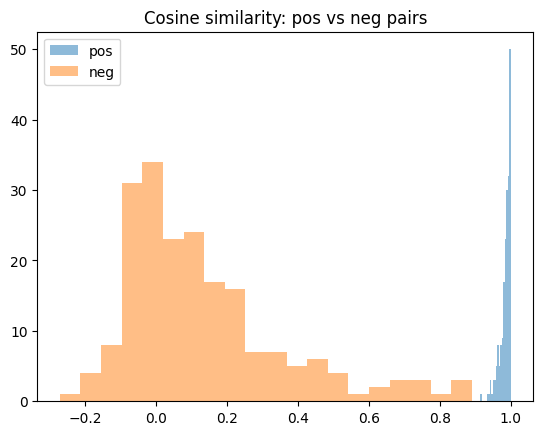

In [ ]:
import os
import wfdb
import numpy as np
import pywt
import neurokit2 as nk
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score

#######################################################
# 1) Копируем/импортируем Net1D, ProjectionHead
#    (точно так же, как при обучении).
#######################################################
class Swish(torch.nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class MyConv1dPadSame(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride
    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len - 1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(torch.nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.pool = torch.nn.MaxPool1d(kernel_size)
        self.kernel_size = kernel_size
    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left,pad_right), 'constant', 0)
        x = self.pool(x)
        return x

class BasicBlock(torch.nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True, dropout_p=0.5):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = torch.nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = torch.nn.Dropout(p=dropout_p)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = torch.nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = torch.nn.Dropout(p=dropout_p)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = torch.nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = torch.nn.Dropout(p=dropout_p)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        # Squeeze-and-Excitation
        self.se_fc1 = torch.nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = torch.nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        # SE
        se = out.mean(dim=-1)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff - left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left,right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out

class BasicStage(torch.nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True, dropout_p=0.5):
        super().__init__()
        self.blocks = torch.nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return out

class Net1D(torch.nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list, kernel_size,
                 stride, groups_width, n_classes, use_bn=True, use_do=True, dropout_p=0.5):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = torch.nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = torch.nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = torch.nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)
        out = self.fc(out)
        return out

class ProjectionHead(torch.nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(in_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

#######################################################
# 2) Подготовка тестового датасета
#######################################################
def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    rec = pywt.waverec(coeffs, wavelet)
    return rec[:len(signal)]

def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segs = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end> len(ecg_signal):
            continue
        segs.append(ecg_signal[start:end])
    return segs

class ECGTestDataset:
    """
    Простой класс (не Torch Dataset),
    чтобы собрать сегменты из тестовых записей.
    """
    def __init__(self, record_paths, segment_size=256, channel=0, wavelet='db6'):
        self.all_segments = []
        for rp in record_paths:
            rec = wfdb.rdrecord(rp)
            fs = rec.fs if hasattr(rec, 'fs') else 360
            ecg_raw = rec.p_signal[:, channel]

            ecg_clean = remove_baseline(ecg_raw, wavelet=wavelet)
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info['ECG_R_Peaks']

            segs = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=segment_size)
            for s in segs:
                self.all_segments.append(s.astype(np.float32))

        print(f"[TestDataset] total segments = {len(self.all_segments)}")

#######################################################
# 3) Функция проверки (pairs)
#######################################################
@torch.no_grad()
def check_simclr_pairs(encoder, projector, test_segments, augment_fn, num_pairs=100, device='cpu'):
    """
    Формируем позитивные/негативные пары, вычисляем cos similarity.
    Выводим среднее для pos/neg, рисуем гистограмму, считаем ROC-AUC, AP.
    """
    encoder.eval()
    projector.eval()

    if len(test_segments) < 2:
        print("Not enough test segments!")
        return

    # Превратим в тензоры
    test_tensors = []
    for seg in test_segments:
        t = torch.from_numpy(seg).float().unsqueeze(0)  # (1,L)
        test_tensors.append(t)

    sims_pos = []
    sims_neg = []
    labels = []  # 1 для pos, 0 для neg
    # Позитивные пары
    for _ in range(num_pairs):
        idx = random.randint(0, len(test_tensors)-1)
        x = test_tensors[idx]
        x1 = augment_fn(x)
        x2 = augment_fn(x)
        x1 = x1.unsqueeze(0).to(device) # (1,1,L)
        x2 = x2.unsqueeze(0).to(device)
        z1 = projector(encoder(x1))  # (1, dim)
        z2 = projector(encoder(x2))
        sim = F.cosine_similarity(z1, z2).item()
        sims_pos.append(sim)
        labels.append(1)

    # Негативные пары
    for _ in range(num_pairs):
        idx1 = random.randint(0, len(test_tensors)-1)
        idx2 = random.randint(0, len(test_tensors)-1)
        while idx2 == idx1:
            idx2 = random.randint(0, len(test_tensors)-1)
        xA = test_tensors[idx1]
        xB = test_tensors[idx2]
        xA_aug = augment_fn(xA)
        xB_aug = augment_fn(xB)
        xA_aug = xA_aug.unsqueeze(0).to(device)
        xB_aug = xB_aug.unsqueeze(0).to(device)
        zA = projector(encoder(xA_aug))
        zB = projector(encoder(xB_aug))
        sim = F.cosine_similarity(zA, zB).item()
        sims_neg.append(sim)
        labels.append(0)

    sims_all = np.concatenate([sims_pos, sims_neg], axis=0)
    labels_all= np.array(labels)
    # Для наглядности: ROC AUC, AP
    try:
        auc_roc = roc_auc_score(labels_all, sims_all)
        auc_ap  = average_precision_score(labels_all, sims_all)
        print(f"Positive mean={np.mean(sims_pos):.4f}, Negative mean={np.mean(sims_neg):.4f}")
        print(f"ROC AUC={auc_roc:.4f}, AP={auc_ap:.4f}")
    except:
        print("sklearn metrics not installed or error in computing AUC")

    # Гистограмма
    plt.hist(sims_pos, bins=20, alpha=0.5, label="pos")
    plt.hist(sims_neg, bins=20, alpha=0.5, label="neg")
    plt.legend()
    plt.title("Cosine similarity: pos vs neg pairs")
    plt.show()

#######################################################
# 4) Аугментация
#######################################################
class SimpleECGAugment:
    def __init__(self, noise_std=0.01, amp_scale=0.1):
        self.noise_std = noise_std
        self.amp_scale = amp_scale
    def __call__(self, x: torch.Tensor):
        y = x.clone()
        scale = 1.0 + (2*torch.rand(1)-1.0)*self.amp_scale
        y = y*scale
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise
        return y

#######################################################
# 5) MAIN
#######################################################
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 1) Создаём ТУ ЖЕ САМУЮ модель
    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64,160,160,400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,
        use_bn=True,
        use_do=True,
        dropout_p=0.2  # или 0.5
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    encoder.to(device)
    projector.to(device)

    # 2) Загружаем веса
    # Предположим, вы сохранили их как encoder.pth/projector.pth
    encoder.load_state_dict(torch.load("encoder.pth", map_location=device))
    projector.load_state_dict(torch.load("projector.pth", map_location=device))

    # 3) Создаём тестовый датасет из "последних" записей (например, 200..209)
    test_paths = [str(r) for r in [200,201,202]]  # подставьте те записи, которые НЕ обучались
    test_data = ECGTestDataset(record_paths=test_paths, segment_size=256, channel=0)
    print(f"[Test] We have {len(test_data.all_segments)} segments from {test_paths}")

    # 4) Возьмём augment для теста (можно тот же, что в train)
    aug = SimpleECGAugment(noise_std=0.02, amp_scale=0.1)

    # 5) Проверяем
    check_simclr_pairs(
        encoder=encoder,
        projector=projector,
        test_segments=test_data.all_segments,  # список numpy
        augment_fn=aug,
        num_pairs=200,  # кол-во пар pos/neg
        device=device
    )

if __name__=="__main__":
    main()


# Работаем на полную(+wanb)

In [ ]:
import os
import random
import numpy as np

import wfdb
import pywt
import neurokit2 as nk

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import wandb


def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]


def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments


class ECGSimCLRDataset(Dataset):
    def __init__(self, record_paths, segment_size=256, wavelet='db6', channel=0):
        super().__init__()
        self.all_segments = []
        self.segment_size = segment_size
        self.wavelet = wavelet
        self.channel = channel

        for path in record_paths:
            record = wfdb.rdrecord(path)
            ecg_raw = record.p_signal[:, self.channel]
            fs = record.fs if hasattr(record, 'fs') else 360

            ecg_clean = remove_baseline(ecg_raw, wavelet=self.wavelet)
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info["ECG_R_Peaks"]

            segs = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=self.segment_size)
            for seg in segs:
                self.all_segments.append(seg.astype(np.float32))

        print(f"[ECGSimCLRDataset] Loaded {len(self.all_segments)} segments from {len(record_paths)} records.")

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        x = self.all_segments[idx]  # shape=(segment_size,)
        # Возвращаем (1, segment_size)
        return torch.from_numpy(x).unsqueeze(0)


class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len - 1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right = p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x


class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        self.pool = nn.MaxPool1d(kernel_size)

    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right = p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.pool(x)
        return x


class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = nn.Dropout(p=dropout_p)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = nn.Dropout(p=dropout_p)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = nn.Dropout(p=dropout_p)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        self.se_fc1 = nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)


        se = out.mean(dim=-1)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff - left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left, right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out


class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.blocks = nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return out


class Net1D(nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list, kernel_size,
                 stride, groups_width, n_classes, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)
        out = self.fc(out)
        return out


class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)


def nt_xent_loss(z_i, z_j, temperature=0.1):
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)
    loss = F.cross_entropy(sim, labels)
    return loss


class AdvancedECGAugment:
    def __init__(self, noise_std=0.01, amp_scale=0.1, crop_range=0.1, warp_prob=0.2):
        self.noise_std = noise_std
        self.amp_scale = amp_scale
        self.crop_range = crop_range
        self.warp_prob = warp_prob

    def __call__(self, x: torch.Tensor):
        y = x.clone()
        L = y.size(1)

        # 1) амплитудное масштабирование
        scale = 1.0 + (2*torch.rand(1)-1.0)*self.amp_scale
        y = y * scale

        # 2) шум
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise

        # 3) random crop
        crop_len = int(L*(1.0 - self.crop_range))
        start = random.randint(0, L - crop_len - 1)
        crop = y[:, start:start+crop_len]
        pad_left = random.randint(0, L - crop_len)
        pad_right= L - crop_len - pad_left
        crop = F.pad(crop, (pad_left, pad_right), "constant", 0)
        y = crop

        # 4) mini time-warp
        if random.random() < self.warp_prob:
            mid = random.randint(L//4, 3*L//4)
            left_part = y[:, :mid].clone()
            right_part= y[:, mid:].clone()
            y = torch.cat([right_part, left_part], dim=1)

        return y


def simclr_collate_fn(batch, transform):
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)


def train_ecg_simclr_wandb(
        train_record_paths,
        segment_size=256,
        wavelet='db6',
        channel=0,
        batch_size=64,
        epochs=30,
        temperature=0.1,
        checkpoint_interval=3
    ):
    """
    train_record_paths: список ID (напр. ["100","101"...]) для обучения
    batch_size: размер батча
    epochs: количество эпох
    temperature: параметр в nt_xent_loss
    checkpoint_interval: каждые N эпох сохранять чекпоинт
    """


    wandb.init(project="ecg-simclr", name="train_run_full", config={
        "segment_size": segment_size,
        "batch_size": batch_size,
        "epochs": epochs,
        "temperature": temperature,
        "checkpoint_interval": checkpoint_interval
    })


    dataset = ECGSimCLRDataset(train_record_paths, segment_size=segment_size, wavelet=wavelet, channel=channel)


    transform_fn = AdvancedECGAugment(noise_std=0.01, amp_scale=0.1, crop_range=0.1, warp_prob=0.2)
    train_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=lambda b: simclr_collate_fn(b, transform_fn)
    )


    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64,160,160,400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,
        use_bn=True,
        use_do=True,
        dropout_p=0.2
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=1e-3)

    wandb.watch(encoder, log="all")
    wandb.watch(projector, log="all")

    global_step = 0
    for epoch in range(1, epochs+1):
        encoder.train()
        projector.train()
        total_loss = 0.0

        for x1, x2 in train_loader:
            x1 = x1.to(device)
            x2 = x2.to(device)

            z1 = projector(encoder(x1))
            z2 = projector(encoder(x2))

            loss = nt_xent_loss(z1, z2, temperature=temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            global_step += 1

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch}/{epochs}, Loss={avg_loss:.4f}")

        wandb.log({"epoch": epoch, "loss": avg_loss})

        if epoch % checkpoint_interval == 0:
            enc_path = f"encoder_epoch{epoch}.pth"
            proj_path= f"projector_epoch{epoch}.pth"
            torch.save(encoder.state_dict(), enc_path)
            torch.save(projector.state_dict(), proj_path)
            #wandb.save(enc_path)
            #wandb.save(proj_path)

    print("Done training. Returning encoder & projector.")
    return encoder, projector



if __name__ == "__main__":



    record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                  111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
                  122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
                  209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
                  222, 223, 228, 230, 231, 232, 233, 234]
    train_paths = [str(r) for r in record_numbers]

    # test_ids = [200,201,202,210,124,119, etc]
    # for t in test_ids:
    #     if str(t) in train_paths: train_paths.remove(str(t))

    enc, proj = train_ecg_simclr_wandb(
        train_record_paths=train_paths,
        segment_size=256,
        wavelet='db6',
        channel=0,
        batch_size=64,
        epochs=30,
        temperature=0.1,
        checkpoint_interval=3
    )

    torch.save(enc.state_dict(), "encoder_final.pth")
    torch.save(proj.state_dict(), "projector_final.pth")
    print("Saved final model: encoder_final.pth, projector_final.pth")


[ECGSimCLRDataset] Loaded 110129 segments from 48 records.
Epoch 1/30, Loss=0.3011
Epoch 2/30, Loss=0.1199
Epoch 3/30, Loss=0.0963
Epoch 4/30, Loss=0.0847
Epoch 5/30, Loss=0.0746
Epoch 6/30, Loss=0.0695
Epoch 7/30, Loss=0.0625
Epoch 8/30, Loss=0.0609
Epoch 9/30, Loss=0.0540
Epoch 10/30, Loss=0.0533
Epoch 11/30, Loss=0.0497
Epoch 12/30, Loss=0.0504
Epoch 13/30, Loss=0.0471
Epoch 14/30, Loss=0.0467
Epoch 15/30, Loss=0.0447
Epoch 16/30, Loss=0.0442
Epoch 17/30, Loss=0.0423
Epoch 18/30, Loss=0.0419
Epoch 19/30, Loss=0.0417
Epoch 20/30, Loss=0.0409
Epoch 21/30, Loss=0.0392
Epoch 22/30, Loss=0.0391
Epoch 23/30, Loss=0.0382
Epoch 24/30, Loss=0.0381
Epoch 25/30, Loss=0.0371
Epoch 26/30, Loss=0.0373
Epoch 27/30, Loss=0.0367
Epoch 28/30, Loss=0.0364
Epoch 29/30, Loss=0.0360
Epoch 30/30, Loss=0.0353
Done training. Returning encoder & projector.
Saved final model: encoder_final.pth, projector_final.pth


# Переход в нужную директорию

In [ ]:
cd /content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0

/content/drive/MyDrive/masters_work/mit-bih-arrhythmia-database-1.0.0


# Работа с аннотированными(размеченными) данными("визуализация")

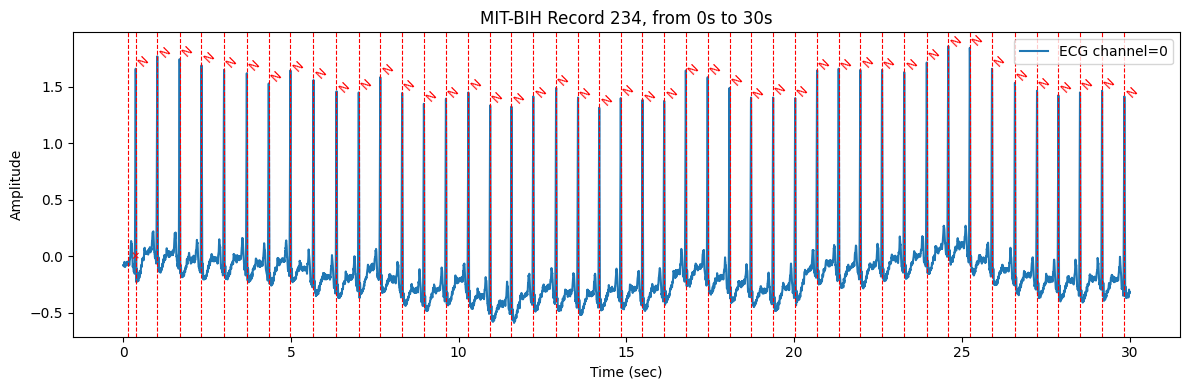

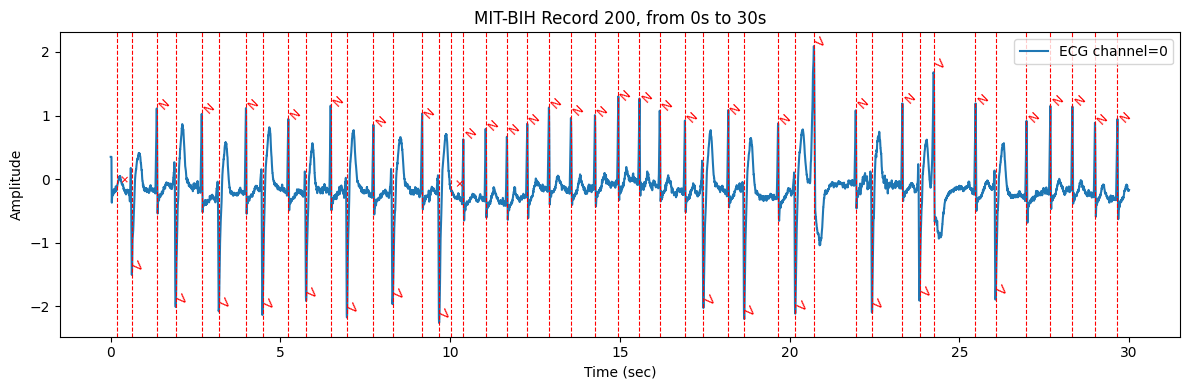

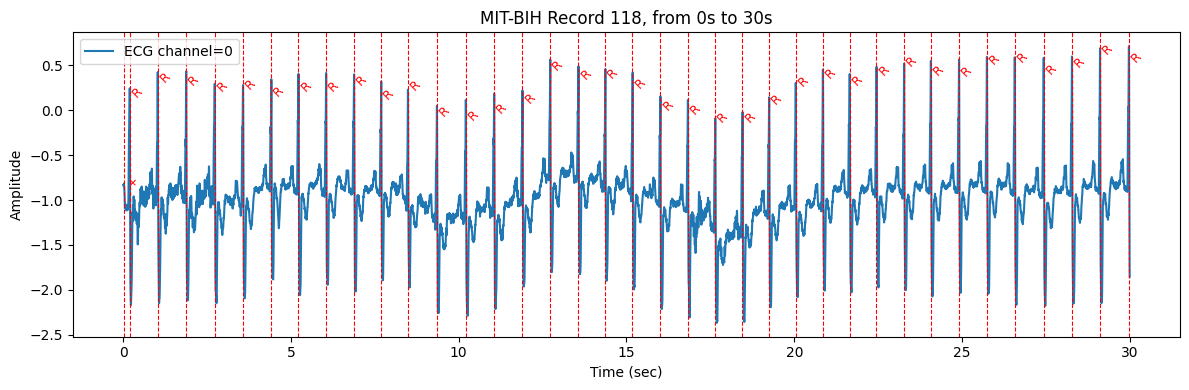

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

def visualize_mitbih_records(record_ids, channel=0, start_s=0, duration_s=10):

    for record_id in record_ids:
        record = wfdb.rdrecord(record_id)
        fs = record.fs if hasattr(record, 'fs') else 360
        ecg_signal = record.p_signal[:, channel]

        ann = wfdb.rdann(record_id, 'atr')  # файл .atr


        start_idx = int(start_s * fs)
        end_idx   = int((start_s + duration_s) * fs)
        if end_idx > len(ecg_signal):
            end_idx = len(ecg_signal)


        snippet = ecg_signal[start_idx:end_idx]
        t = np.arange(len(snippet)) / fs + start_s


        r_peaks_in_range = []
        ann_symbols_in_range = []
        for i, peak_idx in enumerate(ann.sample):
            if start_idx <= peak_idx < end_idx:
                r_peaks_in_range.append(peak_idx)
                ann_symbols_in_range.append(ann.symbol[i])


        plt.figure(figsize=(12, 4))
        plt.plot(t, snippet, label=f"ECG channel={channel}")
        plt.xlabel("Time (sec)")
        plt.ylabel("Amplitude")
        plt.title(f"MIT-BIH Record {record_id}, from {start_s}s to {start_s+duration_s}s")

        for peak_idx, symb in zip(r_peaks_in_range, ann_symbols_in_range):
            peak_t = peak_idx / fs
            local_idx = peak_idx - start_idx
            plt.axvline(x=peak_t, color='red', linestyle='--', linewidth=0.8)

            y_val = snippet[local_idx]
            plt.text(peak_t, y_val, symb, color='red', fontsize=9,
                     verticalalignment='bottom',
                     horizontalalignment='left',
                     rotation=45)

        plt.legend()
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    rec_ids = ["234", "200", "118"]
    visualize_mitbih_records(record_ids=rec_ids, channel=0, start_s=0, duration_s=30)


# Разделение на треин(треин+вал) и тест(классификатор) + подбор гиппар

In [ ]:
import os
import json
import random
import numpy as np

import wfdb
import pywt
import neurokit2 as nk

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

import wandb

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    # Если используете GPU:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    # Дополнительно иногда отключают cudnn.benchmark для стабильности
    #torch.backends.cudnn.deterministic = True
    #torch.backends.cudnn.benchmark = False

##################################
# 1) remove_baseline
##################################
def remove_baseline(signal, wavelet='db6'):
    max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    coeffs[0] = np.zeros_like(coeffs[0])
    filtered_signal = pywt.waverec(coeffs, wavelet)
    return filtered_signal[:len(signal)]

##################################
# 2) segment_ecg_by_rpeaks
##################################
def segment_ecg_by_rpeaks(ecg_signal, r_peaks, segment_size=256):
    half = segment_size // 2
    segments = []
    for r in r_peaks:
        start = r - half
        end = r + half
        if start < 0 or end > len(ecg_signal):
            continue
        seg = ecg_signal[start:end]
        segments.append(seg)
    return segments

##################################
# 3) ECGSimCLRFullDataset
##################################
class ECGSimCLRFullDataset(Dataset):
    """
    Загружает записи (список), формирует все сегменты (beat) для SimCLR.
    НЕ разбивает на train/val внутри. Позже разделим random_split.
    """
    def __init__(self, record_paths, segment_size=256, wavelet='db6', channel=0):
        super().__init__()
        self.all_segments = []
        for path in record_paths:
            record = wfdb.rdrecord(path)
            ecg_raw = record.p_signal[:, channel]
            fs = record.fs if hasattr(record, 'fs') else 360

            ecg_clean = remove_baseline(ecg_raw, wavelet=wavelet)
            ecg_preproc = nk.ecg_clean(ecg_clean, sampling_rate=fs)

            peaks_info = nk.ecg_findpeaks(ecg_preproc, sampling_rate=fs)
            r_peaks = peaks_info["ECG_R_Peaks"]

            segs = segment_ecg_by_rpeaks(ecg_clean, r_peaks, segment_size=segment_size)
            for seg in segs:
                self.all_segments.append(seg.astype(np.float32))

        print(f"[ECGSimCLRFullDataset] total segments = {len(self.all_segments)}")

    def __len__(self):
        return len(self.all_segments)

    def __getitem__(self, idx):
        x = self.all_segments[idx]
        # Возвращаем shape (1, segment_size)
        return torch.from_numpy(x).unsqueeze(0)


##################################
# 4) Conv blocks (MyConv1dPadSame, etc.) + Net1D
##################################
class MyConv1dPadSame(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, groups=groups)
        self.kernel_size = kernel_size
        self.stride = stride
    def forward(self, x):
        in_len = x.shape[-1]
        out_len = (in_len + self.stride - 1)//self.stride
        p = max(0, (out_len - 1)*self.stride + self.kernel_size - in_len)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left, pad_right), 'constant', 0)
        x = self.conv(x)
        return x

class MyMaxPool1dPadSame(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.pool = nn.MaxPool1d(kernel_size)
        self.kernel_size = kernel_size
    def forward(self, x):
        in_len = x.shape[-1]
        p = max(0, self.kernel_size - 1)
        pad_left = p//2
        pad_right= p - pad_left
        x = F.pad(x, (pad_left,pad_right), 'constant', 0)
        x = self.pool(x)
        return x

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 downsample, is_first_block=False, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels= out_channels
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.groups = groups
        self.downsample = downsample
        self.stride = stride if downsample else 1
        self.is_first_block = is_first_block
        self.use_bn = use_bn
        self.use_do = use_do

        self.mid_ch = int(self.out_channels*self.ratio)

        self.bn1 = nn.BatchNorm1d(in_channels)
        self.act1 = Swish()
        self.do1 = nn.Dropout(p=dropout_p)
        self.conv1= MyConv1dPadSame(in_channels, self.mid_ch, 1, 1)

        self.bn2 = nn.BatchNorm1d(self.mid_ch)
        self.act2 = Swish()
        self.do2 = nn.Dropout(p=dropout_p)
        self.conv2= MyConv1dPadSame(self.mid_ch, self.mid_ch, kernel_size, self.stride, groups=self.groups)

        self.bn3 = nn.BatchNorm1d(self.mid_ch)
        self.act3 = Swish()
        self.do3 = nn.Dropout(p=dropout_p)
        self.conv3= MyConv1dPadSame(self.mid_ch, out_channels, 1, 1)

        # Squeeze-and-Excitation
        self.se_fc1 = nn.Linear(out_channels, out_channels//2)
        self.se_fc2 = nn.Linear(out_channels//2, out_channels)
        self.se_act = Swish()

        if self.downsample:
            self.pool = MyMaxPool1dPadSame(self.stride)

    def forward(self, x):
        identity = x
        out = x
        if not self.is_first_block:
            if self.use_bn:
                out = self.bn1(out)
            out = self.act1(out)
            if self.use_do:
                out = self.do1(out)
        out = self.conv1(out)

        if self.use_bn:
            out = self.bn2(out)
        out = self.act2(out)
        if self.use_do:
            out = self.do2(out)
        out = self.conv2(out)

        if self.use_bn:
            out = self.bn3(out)
        out = self.act3(out)
        if self.use_do:
            out = self.do3(out)
        out = self.conv3(out)

        # SE
        se = out.mean(dim=-1)
        se = self.se_fc1(se)
        se = self.se_act(se)
        se = self.se_fc2(se)
        se = torch.sigmoid(se)
        out = torch.einsum('bcl,bc->bcl', out, se)

        if self.downsample:
            identity = self.pool(identity)

        if self.out_channels != self.in_channels:
            ch_diff = self.out_channels - self.in_channels
            left = ch_diff//2
            right= ch_diff-left
            identity = identity.transpose(-1,-2)
            identity = F.pad(identity, (left,right), 'constant', 0)
            identity = identity.transpose(-1,-2)

        out = out + identity
        return out

class BasicStage(nn.Module):
    def __init__(self, in_channels, out_channels, ratio, kernel_size, stride, groups,
                 i_stage, m_blocks, use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.blocks = nn.ModuleList()
        for i_block in range(m_blocks):
            is_first_block = (i_stage==0 and i_block==0)
            ds = (i_block==0)
            tmp_in = in_channels if i_block==0 else out_channels
            block = BasicBlock(tmp_in, out_channels, ratio, kernel_size, stride, groups,
                               downsample=ds, is_first_block=is_first_block,
                               use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.blocks.append(block)

    def forward(self, x):
        out = x
        for block in self.blocks:
            out = block(out)
        return out

class Net1D(nn.Module):
    def __init__(self, in_channels, base_filters, ratio, filter_list, m_blocks_list,
                 kernel_size, stride, groups_width, n_classes,
                 use_bn=True, use_do=True, dropout_p=0.2):
        super().__init__()
        self.first_conv = MyConv1dPadSame(in_channels, base_filters, kernel_size, stride=2)
        self.first_bn   = nn.BatchNorm1d(base_filters)
        self.first_act  = Swish()

        self.stages = nn.ModuleList()
        in_ch = base_filters
        for i_stage, out_ch in enumerate(filter_list):
            m_blocks = m_blocks_list[i_stage]
            stage = BasicStage(in_ch, out_ch, ratio, kernel_size, stride, out_ch//groups_width,
                               i_stage, m_blocks, use_bn=use_bn, use_do=use_do, dropout_p=dropout_p)
            self.stages.append(stage)
            in_ch = out_ch

        self.fc = nn.Linear(in_ch, n_classes)

    def forward(self, x):
        out = self.first_conv(x)
        out = self.first_bn(out)
        out = self.first_act(out)
        for stage in self.stages:
            out = stage(out)
        out = out.mean(dim=-1)
        out = self.fc(out)
        return out

##################################
# 5) ProjectionHead
##################################
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=128, hidden_dim=256, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

##################################
# 6) NT-Xent
##################################
def nt_xent_loss(z_i, z_j, temperature=0.1):
    batch_size = z_i.size(0)
    z = torch.cat([z_i, z_j], dim=0)
    sim = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=-1)
    sim = sim / temperature
    diag_mask = torch.eye(2*batch_size, device=z.device).bool()
    sim = sim.masked_fill_(diag_mask, -1e9)
    labels = (torch.arange(2*batch_size, device=z.device) + batch_size) % (2*batch_size)
    loss = F.cross_entropy(sim, labels)
    return loss

##################################
# 7) Augmentation
##################################
class AdvancedECGAugment:
    def __init__(self, noise_std=0.01, amp_scale=0.1, crop_range=0.1, warp_prob=0.2):
        self.noise_std = noise_std
        self.amp_scale = amp_scale
        self.crop_range = crop_range
        self.warp_prob = warp_prob
    def __call__(self, x: torch.Tensor):
        y = x.clone()
        L = y.size(1)
        # (1) Амплитудное масштабирование
        scale = 1.0 + (2*torch.rand(1)-1.0)*self.amp_scale
        y = y * scale
        # (2) Шум
        noise = torch.randn_like(y)*self.noise_std
        y = y + noise
        # (3) random crop
        crop_len = int(L*(1.0 - self.crop_range))
        start = random.randint(0, L - crop_len - 1)
        crop = y[:, start:start+crop_len]
        pad_left = random.randint(0, L - crop_len)
        pad_right= L - crop_len - pad_left
        crop = F.pad(crop, (pad_left, pad_right), "constant", 0)
        y = crop
        # (4) mini time-warp
        if random.random() < self.warp_prob:
            mid = random.randint(L//4, 3*L//4)
            left_part = y[:, :mid].clone()
            right_part= y[:, mid:].clone()
            y = torch.cat([right_part, left_part], dim=1)
        return y

def simclr_collate_fn(batch, transform):
    x1_list, x2_list = [], []
    for x in batch:
        x1_list.append(transform(x))
        x2_list.append(transform(x))
    return torch.stack(x1_list, dim=0), torch.stack(x2_list, dim=0)

##################################
# 8) TRAIN FUNCTION w/ train-val split
##################################
def train_ecg_simclr_wandb(
    train_record_paths,
    segment_size=256,
    wavelet='db6',
    channel=0,
    batch_size=64,
    epochs=30,
    temperature=0.1,
    checkpoint_interval=3,
    val_ratio=0.2
):
    """
    train_record_paths: список записей (ID) для контрастного обучения (90%).
    val_ratio: процент сегментов, которые пойдут в валидацию (по умолч. 20%)
    Остальные параметры аналогичны.
    """

    # Инициализируем wandb
    wandb.init(project="ecg-simclr", name="train_run_full", config={
        "segment_size": segment_size,
        "batch_size": batch_size,
        "epochs": epochs,
        "temperature": temperature,
        "checkpoint_interval": checkpoint_interval,
        "val_ratio": val_ratio
    })

    # (1) Создаём общий датасет (все сегменты)
    full_dataset = ECGSimCLRFullDataset(
        record_paths=train_record_paths,
        segment_size=segment_size,
        wavelet=wavelet,
        channel=channel
    )

    # (2) Делим его на train/val random_split
    n_total = len(full_dataset)
    n_val = int(val_ratio * n_total)
    n_train = n_total - n_val

    set_seed(42)

    train_dataset, val_dataset = random_split(full_dataset, [n_train, n_val])
    print(f"Train dataset: {len(train_dataset)} segments, Val dataset: {len(val_dataset)} segments.")

    # (3) Создаём DataLoader для train и val
    transform_fn = AdvancedECGAugment(noise_std=0.01, amp_scale=0.1, crop_range=0.1, warp_prob=0.2)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=lambda b: simclr_collate_fn(b, transform_fn)
    )
    # Для валид. датасета аугментации, возможно, не нужны – можно отключить или оставить минимальные
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=lambda b: simclr_collate_fn(b, transform_fn)  # можно другой transform
    )

    # (4) Модель
    encoder = Net1D(
        in_channels=1,
        base_filters=64,
        ratio=1.0,
        filter_list=[64,160,160,400],
        m_blocks_list=[2,2,2,2],
        kernel_size=16,
        stride=2,
        groups_width=16,
        n_classes=128,
        use_bn=True,
        use_do=True,
        dropout_p=0.2
    )
    projector = ProjectionHead(in_dim=128, hidden_dim=256, out_dim=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    projector.to(device)

    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=1e-3)

    wandb.watch(encoder, log="all")
    wandb.watch(projector, log="all")

    global_step = 0

    # (5) Цикл обучения + валидация
    for epoch in range(1, epochs+1):
        encoder.train()
        projector.train()
        total_loss_train = 0.0

        for x1, x2 in train_loader:
            x1 = x1.to(device)
            x2 = x2.to(device)
            z1 = projector(encoder(x1))
            z2 = projector(encoder(x2))
            loss = nt_xent_loss(z1, z2, temperature=temperature)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss_train += loss.item()
            global_step += 1

        avg_loss_train = total_loss_train / len(train_loader)

        # --- VALIDATION ---
        encoder.eval()
        projector.eval()
        total_loss_val = 0.0
        with torch.no_grad():
            for x1_val, x2_val in val_loader:
                x1_val = x1_val.to(device)
                x2_val = x2_val.to(device)
                z1_val = projector(encoder(x1_val))
                z2_val = projector(encoder(x2_val))
                loss_val = nt_xent_loss(z1_val, z2_val, temperature=temperature)
                total_loss_val += loss_val.item()
        avg_loss_val = total_loss_val / len(val_loader)

        print(f"Epoch {epoch}/{epochs}, TrainLoss={avg_loss_train:.4f}, ValLoss={avg_loss_val:.4f}")

        wandb.log({
            "epoch": epoch,
            "train_loss": avg_loss_train,
            "val_loss": avg_loss_val
        })

        if epoch % checkpoint_interval == 0:
            enc_path = f"/content/drive/MyDrive/masters_work/checkpoints_02/encoder_epoch{epoch}.pth"
            proj_path= f"/content/drive/MyDrive/masters_work/checkpoints_02/projector_epoch{epoch}.pth"
            torch.save(encoder.state_dict(), enc_path)
            torch.save(projector.state_dict(), proj_path)
            # В Google Colab/Drive можно отключить wandb.save, если вызывает симлинк-проблемы
            # wandb.save(enc_path)
            # wandb.save(proj_path)

    print("Done training. Returning encoder & projector.")
    return encoder, projector



def save_records_json(records_list, filename="test_records.json"):
    with open(filename, "w") as f:
        json.dump(records_list, f, indent=2)

def load_records_json(filename="test_records.json"):
    with open(filename, "r") as f:
        data = json.load(f)
    return data


##################################
# 9) Пример использования + 90/10 split по записям
##################################
if __name__ == "__main__":

    set_seed(42)

    # Все 48 записей
    record_numbers = [
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 121,
        122, 123, 124, 200, 201, 202, 203, 205, 207, 208,
        209, 210, 212, 213, 214, 215, 217, 219, 220, 221,
        222, 223, 228, 230, 231, 232, 233, 234
    ]
    all_ids = [str(r) for r in record_numbers]
    random.shuffle(all_ids)

    # Допустим, 10% -> test_records, 90% -> trainval_records
    n_total = len(all_ids)
    n_test = int(0.1 * n_total)
    test_records = all_ids[:n_test]
    save_records_json(test_records, "test_records.json")
    trainval_records = all_ids[n_test:]
    save_records_json(trainval_records, "trainval_records.json")
    print(f"Test records: {test_records}")
    print(f"Trainval records: {trainval_records}")

    # Запуск обучения SimCLR (с train/val сплитом внутри segments)
    enc, proj = train_ecg_simclr_wandb(
        train_record_paths=trainval_records,
        segment_size=256,
        wavelet='db6',
        channel=0,
        batch_size=64,
        epochs=51,
        temperature=0.1,
        checkpoint_interval=3,
        val_ratio=0.2
    )

    # Сохраняем финальные веса
    torch.save(enc.state_dict(), "/content/drive/MyDrive/masters_work/checkpoints_02/encoder_final.pth")
    torch.save(proj.state_dict(), "/content/drive/MyDrive/masters_work/checkpoints_02/projector_final.pth")
    print("Saved final model: /content/drive/MyDrive/masters_work/checkpoints_02/encoder_final.pth, /content/drive/MyDrive/masters_work/checkpoints_02/projector_final.pth")

    print(f"Test records are {test_records}")


Test records: ['208', '200', '201', '111']
Trainval records: ['123', '109', '209', '221', '113', '103', '215', '104', '230', '203', '112', '213', '207', '223', '119', '210', '233', '212', '217', '202', '122', '124', '234', '231', '100', '121', '117', '228', '114', '220', '232', '102', '205', '219', '105', '214', '106', '108', '115', '116', '118', '101', '107', '222']


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vortex_d11 (vortex_d11-m-v-lomonosovmoscow-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[ECGSimCLRFullDataset] total segments = 100441
Train dataset: 80353 segments, Val dataset: 20088 segments.
Epoch 1/51, TrainLoss=0.3577, ValLoss=0.1615
Epoch 2/51, TrainLoss=0.1472, ValLoss=0.1084
Epoch 3/51, TrainLoss=0.1140, ValLoss=0.0875
Epoch 4/51, TrainLoss=0.0995, ValLoss=0.0740
Epoch 5/51, TrainLoss=0.0893, ValLoss=0.0674
Epoch 6/51, TrainLoss=0.0807, ValLoss=0.0628
Epoch 7/51, TrainLoss=0.0761, ValLoss=0.0573
Epoch 8/51, TrainLoss=0.0704, ValLoss=0.0512
Epoch 9/51, TrainLoss=0.0677, ValLoss=0.0519
Epoch 10/51, TrainLoss=0.0624, ValLoss=0.0494
Epoch 11/51, TrainLoss=0.0599, ValLoss=0.0433
Epoch 12/51, TrainLoss=0.0574, ValLoss=0.0486
Epoch 13/51, TrainLoss=0.0556, ValLoss=0.0430
Epoch 14/51, TrainLoss=0.0545, ValLoss=0.0424
Epoch 15/51, TrainLoss=0.0535, ValLoss=0.0396
Epoch 16/51, TrainLoss=0.0522, ValLoss=0.0389
Epoch 17/51, TrainLoss=0.0506, ValLoss=0.0380
Epoch 18/51, TrainLoss=0.0491, ValLoss=0.0344
Epoch 19/51, TrainLoss=0.0474, ValLoss=0.0380
Epoch 20/51, TrainLoss=0.047

# Классификатор(режимы "ssl" и "sl")

In [ ]:
#Локально сделал(ограничения в colab это грустно)